In [1]:
# !pip3 install --pre torch torchvision torchaudio --index-url https://download.pytorch.org/whl/nightly/cu128
# !pip install pandas
# !pip install tqdm
# !pip install matplotlib
# !pip install opencv-python

In [1]:
# Required Libraries
import os
import random
import shutil
import torch
from collections import defaultdict
import pandas as pd

# Dataset Pre Processing (JAFFE)

In [4]:
# def split_dataset(source_dir, destination_dir, file_extension, csv_path, train_ratio=0.6, val_ratio=0.2, test_ratio=0.2):
#     '''
#     Description:
#         This function splits a dataset into training, validation, and test sets by randomly selecting images and copying them over to the specified directories, organized into subdirectories based on the emotion label with the highest score.

#     Parameters:
#         source_dir (str): The directory containing the original dataset.
#         destination_dir (str): The directory to copy the training/testing/validation sets to.
#         file_extension (str): The file extension of the images in the dataset.
#         csv_path (str): Path to the CSV file containing emotion scores for each image.
#         train_ratio (float): The ratio of the dataset to include in the training set.
#         val_ratio (float): The ratio of the dataset to include in the validation set.
#         test_ratio (float): The ratio of the dataset to include in the test set.
    
#     Returns:
#         None
#     '''
    
#     # Validate ratios
#     assert abs(train_ratio + val_ratio + test_ratio) == 1, "Ratios must sum to 1"
    
#     # Mapping for folder names
#     folder_mapping = {'test': 'test', 'train': 'train', 'validation': 'val'}

#     # Ensure the mapping mathches the dataset
#     label_mapping = {
#         "HAP": 0,
#         "SUR": 1,
#         "SAD": 2,
#         "ANG": 3,
#         "DIS": 4,
#         "FEA": 5,
#         # "neutral": 6
#     }

#     train_dir = os.path.join(destination_dir, 'train')
#     val_dir = os.path.join(destination_dir, 'validation')
#     test_dir = os.path.join(destination_dir, 'test')

#     # Create directories
#     os.makedirs(train_dir, exist_ok=True)
#     os.makedirs(val_dir, exist_ok=True)
#     os.makedirs(test_dir, exist_ok=True)
    
#     # Read emotion mapping from CSV
#     emotion_mapping = {}
#     emotions = ['HAP', 'SAD', 'SUR', 'ANG', 'DIS', 'FEA']
    
#     with open(csv_path, 'r') as f:
#         next(f)  # Skip header
#         for line in f:
#             parts = line.strip().split()
#             if len(parts) < 8: continue
#             pic = parts[7]
#             scores = list(map(float, parts[1:7]))
#             emotion = emotions[scores.index(max(scores))]
#             emotion_mapping[pic] = emotion
    
#     # Group files by emotion
#     emotion_groups = defaultdict(list)
#     all_files = [f for f in os.listdir(source_dir) if f.lower().endswith(file_extension.lower())]
    
#     for file_name in all_files:
#         base = os.path.splitext(file_name)[0].replace('.', '-', 1).split('.')[0]
#         if base in emotion_mapping:
#             emotion_groups[emotion_mapping[base]].append(file_name)
    
#     # Stratified splitting
#     train_files, val_files, test_files = [], [], []
    
#     for emotion, files in emotion_groups.items():
#         random.shuffle(files)
#         n = len(files)
#         train_end = int(n * train_ratio)
#         val_end = train_end + int(n * val_ratio)
        
#         train_files.extend(files[:train_end])
#         val_files.extend(files[train_end:val_end])
#         test_files.extend(files[val_end:])
    
#     # Final shuffle to mix emotions
#     random.shuffle(train_files)
#     random.shuffle(val_files)
#     random.shuffle(test_files)
    
#     # Copy files with emotion subdirectories
#     def copy_split(files, target_dir):
#         for fname in files:
#             base = os.path.splitext(fname)[0].replace('.', '-', 1).split('.')[0]
#             emotion = emotion_mapping.get(base)
#             if not emotion: continue
#             dest = os.path.join(target_dir, emotion, fname)
#             os.makedirs(os.path.dirname(dest), exist_ok=True)
#             shutil.copy(os.path.join(source_dir, fname), dest)
    
#     copy_split(train_files, train_dir)
#     copy_split(val_files, val_dir)
#     copy_split(test_files, test_dir)

#     # Iterate over the folders (test, train, validation)
#     for folder in ['test', 'train', 'validation']:
#         folder_path = os.path.join(destination_dir, folder)
        
#         # Iterate over the class folders inside each folder
#         for class_folder in os.listdir(folder_path):
#             class_folder_path = os.path.join(folder_path, class_folder)
            
#             # Iterate over the images in the class folder
#             for index, image in enumerate(os.listdir(class_folder_path)):
#                 # Get the image name and extension
#                 image_name, image_ext = os.path.splitext(image)
                
#                 # Construct the new image name
#                 new_image_name = f"{folder_mapping[folder]}_{index}_{class_folder}{image_ext}"
                
#                 # Rename the image and move it to the destination folder
#                 shutil.move(os.path.join(class_folder_path, image), os.path.join(destination_dir, folder, new_image_name))

#         image_data = []

#         # Make sure the name of the file is partition_iteration_emotion.jpg or .png
#         for filename in os.listdir(folder_path):
#             if filename.endswith(file_extension):  
#                 label_name = filename.split('_')[-1].split('.')[0]
#                 label_value = label_mapping.get(label_name)
#                 if label_value is not None:  
#                     image_data.append([filename, label_value])

#         df = pd.DataFrame(image_data, columns=["ImageName", "Label"])

#         csv_file_path = os.path.join(folder_path, f'{folder}_labels.csv')

#         df.to_csv(csv_file_path, index=False, header=False)

#     # Removing any residual empty directories
#     for foldername, subfolders, filenames in os.walk(destination_dir, topdown=False):
#         # Iterate through subdirectories
#         for subfolder in subfolders:
#             subfolder_path = os.path.join(foldername, subfolder)
#             # Check if the subfolder is empty
#             if not os.listdir(subfolder_path):  # List contents of the folder
#                 os.rmdir(subfolder_path)  # Remove empty subfolder

# # Usage remains the same
# source_directory = 'JAFFE_Dataset'
# destination_directory = 'JAFFE_ResEmoteNet'
# file_extension = 'tiff'
# csv_path = 'JAFFE_Dataset/mapping.csv'

# split_dataset(source_directory, destination_directory, file_extension, csv_path)

In [2]:
import os
import torch
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset

# Dataset class for the custom dataset
class Four4All(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        self.labels = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
            
        img_name = os.path.join(self.img_dir, self.labels.iloc[idx, 0])
        image = Image.open(img_name)
        label = self.labels.iloc[idx, 1]
        
        if self.transform:
            image = self.transform(image)
            
        return image, label

# ResEmoteNet Model

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class SEBlock(nn.Module):
    def __init__(self, in_channels, reduction=16):
        super(SEBlock, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(in_channels, in_channels // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(in_channels // reduction, in_channels, bias=False),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y.expand_as(x)
    
    
class ResidualBlock(nn.Module):
    def __init__(self, in_ch, out_ch, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_ch, out_ch, kernel_size=3, stride=stride, padding=1)
        self.bn1 = nn.BatchNorm2d(out_ch)
        self.conv2 = nn.Conv2d(out_ch, out_ch, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(out_ch)
        
        self.shortcut = nn.Sequential()
        if stride != 1 or in_ch != out_ch:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_ch, out_ch, kernel_size=1, stride=stride, padding=0),
                nn.BatchNorm2d(out_ch)
            )
            
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out
    
    
class ResEmoteNet(nn.Module):
    def __init__(self):
        super(ResEmoteNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.relu = nn.ReLU(inplace=True)
        self.se = SEBlock(256)
        
        self.res_block1 = ResidualBlock(256, 512, stride=2)
        self.res_block2 = ResidualBlock(512, 1024, stride=2)
        self.res_block3 = ResidualBlock(1024, 2048, stride=2)
        
        self.pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc1 = nn.Linear(2048, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.dropout1 = nn.Dropout(0.2)
        self.dropout2 = nn.Dropout(0.5)
        # self.fc4 = nn.Linear(256, 6) #Changed from 7 to 6 to match the JAFFE label count
        self.fc4 = nn.Linear(256, 7)
        
    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.max_pool2d(x, 2)
        x = self.se(x)
        
        x = self.res_block1(x)
        x = self.res_block2(x)
        x = self.res_block3(x)
        
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout2(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = F.relu(self.fc3(x))
        x = self.dropout2(x)
        x = self.fc4(x)
        return x

# ResEmoteNet Training (JEFFE)

In [ ]:
# import torch
# import pandas as pd
# import numpy as np
# from tqdm import tqdm
# from torch.utils.data import DataLoader
# from torchvision import transforms
# import torch.optim as optim
# import matplotlib.pyplot as plt

# # Device configuration
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f"Using {device} device")

# # Hyperparameter grid for tuning
# learning_rates = [0.001, 0.01, 0.1]
# batch_sizes = [16, 32, 64]
# momentums = [0.9, 0.95]
# weight_decays = [1e-4, 1e-5]

# # Best hyperparameter configuration variables
# best_val_acc = 0
# best_lr = None
# best_bs = None
# best_momentum = None
# best_wd = None

# # Placeholder for storing results
# results = []

# # Transform the dataset
# transform = transforms.Compose([
#     transforms.Resize((64, 64)),
#     transforms.Grayscale(num_output_channels=3),
#     transforms.RandomHorizontalFlip(),
#     transforms.ToTensor(),
#     transforms.Normalize( #Consider changing the mean and std
#         mean=[0.485, 0.456, 0.406],
#         std=[0.229, 0.224, 0.225]
#     )
# ])

# data_directory = 'JAFFE_ResEmoteNet'

# # Load the dataset
# train_dataset = Four4All(csv_file=data_directory+'/train/train_labels.csv',
#                          img_dir=data_directory+'/train', transform=transform)

# val_dataset = Four4All(csv_file=data_directory+'/validation/validation_labels.csv', 
#                        img_dir=data_directory+'/validation/', transform=transform)

# test_dataset = Four4All(csv_file=data_directory+'/test/test_labels.csv', 
#                         img_dir=data_directory+'/test', transform=transform)

# # Loop over the grid of hyperparameters
# for lr in learning_rates:
#     for batch_size in batch_sizes:
#         for momentum in momentums:
#             for wd in weight_decays:
#                 print(f"\nRunning grid search with lr={lr}, batch_size={batch_size}, momentum={momentum}, weight_decay={wd}")
                
#                 # Load the dataset with the current batch_size
#                 train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
#                 val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
#                 test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#                 # Reinitialize the model
#                 model = ResEmoteNet().to(device)
#                 # model.fc4 = nn.Linear(256, 6) #Changed to map correctly to the JEFFA dataset

#                 # Hyperparameters
#                 criterion = torch.nn.CrossEntropyLoss()
#                 optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay=wd)

#                 # Training parameters
#                 patience = 15
#                 patience_counter = 0
#                 epoch_counter = 0
#                 num_epochs = 80

#                 train_losses = []
#                 val_losses = []
#                 train_accuracies = []
#                 val_accuracies = []
#                 test_losses = []
#                 test_accuracies = []

#                 # Start training
#                 for epoch in range(num_epochs):
#                     model.train()
#                     running_loss = 0.0
#                     correct = 0
#                     total = 0

#                     for data in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
#                         inputs, labels = data[0].to(device), data[1].to(device)

#                         optimizer.zero_grad()
#                         outputs = model(inputs)
#                         loss = criterion(outputs, labels)
#                         loss.backward()
#                         optimizer.step()

#                         running_loss += loss.item()
#                         _, predicted = torch.max(outputs.data, 1)
#                         total += labels.size(0)
#                         correct += (predicted == labels).sum().item()

#                     train_loss = running_loss / len(train_loader)
#                     train_acc = correct / total
#                     train_losses.append(train_loss)
#                     train_accuracies.append(train_acc)

#                     # Validation evaluation
#                     model.eval()
#                     val_running_loss = 0.0
#                     val_correct = 0
#                     val_total = 0
#                     with torch.no_grad():
#                         for data in val_loader:
#                             inputs, labels = data[0].to(device), data[1].to(device)
#                             outputs = model(inputs)
#                             loss = criterion(outputs, labels)
#                             val_running_loss += loss.item()
#                             _, predicted = torch.max(outputs.data, 1)
#                             val_total += labels.size(0)
#                             val_correct += (predicted == labels).sum().item()

#                     val_loss = val_running_loss / len(val_loader)
#                     val_acc = val_correct / val_total
#                     val_losses.append(val_loss)
#                     val_accuracies.append(val_acc)

#                     print(f"Epoch {epoch+1}, Train Loss: {train_loss}, Train Accuracy: {train_acc}, Validation Loss: {val_loss}, Validation Accuracy: {val_acc}")
#                     epoch_counter += 1

#                     if val_acc > best_val_acc:
#                         best_val_acc = val_acc
#                         patience_counter = 0
#                         torch.save(model.state_dict(), f'best_model_{lr}_{batch_size}_{momentum}_{wd}.pth')
#                     else:
#                         patience_counter += 1
#                         print(f"No improvement in validation accuracy for {patience_counter} epochs.")
                    
#                     if patience_counter > patience:
#                         print("Stopping early due to lack of improvement in validation accuracy.")
#                         break

#                 # Store the results for this hyperparameter combination
#                 results.append({
#                     'lr': lr,
#                     'batch_size': batch_size,
#                     'momentum': momentum,
#                     'weight_decay': wd,
#                     'best_val_acc': best_val_acc,
#                     'train_losses': train_losses,
#                     'val_losses': val_losses,
#                     'train_accuracies': train_accuracies,
#                     'val_accuracies': val_accuracies
#                 })

#                 print(f"Finished grid search with lr={lr}, batch_size={batch_size}, momentum={momentum}, weight_decay={wd}")
#                 print(f"Best validation accuracy: {best_val_acc}\n")

# # Convert results to DataFrame
# results_df = pd.DataFrame(results)

# # Save results to CSV for later analysis
# results_df.to_csv('hyperparameter_search_results.csv', index=False)


Using cuda device

Running grid search with lr=0.001, batch_size=16, momentum=0.9, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 8/8 [00:00<00:00, 14.56it/s]


Epoch 1, Train Loss: 1.7981019914150238, Train Accuracy: 0.12903225806451613, Validation Loss: 1.790575623512268, Validation Accuracy: 0.20512820512820512


Epoch 2/80: 100%|██████████| 8/8 [00:00<00:00, 17.37it/s]


Epoch 2, Train Loss: 1.7987261712551117, Train Accuracy: 0.1532258064516129, Validation Loss: 1.7900710105895996, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 1 epochs.


Epoch 3/80: 100%|██████████| 8/8 [00:00<00:00, 18.07it/s]


Epoch 3, Train Loss: 1.7711053490638733, Train Accuracy: 0.20161290322580644, Validation Loss: 1.7796954711278279, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 2 epochs.


Epoch 4/80: 100%|██████████| 8/8 [00:00<00:00, 18.03it/s]


Epoch 4, Train Loss: 1.7626879811286926, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7703127066294353, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 3 epochs.


Epoch 5/80: 100%|██████████| 8/8 [00:00<00:00, 18.14it/s]


Epoch 5, Train Loss: 1.7364657670259476, Train Accuracy: 0.23387096774193547, Validation Loss: 1.765694220860799, Validation Accuracy: 0.3076923076923077


Epoch 6/80: 100%|██████████| 8/8 [00:00<00:00, 18.24it/s]


Epoch 6, Train Loss: 1.746797889471054, Train Accuracy: 0.20161290322580644, Validation Loss: 1.757792552312215, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 1 epochs.


Epoch 7/80: 100%|██████████| 8/8 [00:00<00:00, 18.33it/s]


Epoch 7, Train Loss: 1.7445420026779175, Train Accuracy: 0.28225806451612906, Validation Loss: 1.7390140295028687, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 8/80: 100%|██████████| 8/8 [00:00<00:00, 18.34it/s]


Epoch 8, Train Loss: 1.7262879312038422, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7295879522959392, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 9/80: 100%|██████████| 8/8 [00:00<00:00, 18.59it/s]


Epoch 9, Train Loss: 1.7123273760080338, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7301632563273113, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 10/80: 100%|██████████| 8/8 [00:00<00:00, 18.08it/s]


Epoch 10, Train Loss: 1.6985969096422195, Train Accuracy: 0.23387096774193547, Validation Loss: 1.716262420018514, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 11/80: 100%|██████████| 8/8 [00:00<00:00, 18.26it/s]


Epoch 11, Train Loss: 1.702618047595024, Train Accuracy: 0.2661290322580645, Validation Loss: 1.7146565516789753, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 12/80: 100%|██████████| 8/8 [00:00<00:00, 18.51it/s]


Epoch 12, Train Loss: 1.6742747277021408, Train Accuracy: 0.3064516129032258, Validation Loss: 1.7116588354110718, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 7 epochs.


Epoch 13/80: 100%|██████████| 8/8 [00:00<00:00, 18.28it/s]


Epoch 13, Train Loss: 1.6862656772136688, Train Accuracy: 0.27419354838709675, Validation Loss: 1.6894547541936238, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 14/80: 100%|██████████| 8/8 [00:00<00:00, 18.33it/s]


Epoch 14, Train Loss: 1.6719568520784378, Train Accuracy: 0.29838709677419356, Validation Loss: 1.681703805923462, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 9 epochs.


Epoch 15/80: 100%|██████████| 8/8 [00:00<00:00, 18.34it/s]


Epoch 15, Train Loss: 1.6449001878499985, Train Accuracy: 0.2661290322580645, Validation Loss: 1.6670730511347454, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 10 epochs.


Epoch 16/80: 100%|██████████| 8/8 [00:00<00:00, 18.34it/s]


Epoch 16, Train Loss: 1.6485318094491959, Train Accuracy: 0.27419354838709675, Validation Loss: 1.6594178279240925, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 11 epochs.


Epoch 17/80: 100%|██████████| 8/8 [00:00<00:00, 18.34it/s]


Epoch 17, Train Loss: 1.6516437083482742, Train Accuracy: 0.2661290322580645, Validation Loss: 1.67030135790507, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 12 epochs.


Epoch 18/80: 100%|██████████| 8/8 [00:00<00:00, 18.34it/s]


Epoch 18, Train Loss: 1.670897588133812, Train Accuracy: 0.31451612903225806, Validation Loss: 1.6890289783477783, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 19/80: 100%|██████████| 8/8 [00:00<00:00, 18.85it/s]


Epoch 19, Train Loss: 1.6275206953287125, Train Accuracy: 0.31451612903225806, Validation Loss: 1.6496501366297405, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 14 epochs.


Epoch 20/80: 100%|██████████| 8/8 [00:00<00:00, 18.59it/s]


Epoch 20, Train Loss: 1.645598515868187, Train Accuracy: 0.31451612903225806, Validation Loss: 1.647209922472636, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 21/80: 100%|██████████| 8/8 [00:00<00:00, 17.87it/s]


Epoch 21, Train Loss: 1.6467399448156357, Train Accuracy: 0.2903225806451613, Validation Loss: 1.6270053386688232, Validation Accuracy: 0.3076923076923077
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.001, batch_size=16, momentum=0.9, weight_decay=0.0001
Best validation accuracy: 0.3076923076923077


Running grid search with lr=0.001, batch_size=16, momentum=0.9, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 8/8 [00:00<00:00, 17.37it/s]


Epoch 1, Train Loss: 1.801451951265335, Train Accuracy: 0.14516129032258066, Validation Loss: 1.7919289271036785, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 8/8 [00:00<00:00, 17.86it/s]


Epoch 2, Train Loss: 1.7986841201782227, Train Accuracy: 0.16129032258064516, Validation Loss: 1.7884458700815837, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 8/8 [00:00<00:00, 18.34it/s]


Epoch 3, Train Loss: 1.7818484157323837, Train Accuracy: 0.14516129032258066, Validation Loss: 1.782974640528361, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 8/8 [00:00<00:00, 18.59it/s]


Epoch 4, Train Loss: 1.785432830452919, Train Accuracy: 0.20967741935483872, Validation Loss: 1.776339848836263, Validation Accuracy: 0.23076923076923078
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 8/8 [00:00<00:00, 18.59it/s]


Epoch 5, Train Loss: 1.7520771026611328, Train Accuracy: 0.18548387096774194, Validation Loss: 1.762859582901001, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 8/8 [00:00<00:00, 18.59it/s]


Epoch 6, Train Loss: 1.7660893648862839, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7577165762583415, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 8/8 [00:00<00:00, 18.33it/s]


Epoch 7, Train Loss: 1.740288570523262, Train Accuracy: 0.23387096774193547, Validation Loss: 1.7572264671325684, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 8/8 [00:00<00:00, 18.24it/s]


Epoch 8, Train Loss: 1.7215153127908707, Train Accuracy: 0.29838709677419356, Validation Loss: 1.7399400075276692, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 8/8 [00:00<00:00, 18.38it/s]


Epoch 9, Train Loss: 1.7005044221878052, Train Accuracy: 0.25806451612903225, Validation Loss: 1.7329859733581543, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 8/8 [00:00<00:00, 18.48it/s]


Epoch 10, Train Loss: 1.7098631411790848, Train Accuracy: 0.28225806451612906, Validation Loss: 1.7094047864278157, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 8/8 [00:00<00:00, 18.31it/s]


Epoch 11, Train Loss: 1.7066832333803177, Train Accuracy: 0.25806451612903225, Validation Loss: 1.6946705182393391, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 8/8 [00:00<00:00, 18.59it/s]


Epoch 12, Train Loss: 1.710111603140831, Train Accuracy: 0.25, Validation Loss: 1.7250522375106812, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 8/8 [00:00<00:00, 18.51it/s]


Epoch 13, Train Loss: 1.687053069472313, Train Accuracy: 0.2661290322580645, Validation Loss: 1.70200248559316, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 8/8 [00:00<00:00, 18.71it/s]


Epoch 14, Train Loss: 1.6861772388219833, Train Accuracy: 0.2661290322580645, Validation Loss: 1.688671628634135, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 8/8 [00:00<00:00, 18.20it/s]


Epoch 15, Train Loss: 1.6599775105714798, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7221394379933674, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 8/8 [00:00<00:00, 18.72it/s]


Epoch 16, Train Loss: 1.6695131659507751, Train Accuracy: 0.27419354838709675, Validation Loss: 1.6454766988754272, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.001, batch_size=16, momentum=0.9, weight_decay=1e-05
Best validation accuracy: 0.3076923076923077


Running grid search with lr=0.001, batch_size=16, momentum=0.95, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 8/8 [00:00<00:00, 18.05it/s]


Epoch 1, Train Loss: 1.8102440237998962, Train Accuracy: 0.12903225806451613, Validation Loss: 1.7917944192886353, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 8/8 [00:00<00:00, 17.81it/s]


Epoch 2, Train Loss: 1.7856726944446564, Train Accuracy: 0.18548387096774194, Validation Loss: 1.784099857012431, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 8/8 [00:00<00:00, 20.96it/s]


Epoch 3, Train Loss: 1.7710753381252289, Train Accuracy: 0.20161290322580644, Validation Loss: 1.7734956343968709, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 8/8 [00:00<00:00, 21.48it/s]


Epoch 4, Train Loss: 1.7597547769546509, Train Accuracy: 0.22580645161290322, Validation Loss: 1.7544115781784058, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 8/8 [00:00<00:00, 22.00it/s]


Epoch 5, Train Loss: 1.7340118139982224, Train Accuracy: 0.25806451612903225, Validation Loss: 1.7457571029663086, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 8/8 [00:00<00:00, 21.68it/s]


Epoch 6, Train Loss: 1.7300495207309723, Train Accuracy: 0.2903225806451613, Validation Loss: 1.726625124613444, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 8/8 [00:00<00:00, 21.50it/s]


Epoch 7, Train Loss: 1.6991516202688217, Train Accuracy: 0.2661290322580645, Validation Loss: 1.7300286690394084, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 8/8 [00:00<00:00, 19.96it/s]


Epoch 8, Train Loss: 1.6828318685293198, Train Accuracy: 0.25806451612903225, Validation Loss: 1.687383492787679, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 8/8 [00:00<00:00, 18.63it/s]


Epoch 9, Train Loss: 1.6792358309030533, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7134649753570557, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 8/8 [00:00<00:00, 20.05it/s]


Epoch 10, Train Loss: 1.6538030207157135, Train Accuracy: 0.27419354838709675, Validation Loss: 1.665603796641032, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 8/8 [00:00<00:00, 19.18it/s]


Epoch 11, Train Loss: 1.6761431694030762, Train Accuracy: 0.3064516129032258, Validation Loss: 1.6424578825632732, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 8/8 [00:00<00:00, 18.39it/s]


Epoch 12, Train Loss: 1.6816938519477844, Train Accuracy: 0.3064516129032258, Validation Loss: 1.6858060359954834, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 8/8 [00:00<00:00, 18.38it/s]


Epoch 13, Train Loss: 1.6595297157764435, Train Accuracy: 0.23387096774193547, Validation Loss: 1.6610809961954753, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 8/8 [00:00<00:00, 18.50it/s]


Epoch 14, Train Loss: 1.6397024244070053, Train Accuracy: 0.3225806451612903, Validation Loss: 1.6303197940190632, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 8/8 [00:00<00:00, 18.58it/s]


Epoch 15, Train Loss: 1.611605480313301, Train Accuracy: 0.33064516129032256, Validation Loss: 1.6807450850804646, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 8/8 [00:00<00:00, 18.28it/s]


Epoch 16, Train Loss: 1.6169376224279404, Train Accuracy: 0.3064516129032258, Validation Loss: 1.6747597455978394, Validation Accuracy: 0.358974358974359


Epoch 17/80: 100%|██████████| 8/8 [00:00<00:00, 18.08it/s]


Epoch 17, Train Loss: 1.5913148820400238, Train Accuracy: 0.33064516129032256, Validation Loss: 1.632236123085022, Validation Accuracy: 0.38461538461538464


Epoch 18/80: 100%|██████████| 8/8 [00:00<00:00, 18.30it/s]


Epoch 18, Train Loss: 1.6050019413232803, Train Accuracy: 0.31451612903225806, Validation Loss: 1.634800950686137, Validation Accuracy: 0.38461538461538464
No improvement in validation accuracy for 1 epochs.


Epoch 19/80: 100%|██████████| 8/8 [00:00<00:00, 18.57it/s]


Epoch 19, Train Loss: 1.5502262711524963, Train Accuracy: 0.3870967741935484, Validation Loss: 1.6215842564900715, Validation Accuracy: 0.41025641025641024


Epoch 20/80: 100%|██████████| 8/8 [00:00<00:00, 18.18it/s]


Epoch 20, Train Loss: 1.6031379252672195, Train Accuracy: 0.31451612903225806, Validation Loss: 1.6544206937154133, Validation Accuracy: 0.38461538461538464
No improvement in validation accuracy for 1 epochs.


Epoch 21/80: 100%|██████████| 8/8 [00:00<00:00, 18.34it/s]


Epoch 21, Train Loss: 1.5522329658269882, Train Accuracy: 0.3225806451612903, Validation Loss: 1.6401420831680298, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 2 epochs.


Epoch 22/80: 100%|██████████| 8/8 [00:00<00:00, 18.31it/s]


Epoch 22, Train Loss: 1.4969364255666733, Train Accuracy: 0.3467741935483871, Validation Loss: 1.5894771416982014, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 3 epochs.


Epoch 23/80: 100%|██████████| 8/8 [00:00<00:00, 18.34it/s]


Epoch 23, Train Loss: 1.4965740144252777, Train Accuracy: 0.4112903225806452, Validation Loss: 1.5585345824559529, Validation Accuracy: 0.38461538461538464
No improvement in validation accuracy for 4 epochs.


Epoch 24/80: 100%|██████████| 8/8 [00:00<00:00, 18.54it/s]


Epoch 24, Train Loss: 1.4553571194410324, Train Accuracy: 0.3790322580645161, Validation Loss: 1.5933676958084106, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 5 epochs.


Epoch 25/80: 100%|██████████| 8/8 [00:00<00:00, 18.42it/s]


Epoch 25, Train Loss: 1.4366301596164703, Train Accuracy: 0.4112903225806452, Validation Loss: 1.5618200302124023, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 6 epochs.


Epoch 26/80: 100%|██████████| 8/8 [00:00<00:00, 18.02it/s]


Epoch 26, Train Loss: 1.3861194401979446, Train Accuracy: 0.4596774193548387, Validation Loss: 1.649290959040324, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 7 epochs.


Epoch 27/80: 100%|██████████| 8/8 [00:00<00:00, 18.09it/s]


Epoch 27, Train Loss: 1.3540545552968979, Train Accuracy: 0.4596774193548387, Validation Loss: 1.633257508277893, Validation Accuracy: 0.3076923076923077
No improvement in validation accuracy for 8 epochs.


Epoch 28/80: 100%|██████████| 8/8 [00:00<00:00, 18.62it/s]


Epoch 28, Train Loss: 1.2688384503126144, Train Accuracy: 0.4838709677419355, Validation Loss: 1.5987812678019206, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 9 epochs.


Epoch 29/80: 100%|██████████| 8/8 [00:00<00:00, 19.51it/s]


Epoch 29, Train Loss: 1.3221826553344727, Train Accuracy: 0.4274193548387097, Validation Loss: 1.514241059621175, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 10 epochs.


Epoch 30/80: 100%|██████████| 8/8 [00:00<00:00, 20.59it/s]


Epoch 30, Train Loss: 1.2489405274391174, Train Accuracy: 0.5080645161290323, Validation Loss: 1.7829342285792034, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 11 epochs.


Epoch 31/80: 100%|██████████| 8/8 [00:00<00:00, 20.01it/s]


Epoch 31, Train Loss: 1.132267326116562, Train Accuracy: 0.5967741935483871, Validation Loss: 1.4785627126693726, Validation Accuracy: 0.41025641025641024
No improvement in validation accuracy for 12 epochs.


Epoch 32/80: 100%|██████████| 8/8 [00:00<00:00, 18.66it/s]


Epoch 32, Train Loss: 1.1442985534667969, Train Accuracy: 0.5080645161290323, Validation Loss: 1.3458764553070068, Validation Accuracy: 0.46153846153846156


Epoch 33/80: 100%|██████████| 8/8 [00:00<00:00, 17.90it/s]


Epoch 33, Train Loss: 1.0583624616265297, Train Accuracy: 0.5967741935483871, Validation Loss: 1.274630029996236, Validation Accuracy: 0.48717948717948717


Epoch 34/80: 100%|██████████| 8/8 [00:00<00:00, 17.80it/s]


Epoch 34, Train Loss: 1.008455939590931, Train Accuracy: 0.6209677419354839, Validation Loss: 1.0907684961954753, Validation Accuracy: 0.5128205128205128


Epoch 35/80: 100%|██████████| 8/8 [00:00<00:00, 18.12it/s]


Epoch 35, Train Loss: 0.94314194470644, Train Accuracy: 0.6451612903225806, Validation Loss: 1.356693148612976, Validation Accuracy: 0.38461538461538464
No improvement in validation accuracy for 1 epochs.


Epoch 36/80: 100%|██████████| 8/8 [00:00<00:00, 18.37it/s]


Epoch 36, Train Loss: 1.0016474351286888, Train Accuracy: 0.5806451612903226, Validation Loss: 1.14581694205602, Validation Accuracy: 0.5384615384615384


Epoch 37/80: 100%|██████████| 8/8 [00:00<00:00, 18.02it/s]


Epoch 37, Train Loss: 1.012320414185524, Train Accuracy: 0.6290322580645161, Validation Loss: 1.1856404344240825, Validation Accuracy: 0.5641025641025641


Epoch 38/80: 100%|██████████| 8/8 [00:00<00:00, 18.09it/s]


Epoch 38, Train Loss: 0.8580938428640366, Train Accuracy: 0.6774193548387096, Validation Loss: 1.0605177879333496, Validation Accuracy: 0.6410256410256411


Epoch 39/80: 100%|██████████| 8/8 [00:00<00:00, 17.80it/s]


Epoch 39, Train Loss: 0.849731907248497, Train Accuracy: 0.6774193548387096, Validation Loss: 1.2091045777002971, Validation Accuracy: 0.5384615384615384
No improvement in validation accuracy for 1 epochs.


Epoch 40/80: 100%|██████████| 8/8 [00:00<00:00, 18.34it/s]


Epoch 40, Train Loss: 0.9650247246026993, Train Accuracy: 0.6129032258064516, Validation Loss: 1.769307057062785, Validation Accuracy: 0.4358974358974359
No improvement in validation accuracy for 2 epochs.


Epoch 41/80: 100%|██████████| 8/8 [00:00<00:00, 18.27it/s]


Epoch 41, Train Loss: 0.7880461439490318, Train Accuracy: 0.6854838709677419, Validation Loss: 1.5515988667805989, Validation Accuracy: 0.48717948717948717
No improvement in validation accuracy for 3 epochs.


Epoch 42/80: 100%|██████████| 8/8 [00:00<00:00, 18.38it/s]


Epoch 42, Train Loss: 0.7000281028449535, Train Accuracy: 0.7661290322580645, Validation Loss: 0.9722826679547628, Validation Accuracy: 0.5897435897435898
No improvement in validation accuracy for 4 epochs.


Epoch 43/80: 100%|██████████| 8/8 [00:00<00:00, 17.60it/s]


Epoch 43, Train Loss: 0.8297584801912308, Train Accuracy: 0.6612903225806451, Validation Loss: 1.3588014046351116, Validation Accuracy: 0.5384615384615384
No improvement in validation accuracy for 5 epochs.


Epoch 44/80: 100%|██████████| 8/8 [00:00<00:00, 18.40it/s]


Epoch 44, Train Loss: 0.7225384302437305, Train Accuracy: 0.717741935483871, Validation Loss: 1.3584442933400471, Validation Accuracy: 0.5384615384615384
No improvement in validation accuracy for 6 epochs.


Epoch 45/80: 100%|██████████| 8/8 [00:00<00:00, 18.30it/s]


Epoch 45, Train Loss: 0.7991581484675407, Train Accuracy: 0.7338709677419355, Validation Loss: 1.371957798798879, Validation Accuracy: 0.5641025641025641
No improvement in validation accuracy for 7 epochs.


Epoch 46/80: 100%|██████████| 8/8 [00:00<00:00, 18.34it/s]


Epoch 46, Train Loss: 0.7914093993604183, Train Accuracy: 0.7741935483870968, Validation Loss: 1.3753093481063843, Validation Accuracy: 0.5384615384615384
No improvement in validation accuracy for 8 epochs.


Epoch 47/80: 100%|██████████| 8/8 [00:00<00:00, 17.94it/s]


Epoch 47, Train Loss: 0.7249470613896847, Train Accuracy: 0.717741935483871, Validation Loss: 1.2146954735120137, Validation Accuracy: 0.5128205128205128
No improvement in validation accuracy for 9 epochs.


Epoch 48/80: 100%|██████████| 8/8 [00:00<00:00, 18.18it/s]


Epoch 48, Train Loss: 0.6722600571811199, Train Accuracy: 0.7338709677419355, Validation Loss: 1.2233187754948933, Validation Accuracy: 0.5128205128205128
No improvement in validation accuracy for 10 epochs.


Epoch 49/80: 100%|██████████| 8/8 [00:00<00:00, 18.30it/s]


Epoch 49, Train Loss: 0.7077789977192879, Train Accuracy: 0.7096774193548387, Validation Loss: 1.2083856066068013, Validation Accuracy: 0.5641025641025641
No improvement in validation accuracy for 11 epochs.


Epoch 50/80: 100%|██████████| 8/8 [00:00<00:00, 18.60it/s]


Epoch 50, Train Loss: 0.5743725523352623, Train Accuracy: 0.8225806451612904, Validation Loss: 1.6931777397791545, Validation Accuracy: 0.5897435897435898
No improvement in validation accuracy for 12 epochs.


Epoch 51/80: 100%|██████████| 8/8 [00:00<00:00, 18.19it/s]


Epoch 51, Train Loss: 0.5715816095471382, Train Accuracy: 0.8064516129032258, Validation Loss: 1.6847322781880696, Validation Accuracy: 0.5897435897435898
No improvement in validation accuracy for 13 epochs.


Epoch 52/80: 100%|██████████| 8/8 [00:00<00:00, 17.90it/s]


Epoch 52, Train Loss: 0.638576652854681, Train Accuracy: 0.7741935483870968, Validation Loss: 1.8872278531392415, Validation Accuracy: 0.5128205128205128
No improvement in validation accuracy for 14 epochs.


Epoch 53/80: 100%|██████████| 8/8 [00:00<00:00, 18.08it/s]


Epoch 53, Train Loss: 0.5864714309573174, Train Accuracy: 0.7661290322580645, Validation Loss: 1.4732330242792766, Validation Accuracy: 0.5897435897435898
No improvement in validation accuracy for 15 epochs.


Epoch 54/80: 100%|██████████| 8/8 [00:00<00:00, 18.09it/s]


Epoch 54, Train Loss: 0.6759775727987289, Train Accuracy: 0.7983870967741935, Validation Loss: 1.133530467748642, Validation Accuracy: 0.6153846153846154
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.001, batch_size=16, momentum=0.95, weight_decay=0.0001
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.001, batch_size=16, momentum=0.95, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 8/8 [00:00<00:00, 17.55it/s]


Epoch 1, Train Loss: 1.802125871181488, Train Accuracy: 0.16129032258064516, Validation Loss: 1.7886504729588826, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 8/8 [00:00<00:00, 17.91it/s]


Epoch 2, Train Loss: 1.7996228337287903, Train Accuracy: 0.14516129032258066, Validation Loss: 1.7815557718276978, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 8/8 [00:00<00:00, 18.13it/s]


Epoch 3, Train Loss: 1.7866913080215454, Train Accuracy: 0.20967741935483872, Validation Loss: 1.7778852780659993, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 8/8 [00:00<00:00, 17.81it/s]


Epoch 4, Train Loss: 1.7664205878973007, Train Accuracy: 0.28225806451612906, Validation Loss: 1.7677758932113647, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 8/8 [00:00<00:00, 18.13it/s]


Epoch 5, Train Loss: 1.7567349076271057, Train Accuracy: 0.22580645161290322, Validation Loss: 1.7578086455663045, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 8/8 [00:00<00:00, 17.16it/s]


Epoch 6, Train Loss: 1.7296506613492966, Train Accuracy: 0.27419354838709675, Validation Loss: 1.7536487579345703, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 8/8 [00:00<00:00, 18.53it/s]


Epoch 7, Train Loss: 1.7327508479356766, Train Accuracy: 0.25806451612903225, Validation Loss: 1.7219611406326294, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 8/8 [00:00<00:00, 18.59it/s]


Epoch 8, Train Loss: 1.7184164971113205, Train Accuracy: 0.25, Validation Loss: 1.7218348185221355, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 8/8 [00:00<00:00, 18.04it/s]


Epoch 9, Train Loss: 1.7005862891674042, Train Accuracy: 0.28225806451612906, Validation Loss: 1.7416321436564128, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 8/8 [00:00<00:00, 18.34it/s]


Epoch 10, Train Loss: 1.688946321606636, Train Accuracy: 0.2661290322580645, Validation Loss: 1.7027463912963867, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 8/8 [00:00<00:00, 18.16it/s]


Epoch 11, Train Loss: 1.6709135472774506, Train Accuracy: 0.25806451612903225, Validation Loss: 1.6726029713948567, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 8/8 [00:00<00:00, 18.46it/s]


Epoch 12, Train Loss: 1.668770655989647, Train Accuracy: 0.2661290322580645, Validation Loss: 1.6570622126261394, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 8/8 [00:00<00:00, 18.45it/s]


Epoch 13, Train Loss: 1.6925946325063705, Train Accuracy: 0.25806451612903225, Validation Loss: 1.6875207424163818, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 8/8 [00:00<00:00, 18.76it/s]


Epoch 14, Train Loss: 1.651138111948967, Train Accuracy: 0.24193548387096775, Validation Loss: 1.654107968012492, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 8/8 [00:00<00:00, 18.06it/s]


Epoch 15, Train Loss: 1.6607804894447327, Train Accuracy: 0.2661290322580645, Validation Loss: 1.6541978518168132, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 8/8 [00:00<00:00, 18.59it/s]


Epoch 16, Train Loss: 1.6341608315706253, Train Accuracy: 0.24193548387096775, Validation Loss: 1.6282477776209514, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.001, batch_size=16, momentum=0.95, weight_decay=1e-05
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.001, batch_size=32, momentum=0.9, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 4/4 [00:00<00:00, 10.43it/s]


Epoch 1, Train Loss: 1.8051705658435822, Train Accuracy: 0.13709677419354838, Validation Loss: 1.7806950211524963, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 4/4 [00:00<00:00, 11.29it/s]


Epoch 2, Train Loss: 1.79441300034523, Train Accuracy: 0.18548387096774194, Validation Loss: 1.7875946164131165, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 4/4 [00:00<00:00, 11.36it/s]


Epoch 3, Train Loss: 1.8125198185443878, Train Accuracy: 0.08870967741935484, Validation Loss: 1.794058382511139, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 4/4 [00:00<00:00, 11.24it/s]


Epoch 4, Train Loss: 1.7798393070697784, Train Accuracy: 0.18548387096774194, Validation Loss: 1.7825270295143127, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 4/4 [00:00<00:00, 11.57it/s]


Epoch 5, Train Loss: 1.770793616771698, Train Accuracy: 0.1774193548387097, Validation Loss: 1.7692814469337463, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 4/4 [00:00<00:00, 11.67it/s]


Epoch 6, Train Loss: 1.7724235951900482, Train Accuracy: 0.18548387096774194, Validation Loss: 1.7690984010696411, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 4/4 [00:00<00:00, 11.27it/s]


Epoch 7, Train Loss: 1.7699335217475891, Train Accuracy: 0.20967741935483872, Validation Loss: 1.776967167854309, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 4/4 [00:00<00:00, 11.33it/s]


Epoch 8, Train Loss: 1.7561154961585999, Train Accuracy: 0.22580645161290322, Validation Loss: 1.7641403079032898, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 4/4 [00:00<00:00, 11.38it/s]


Epoch 9, Train Loss: 1.748519629240036, Train Accuracy: 0.21774193548387097, Validation Loss: 1.7545896172523499, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 4/4 [00:00<00:00, 11.04it/s]


Epoch 10, Train Loss: 1.7375514507293701, Train Accuracy: 0.2661290322580645, Validation Loss: 1.7400959730148315, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 4/4 [00:00<00:00, 11.45it/s]


Epoch 11, Train Loss: 1.7432559132575989, Train Accuracy: 0.28225806451612906, Validation Loss: 1.7459375262260437, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 4/4 [00:00<00:00, 11.33it/s]


Epoch 12, Train Loss: 1.7348697483539581, Train Accuracy: 0.25, Validation Loss: 1.7562018036842346, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 4/4 [00:00<00:00, 11.00it/s]


Epoch 13, Train Loss: 1.739911824464798, Train Accuracy: 0.23387096774193547, Validation Loss: 1.7227265238761902, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 4/4 [00:00<00:00, 11.22it/s]


Epoch 14, Train Loss: 1.7325904369354248, Train Accuracy: 0.25, Validation Loss: 1.73725163936615, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 4/4 [00:00<00:00, 11.21it/s]


Epoch 15, Train Loss: 1.7180938720703125, Train Accuracy: 0.22580645161290322, Validation Loss: 1.7312437295913696, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 4/4 [00:00<00:00, 11.20it/s]


Epoch 16, Train Loss: 1.708180010318756, Train Accuracy: 0.27419354838709675, Validation Loss: 1.7274187803268433, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.001, batch_size=32, momentum=0.9, weight_decay=0.0001
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.001, batch_size=32, momentum=0.9, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 4/4 [00:00<00:00, 10.87it/s]


Epoch 1, Train Loss: 1.7980876863002777, Train Accuracy: 0.20161290322580644, Validation Loss: 1.7853088974952698, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 4/4 [00:00<00:00, 11.19it/s]


Epoch 2, Train Loss: 1.8046693801879883, Train Accuracy: 0.20161290322580644, Validation Loss: 1.7958372831344604, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 4/4 [00:00<00:00, 11.00it/s]


Epoch 3, Train Loss: 1.790972501039505, Train Accuracy: 0.16129032258064516, Validation Loss: 1.7748019099235535, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 4/4 [00:00<00:00, 11.49it/s]


Epoch 4, Train Loss: 1.792603760957718, Train Accuracy: 0.1935483870967742, Validation Loss: 1.7851532101631165, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 4/4 [00:00<00:00, 11.58it/s]


Epoch 5, Train Loss: 1.7860369980335236, Train Accuracy: 0.20967741935483872, Validation Loss: 1.80689537525177, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 4/4 [00:00<00:00, 11.19it/s]


Epoch 6, Train Loss: 1.7588943839073181, Train Accuracy: 0.2903225806451613, Validation Loss: 1.7661423683166504, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 4/4 [00:00<00:00, 11.19it/s]


Epoch 7, Train Loss: 1.749280959367752, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7667967081069946, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 4/4 [00:00<00:00, 11.71it/s]


Epoch 8, Train Loss: 1.763313204050064, Train Accuracy: 0.20967741935483872, Validation Loss: 1.7553157806396484, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 4/4 [00:00<00:00, 11.58it/s]


Epoch 9, Train Loss: 1.74923774600029, Train Accuracy: 0.23387096774193547, Validation Loss: 1.783468782901764, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 4/4 [00:00<00:00, 11.41it/s]


Epoch 10, Train Loss: 1.7423591017723083, Train Accuracy: 0.22580645161290322, Validation Loss: 1.7658926248550415, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 4/4 [00:00<00:00, 11.55it/s]


Epoch 11, Train Loss: 1.7333748638629913, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7507367134094238, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 4/4 [00:00<00:00, 10.77it/s]


Epoch 12, Train Loss: 1.7181196808815002, Train Accuracy: 0.2903225806451613, Validation Loss: 1.7723475098609924, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 4/4 [00:00<00:00, 11.15it/s]


Epoch 13, Train Loss: 1.7378036677837372, Train Accuracy: 0.23387096774193547, Validation Loss: 1.7482212781906128, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 4/4 [00:00<00:00, 11.39it/s]


Epoch 14, Train Loss: 1.7275915145874023, Train Accuracy: 0.2661290322580645, Validation Loss: 1.7499006390571594, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 4/4 [00:00<00:00, 11.42it/s]


Epoch 15, Train Loss: 1.7197158336639404, Train Accuracy: 0.23387096774193547, Validation Loss: 1.7323561906814575, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 4/4 [00:00<00:00, 11.18it/s]


Epoch 16, Train Loss: 1.7102430760860443, Train Accuracy: 0.27419354838709675, Validation Loss: 1.7434648871421814, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.001, batch_size=32, momentum=0.9, weight_decay=1e-05
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.001, batch_size=32, momentum=0.95, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 4/4 [00:00<00:00, 10.54it/s]


Epoch 1, Train Loss: 1.797210931777954, Train Accuracy: 0.1532258064516129, Validation Loss: 1.791324257850647, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 4/4 [00:00<00:00, 11.19it/s]


Epoch 2, Train Loss: 1.7739929556846619, Train Accuracy: 0.22580645161290322, Validation Loss: 1.7832270860671997, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 4/4 [00:00<00:00, 10.99it/s]


Epoch 3, Train Loss: 1.773694008588791, Train Accuracy: 0.21774193548387097, Validation Loss: 1.7772335410118103, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 4/4 [00:00<00:00, 11.32it/s]


Epoch 4, Train Loss: 1.7772683203220367, Train Accuracy: 0.1774193548387097, Validation Loss: 1.7844955325126648, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 4/4 [00:00<00:00, 11.07it/s]


Epoch 5, Train Loss: 1.7609893083572388, Train Accuracy: 0.25, Validation Loss: 1.7786718010902405, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 4/4 [00:00<00:00, 10.82it/s]


Epoch 6, Train Loss: 1.7570126950740814, Train Accuracy: 0.25806451612903225, Validation Loss: 1.7700743675231934, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 4/4 [00:00<00:00, 10.97it/s]


Epoch 7, Train Loss: 1.7430996894836426, Train Accuracy: 0.23387096774193547, Validation Loss: 1.7688370943069458, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 4/4 [00:00<00:00, 11.16it/s]


Epoch 8, Train Loss: 1.7373475134372711, Train Accuracy: 0.3064516129032258, Validation Loss: 1.7526305317878723, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 4/4 [00:00<00:00, 11.38it/s]


Epoch 9, Train Loss: 1.744204044342041, Train Accuracy: 0.2661290322580645, Validation Loss: 1.7558645009994507, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 4/4 [00:00<00:00, 11.05it/s]


Epoch 10, Train Loss: 1.7259922921657562, Train Accuracy: 0.27419354838709675, Validation Loss: 1.7462100982666016, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 4/4 [00:00<00:00, 10.83it/s]


Epoch 11, Train Loss: 1.7279212474822998, Train Accuracy: 0.2661290322580645, Validation Loss: 1.7316340804100037, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 4/4 [00:00<00:00, 11.19it/s]


Epoch 12, Train Loss: 1.702416867017746, Train Accuracy: 0.2661290322580645, Validation Loss: 1.7433409690856934, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 4/4 [00:00<00:00, 11.23it/s]


Epoch 13, Train Loss: 1.7050007581710815, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7284846901893616, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 4/4 [00:00<00:00, 11.18it/s]


Epoch 14, Train Loss: 1.7064261436462402, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7062509059906006, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 4/4 [00:00<00:00, 11.61it/s]


Epoch 15, Train Loss: 1.6796264946460724, Train Accuracy: 0.28225806451612906, Validation Loss: 1.7113385796546936, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 4/4 [00:00<00:00, 11.14it/s]


Epoch 16, Train Loss: 1.6846375167369843, Train Accuracy: 0.25806451612903225, Validation Loss: 1.699225127696991, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.001, batch_size=32, momentum=0.95, weight_decay=0.0001
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.001, batch_size=32, momentum=0.95, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 4/4 [00:00<00:00, 10.93it/s]


Epoch 1, Train Loss: 1.809473693370819, Train Accuracy: 0.14516129032258066, Validation Loss: 1.7906174659729004, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 4/4 [00:00<00:00, 11.48it/s]


Epoch 2, Train Loss: 1.8050048649311066, Train Accuracy: 0.14516129032258066, Validation Loss: 1.7917841076850891, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 4/4 [00:00<00:00, 11.44it/s]


Epoch 3, Train Loss: 1.7917818129062653, Train Accuracy: 0.20161290322580644, Validation Loss: 1.788408875465393, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 4/4 [00:00<00:00, 11.13it/s]


Epoch 4, Train Loss: 1.797631323337555, Train Accuracy: 0.1774193548387097, Validation Loss: 1.7927155494689941, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 4/4 [00:00<00:00, 11.33it/s]


Epoch 5, Train Loss: 1.785268247127533, Train Accuracy: 0.20161290322580644, Validation Loss: 1.7832632660865784, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 4/4 [00:00<00:00, 11.00it/s]


Epoch 6, Train Loss: 1.7639301419258118, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7733306884765625, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 4/4 [00:00<00:00, 11.43it/s]


Epoch 7, Train Loss: 1.7563275396823883, Train Accuracy: 0.23387096774193547, Validation Loss: 1.774899959564209, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 4/4 [00:00<00:00, 11.50it/s]


Epoch 8, Train Loss: 1.7491965293884277, Train Accuracy: 0.2903225806451613, Validation Loss: 1.770717203617096, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 4/4 [00:00<00:00, 11.45it/s]


Epoch 9, Train Loss: 1.7405014038085938, Train Accuracy: 0.2661290322580645, Validation Loss: 1.7447487711906433, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 4/4 [00:00<00:00, 11.63it/s]


Epoch 10, Train Loss: 1.7368689477443695, Train Accuracy: 0.23387096774193547, Validation Loss: 1.7616052031517029, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 4/4 [00:00<00:00, 11.52it/s]


Epoch 11, Train Loss: 1.7266345620155334, Train Accuracy: 0.25, Validation Loss: 1.7361982464790344, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 4/4 [00:00<00:00, 12.04it/s]


Epoch 12, Train Loss: 1.7199255228042603, Train Accuracy: 0.25806451612903225, Validation Loss: 1.7357765436172485, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 4/4 [00:00<00:00, 11.81it/s]


Epoch 13, Train Loss: 1.7297239303588867, Train Accuracy: 0.25, Validation Loss: 1.7534698843955994, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 4/4 [00:00<00:00, 11.94it/s]


Epoch 14, Train Loss: 1.714803695678711, Train Accuracy: 0.25, Validation Loss: 1.7247503995895386, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 4/4 [00:00<00:00, 12.09it/s]


Epoch 15, Train Loss: 1.7037798464298248, Train Accuracy: 0.25, Validation Loss: 1.676990807056427, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 4/4 [00:00<00:00, 11.70it/s]


Epoch 16, Train Loss: 1.696553647518158, Train Accuracy: 0.24193548387096775, Validation Loss: 1.6830672025680542, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.001, batch_size=32, momentum=0.95, weight_decay=1e-05
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.001, batch_size=64, momentum=0.9, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]


Epoch 1, Train Loss: 1.7873883247375488, Train Accuracy: 0.1935483870967742, Validation Loss: 1.7909680604934692, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 2/2 [00:00<00:00,  7.47it/s]


Epoch 2, Train Loss: 1.7877253293991089, Train Accuracy: 0.1774193548387097, Validation Loss: 1.7904986143112183, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 2/2 [00:00<00:00,  7.41it/s]


Epoch 3, Train Loss: 1.7857491970062256, Train Accuracy: 0.16129032258064516, Validation Loss: 1.7897690534591675, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 2/2 [00:00<00:00,  7.24it/s]


Epoch 4, Train Loss: 1.7871592044830322, Train Accuracy: 0.1532258064516129, Validation Loss: 1.788822054862976, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 2/2 [00:00<00:00,  7.39it/s]


Epoch 5, Train Loss: 1.793379306793213, Train Accuracy: 0.14516129032258066, Validation Loss: 1.7877999544143677, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 2/2 [00:00<00:00,  7.36it/s]


Epoch 6, Train Loss: 1.7981392741203308, Train Accuracy: 0.12096774193548387, Validation Loss: 1.7867532968521118, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 2/2 [00:00<00:00,  7.34it/s]


Epoch 7, Train Loss: 1.7834285497665405, Train Accuracy: 0.1774193548387097, Validation Loss: 1.7857452630996704, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 2/2 [00:00<00:00,  7.39it/s]


Epoch 8, Train Loss: 1.776805818080902, Train Accuracy: 0.20161290322580644, Validation Loss: 1.7845523357391357, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]


Epoch 9, Train Loss: 1.7817055583000183, Train Accuracy: 0.1935483870967742, Validation Loss: 1.783150553703308, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 2/2 [00:00<00:00,  7.34it/s]


Epoch 10, Train Loss: 1.7713671922683716, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7816277742385864, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 2/2 [00:00<00:00,  6.30it/s]


Epoch 11, Train Loss: 1.7657769322395325, Train Accuracy: 0.18548387096774194, Validation Loss: 1.7799923419952393, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 2/2 [00:00<00:00,  7.33it/s]


Epoch 12, Train Loss: 1.7736931443214417, Train Accuracy: 0.20967741935483872, Validation Loss: 1.778989315032959, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]


Epoch 13, Train Loss: 1.771502673625946, Train Accuracy: 0.20967741935483872, Validation Loss: 1.7772475481033325, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 2/2 [00:00<00:00,  7.56it/s]


Epoch 14, Train Loss: 1.7639010548591614, Train Accuracy: 0.20161290322580644, Validation Loss: 1.7754342555999756, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 2/2 [00:00<00:00,  7.29it/s]


Epoch 15, Train Loss: 1.7597418427467346, Train Accuracy: 0.16129032258064516, Validation Loss: 1.7739031314849854, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 2/2 [00:00<00:00,  7.49it/s]


Epoch 16, Train Loss: 1.7684765458106995, Train Accuracy: 0.25806451612903225, Validation Loss: 1.7718807458877563, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.001, batch_size=64, momentum=0.9, weight_decay=0.0001
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.001, batch_size=64, momentum=0.9, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 2/2 [00:00<00:00,  7.20it/s]


Epoch 1, Train Loss: 1.8149537444114685, Train Accuracy: 0.12903225806451613, Validation Loss: 1.7993353605270386, Validation Accuracy: 0.02564102564102564
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 2/2 [00:00<00:00,  7.29it/s]


Epoch 2, Train Loss: 1.8157089352607727, Train Accuracy: 0.1532258064516129, Validation Loss: 1.7993383407592773, Validation Accuracy: 0.02564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 2/2 [00:00<00:00,  7.33it/s]


Epoch 3, Train Loss: 1.8071590662002563, Train Accuracy: 0.0967741935483871, Validation Loss: 1.798850178718567, Validation Accuracy: 0.02564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 2/2 [00:00<00:00,  7.41it/s]


Epoch 4, Train Loss: 1.8079071044921875, Train Accuracy: 0.13709677419354838, Validation Loss: 1.79816734790802, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 2/2 [00:00<00:00,  6.96it/s]


Epoch 5, Train Loss: 1.8155154585838318, Train Accuracy: 0.1693548387096774, Validation Loss: 1.797184705734253, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]


Epoch 6, Train Loss: 1.8022360801696777, Train Accuracy: 0.1693548387096774, Validation Loss: 1.7960784435272217, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]


Epoch 7, Train Loss: 1.8016088604927063, Train Accuracy: 0.1935483870967742, Validation Loss: 1.794817566871643, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 2/2 [00:00<00:00,  7.47it/s]


Epoch 8, Train Loss: 1.7961153984069824, Train Accuracy: 0.16129032258064516, Validation Loss: 1.793355941772461, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 2/2 [00:00<00:00,  7.05it/s]


Epoch 9, Train Loss: 1.7960336208343506, Train Accuracy: 0.1935483870967742, Validation Loss: 1.7920403480529785, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 2/2 [00:00<00:00,  7.48it/s]


Epoch 10, Train Loss: 1.7976593375205994, Train Accuracy: 0.1532258064516129, Validation Loss: 1.7906900644302368, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 2/2 [00:00<00:00,  7.46it/s]


Epoch 11, Train Loss: 1.7996677160263062, Train Accuracy: 0.1693548387096774, Validation Loss: 1.788915753364563, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 2/2 [00:00<00:00,  6.98it/s]


Epoch 12, Train Loss: 1.787235677242279, Train Accuracy: 0.18548387096774194, Validation Loss: 1.7877472639083862, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 2/2 [00:00<00:00,  7.61it/s]


Epoch 13, Train Loss: 1.7857016324996948, Train Accuracy: 0.20161290322580644, Validation Loss: 1.7866116762161255, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 2/2 [00:00<00:00,  7.34it/s]


Epoch 14, Train Loss: 1.7742027044296265, Train Accuracy: 0.18548387096774194, Validation Loss: 1.7852215766906738, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 2/2 [00:00<00:00,  7.54it/s]


Epoch 15, Train Loss: 1.7693069577217102, Train Accuracy: 0.23387096774193547, Validation Loss: 1.78380286693573, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 2/2 [00:00<00:00,  7.00it/s]


Epoch 16, Train Loss: 1.7955738306045532, Train Accuracy: 0.16129032258064516, Validation Loss: 1.7821941375732422, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.001, batch_size=64, momentum=0.9, weight_decay=1e-05
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.001, batch_size=64, momentum=0.95, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]


Epoch 1, Train Loss: 1.8044505715370178, Train Accuracy: 0.12096774193548387, Validation Loss: 1.7959777116775513, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 2/2 [00:00<00:00,  7.57it/s]


Epoch 2, Train Loss: 1.8043188452720642, Train Accuracy: 0.0967741935483871, Validation Loss: 1.7954866886138916, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 2/2 [00:00<00:00,  7.30it/s]


Epoch 3, Train Loss: 1.7982808351516724, Train Accuracy: 0.16129032258064516, Validation Loss: 1.7949079275131226, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 2/2 [00:00<00:00,  7.37it/s]


Epoch 4, Train Loss: 1.7819105982780457, Train Accuracy: 0.23387096774193547, Validation Loss: 1.7942099571228027, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 2/2 [00:00<00:00,  7.10it/s]


Epoch 5, Train Loss: 1.7860091924667358, Train Accuracy: 0.2661290322580645, Validation Loss: 1.7933779954910278, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 2/2 [00:00<00:00,  7.71it/s]


Epoch 6, Train Loss: 1.793092668056488, Train Accuracy: 0.16129032258064516, Validation Loss: 1.7921500205993652, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 2/2 [00:00<00:00,  7.34it/s]


Epoch 7, Train Loss: 1.7828121185302734, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7909966707229614, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 2/2 [00:00<00:00,  7.38it/s]


Epoch 8, Train Loss: 1.7743621468544006, Train Accuracy: 0.20161290322580644, Validation Loss: 1.7894872426986694, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 2/2 [00:00<00:00,  7.42it/s]


Epoch 9, Train Loss: 1.7708288431167603, Train Accuracy: 0.21774193548387097, Validation Loss: 1.7877554893493652, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 2/2 [00:00<00:00,  7.37it/s]


Epoch 10, Train Loss: 1.779591679573059, Train Accuracy: 0.2661290322580645, Validation Loss: 1.7854105234146118, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 2/2 [00:00<00:00,  7.02it/s]


Epoch 11, Train Loss: 1.7795706391334534, Train Accuracy: 0.1935483870967742, Validation Loss: 1.7833606004714966, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]


Epoch 12, Train Loss: 1.7569433450698853, Train Accuracy: 0.21774193548387097, Validation Loss: 1.781103253364563, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 2/2 [00:00<00:00,  7.36it/s]


Epoch 13, Train Loss: 1.776375651359558, Train Accuracy: 0.18548387096774194, Validation Loss: 1.7781710624694824, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 2/2 [00:00<00:00,  7.41it/s]


Epoch 14, Train Loss: 1.7569512724876404, Train Accuracy: 0.25806451612903225, Validation Loss: 1.7754992246627808, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 2/2 [00:00<00:00,  6.60it/s]


Epoch 15, Train Loss: 1.7613731026649475, Train Accuracy: 0.25, Validation Loss: 1.772199034690857, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]


Epoch 16, Train Loss: 1.7440675497055054, Train Accuracy: 0.27419354838709675, Validation Loss: 1.7684699296951294, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.001, batch_size=64, momentum=0.95, weight_decay=0.0001
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.001, batch_size=64, momentum=0.95, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]


Epoch 1, Train Loss: 1.7823137044906616, Train Accuracy: 0.25806451612903225, Validation Loss: 1.7948269844055176, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]


Epoch 2, Train Loss: 1.776084542274475, Train Accuracy: 0.22580645161290322, Validation Loss: 1.7947598695755005, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]


Epoch 3, Train Loss: 1.7764627933502197, Train Accuracy: 0.18548387096774194, Validation Loss: 1.794475793838501, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]


Epoch 4, Train Loss: 1.7964454889297485, Train Accuracy: 0.20161290322580644, Validation Loss: 1.7937170267105103, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 2/2 [00:00<00:00,  6.94it/s]


Epoch 5, Train Loss: 1.7967426180839539, Train Accuracy: 0.1693548387096774, Validation Loss: 1.792684555053711, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 2/2 [00:00<00:00,  7.21it/s]


Epoch 6, Train Loss: 1.7734903693199158, Train Accuracy: 0.16129032258064516, Validation Loss: 1.7913235425949097, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 2/2 [00:00<00:00,  6.95it/s]


Epoch 7, Train Loss: 1.7722222805023193, Train Accuracy: 0.22580645161290322, Validation Loss: 1.7897260189056396, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 2/2 [00:00<00:00,  6.92it/s]


Epoch 8, Train Loss: 1.7772274613380432, Train Accuracy: 0.1532258064516129, Validation Loss: 1.7880520820617676, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 2/2 [00:00<00:00,  7.26it/s]


Epoch 9, Train Loss: 1.7714758515357971, Train Accuracy: 0.27419354838709675, Validation Loss: 1.7857376337051392, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]


Epoch 10, Train Loss: 1.76571524143219, Train Accuracy: 0.22580645161290322, Validation Loss: 1.7836593389511108, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 2/2 [00:00<00:00,  7.16it/s]


Epoch 11, Train Loss: 1.7629641890525818, Train Accuracy: 0.25, Validation Loss: 1.7812756299972534, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]


Epoch 12, Train Loss: 1.740415334701538, Train Accuracy: 0.2661290322580645, Validation Loss: 1.778830647468567, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 2/2 [00:00<00:00,  7.18it/s]


Epoch 13, Train Loss: 1.741544485092163, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7763429880142212, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 2/2 [00:00<00:00,  7.00it/s]


Epoch 14, Train Loss: 1.7405471205711365, Train Accuracy: 0.21774193548387097, Validation Loss: 1.772652506828308, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 2/2 [00:00<00:00,  6.97it/s]


Epoch 15, Train Loss: 1.739739716053009, Train Accuracy: 0.20967741935483872, Validation Loss: 1.7698910236358643, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]


Epoch 16, Train Loss: 1.7362678050994873, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7665972709655762, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.001, batch_size=64, momentum=0.95, weight_decay=1e-05
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.01, batch_size=16, momentum=0.9, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 8/8 [00:00<00:00, 18.57it/s]


Epoch 1, Train Loss: 1.796054631471634, Train Accuracy: 0.08870967741935484, Validation Loss: 1.7867016792297363, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 8/8 [00:00<00:00, 18.57it/s]


Epoch 2, Train Loss: 1.7398668080568314, Train Accuracy: 0.21774193548387097, Validation Loss: 1.7265380223592122, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 8/8 [00:00<00:00, 18.57it/s]


Epoch 3, Train Loss: 1.711098924279213, Train Accuracy: 0.21774193548387097, Validation Loss: 1.6881449619928997, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 8/8 [00:00<00:00, 18.49it/s]


Epoch 4, Train Loss: 1.6803959012031555, Train Accuracy: 0.3064516129032258, Validation Loss: 1.6601123015085857, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 8/8 [00:00<00:00, 18.63it/s]


Epoch 5, Train Loss: 1.7347610294818878, Train Accuracy: 0.25, Validation Loss: 1.6595972379048665, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 8/8 [00:00<00:00, 18.69it/s]


Epoch 6, Train Loss: 1.6822572201490402, Train Accuracy: 0.29838709677419356, Validation Loss: 1.6199311017990112, Validation Accuracy: 0.358974358974359
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 8/8 [00:00<00:00, 18.64it/s]


Epoch 7, Train Loss: 1.658975049853325, Train Accuracy: 0.27419354838709675, Validation Loss: 1.6354387601216633, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 8/8 [00:00<00:00, 18.53it/s]


Epoch 8, Train Loss: 1.6253997832536697, Train Accuracy: 0.3387096774193548, Validation Loss: 1.6370819807052612, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 8/8 [00:00<00:00, 18.50it/s]


Epoch 9, Train Loss: 1.5721298903226852, Train Accuracy: 0.3709677419354839, Validation Loss: 1.7991319100062053, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 8/8 [00:00<00:00, 17.25it/s]


Epoch 10, Train Loss: 1.5418289452791214, Train Accuracy: 0.3064516129032258, Validation Loss: 1.6069702704747517, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 8/8 [00:00<00:00, 18.47it/s]


Epoch 11, Train Loss: 1.508050873875618, Train Accuracy: 0.3709677419354839, Validation Loss: 1.56443190574646, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 8/8 [00:00<00:00, 18.71it/s]


Epoch 12, Train Loss: 1.4877315908670425, Train Accuracy: 0.4112903225806452, Validation Loss: 2.324669679005941, Validation Accuracy: 0.23076923076923078
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 8/8 [00:00<00:00, 18.40it/s]


Epoch 13, Train Loss: 1.4406323283910751, Train Accuracy: 0.3790322580645161, Validation Loss: 1.6518580913543701, Validation Accuracy: 0.41025641025641024
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 8/8 [00:00<00:00, 18.47it/s]


Epoch 14, Train Loss: 1.475539281964302, Train Accuracy: 0.4032258064516129, Validation Loss: 1.5637844403584797, Validation Accuracy: 0.4358974358974359
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 8/8 [00:00<00:00, 18.63it/s]


Epoch 15, Train Loss: 1.3385505378246307, Train Accuracy: 0.45161290322580644, Validation Loss: 1.4843822320302327, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 8/8 [00:00<00:00, 18.18it/s]


Epoch 16, Train Loss: 1.4783715903759003, Train Accuracy: 0.4274193548387097, Validation Loss: 1.502225359280904, Validation Accuracy: 0.4358974358974359
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.01, batch_size=16, momentum=0.9, weight_decay=0.0001
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.01, batch_size=16, momentum=0.9, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 8/8 [00:00<00:00, 18.46it/s]


Epoch 1, Train Loss: 1.793582260608673, Train Accuracy: 0.1693548387096774, Validation Loss: 1.7820606231689453, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 8/8 [00:00<00:00, 19.12it/s]


Epoch 2, Train Loss: 1.746056467294693, Train Accuracy: 0.20967741935483872, Validation Loss: 1.737740198771159, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 8/8 [00:00<00:00, 19.59it/s]


Epoch 3, Train Loss: 1.7120780646800995, Train Accuracy: 0.25, Validation Loss: 1.6899062792460124, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 8/8 [00:00<00:00, 19.94it/s]


Epoch 4, Train Loss: 1.717783585190773, Train Accuracy: 0.27419354838709675, Validation Loss: 1.679588794708252, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 8/8 [00:00<00:00, 19.86it/s]


Epoch 5, Train Loss: 1.6287385374307632, Train Accuracy: 0.24193548387096775, Validation Loss: 1.646870533625285, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 8/8 [00:00<00:00, 19.09it/s]


Epoch 6, Train Loss: 1.6796292215585709, Train Accuracy: 0.2661290322580645, Validation Loss: 1.6744290192921956, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 8/8 [00:00<00:00, 19.65it/s]


Epoch 7, Train Loss: 1.689855471253395, Train Accuracy: 0.2661290322580645, Validation Loss: 1.6226355234781902, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 8/8 [00:00<00:00, 18.85it/s]


Epoch 8, Train Loss: 1.6665779501199722, Train Accuracy: 0.3225806451612903, Validation Loss: 1.6067866484324138, Validation Accuracy: 0.358974358974359
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 8/8 [00:00<00:00, 19.33it/s]


Epoch 9, Train Loss: 1.666807547211647, Train Accuracy: 0.27419354838709675, Validation Loss: 1.5722798506418865, Validation Accuracy: 0.3076923076923077
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 8/8 [00:00<00:00, 19.14it/s]


Epoch 10, Train Loss: 1.533116728067398, Train Accuracy: 0.28225806451612906, Validation Loss: 1.6046035289764404, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 8/8 [00:00<00:00, 19.41it/s]


Epoch 11, Train Loss: 1.5478393584489822, Train Accuracy: 0.33064516129032256, Validation Loss: 1.5370187362035115, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 8/8 [00:00<00:00, 19.13it/s]


Epoch 12, Train Loss: 1.4803743064403534, Train Accuracy: 0.3387096774193548, Validation Loss: 1.4702317317326863, Validation Accuracy: 0.41025641025641024
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 8/8 [00:00<00:00, 19.41it/s]


Epoch 13, Train Loss: 1.538874864578247, Train Accuracy: 0.3709677419354839, Validation Loss: 1.8234893083572388, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 8/8 [00:00<00:00, 19.65it/s]


Epoch 14, Train Loss: 1.4318945705890656, Train Accuracy: 0.3548387096774194, Validation Loss: 1.3572945594787598, Validation Accuracy: 0.46153846153846156
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 8/8 [00:00<00:00, 19.61it/s]


Epoch 15, Train Loss: 1.3511577248573303, Train Accuracy: 0.4596774193548387, Validation Loss: 2.2162360350290933, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 8/8 [00:00<00:00, 19.13it/s]


Epoch 16, Train Loss: 1.3697583973407745, Train Accuracy: 0.49193548387096775, Validation Loss: 1.3408639430999756, Validation Accuracy: 0.4358974358974359
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.01, batch_size=16, momentum=0.9, weight_decay=1e-05
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.01, batch_size=16, momentum=0.95, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 8/8 [00:00<00:00, 17.93it/s]


Epoch 1, Train Loss: 1.7540011554956436, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7739607493082683, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 8/8 [00:00<00:00, 18.45it/s]


Epoch 2, Train Loss: 1.7280299216508865, Train Accuracy: 0.25, Validation Loss: 1.734544277191162, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 8/8 [00:00<00:00, 18.81it/s]


Epoch 3, Train Loss: 1.7406096756458282, Train Accuracy: 0.20161290322580644, Validation Loss: 1.6620604991912842, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 8/8 [00:00<00:00, 18.74it/s]


Epoch 4, Train Loss: 1.7281635999679565, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7235508759816487, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 8/8 [00:00<00:00, 18.26it/s]


Epoch 5, Train Loss: 1.9047768115997314, Train Accuracy: 0.18548387096774194, Validation Loss: 1.6681289672851562, Validation Accuracy: 0.3076923076923077
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 8/8 [00:00<00:00, 18.69it/s]


Epoch 6, Train Loss: 1.7033245712518692, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7326323588689168, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 8/8 [00:00<00:00, 19.13it/s]


Epoch 7, Train Loss: 1.7408899664878845, Train Accuracy: 0.23387096774193547, Validation Loss: 1.6865311066309612, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 8/8 [00:00<00:00, 19.52it/s]


Epoch 8, Train Loss: 1.7359322607517242, Train Accuracy: 0.33064516129032256, Validation Loss: 1.6870698531468709, Validation Accuracy: 0.3076923076923077
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 8/8 [00:00<00:00, 19.41it/s]


Epoch 9, Train Loss: 1.7478079795837402, Train Accuracy: 0.2661290322580645, Validation Loss: 1.6473267078399658, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 8/8 [00:00<00:00, 19.33it/s]


Epoch 10, Train Loss: 1.6465375423431396, Train Accuracy: 0.3467741935483871, Validation Loss: 1.6638799905776978, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 8/8 [00:00<00:00, 19.43it/s]


Epoch 11, Train Loss: 1.7078085839748383, Train Accuracy: 0.33064516129032256, Validation Loss: 1.5723286469777424, Validation Accuracy: 0.38461538461538464
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 8/8 [00:00<00:00, 19.35it/s]


Epoch 12, Train Loss: 1.6082736253738403, Train Accuracy: 0.33064516129032256, Validation Loss: 1.6067150036493938, Validation Accuracy: 0.3076923076923077
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 8/8 [00:00<00:00, 19.38it/s]


Epoch 13, Train Loss: 1.5123947858810425, Train Accuracy: 0.3387096774193548, Validation Loss: 1.751551667849223, Validation Accuracy: 0.358974358974359
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 8/8 [00:00<00:00, 19.28it/s]


Epoch 14, Train Loss: 1.5590735226869583, Train Accuracy: 0.3387096774193548, Validation Loss: 1.8150370915730794, Validation Accuracy: 0.41025641025641024
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 8/8 [00:00<00:00, 19.41it/s]


Epoch 15, Train Loss: 1.5974000990390778, Train Accuracy: 0.33064516129032256, Validation Loss: 1.7719452381134033, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 8/8 [00:00<00:00, 17.92it/s]


Epoch 16, Train Loss: 1.6710554659366608, Train Accuracy: 0.2661290322580645, Validation Loss: 1.7914005120595295, Validation Accuracy: 0.23076923076923078
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.01, batch_size=16, momentum=0.95, weight_decay=0.0001
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.01, batch_size=16, momentum=0.95, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 8/8 [00:00<00:00, 18.05it/s]


Epoch 1, Train Loss: 1.8003235161304474, Train Accuracy: 0.20161290322580644, Validation Loss: 1.780305544535319, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 8/8 [00:00<00:00, 19.06it/s]


Epoch 2, Train Loss: 1.692587524652481, Train Accuracy: 0.28225806451612906, Validation Loss: 1.7202775080998738, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 8/8 [00:00<00:00, 18.77it/s]


Epoch 3, Train Loss: 1.7743106484413147, Train Accuracy: 0.22580645161290322, Validation Loss: 1.6703718900680542, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 8/8 [00:00<00:00, 18.86it/s]


Epoch 4, Train Loss: 1.7144546955823898, Train Accuracy: 0.27419354838709675, Validation Loss: 1.720227877298991, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 8/8 [00:00<00:00, 18.71it/s]


Epoch 5, Train Loss: 1.910007283091545, Train Accuracy: 0.1774193548387097, Validation Loss: 1.7116838693618774, Validation Accuracy: 0.23076923076923078
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 8/8 [00:00<00:00, 18.51it/s]


Epoch 6, Train Loss: 1.7664152532815933, Train Accuracy: 0.25806451612903225, Validation Loss: 1.7049723863601685, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 8/8 [00:00<00:00, 18.85it/s]


Epoch 7, Train Loss: 1.7586542665958405, Train Accuracy: 0.25, Validation Loss: 1.6900592645009358, Validation Accuracy: 0.4358974358974359
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 8/8 [00:00<00:00, 18.58it/s]


Epoch 8, Train Loss: 1.7125594764947891, Train Accuracy: 0.23387096774193547, Validation Loss: 1.6360704104105632, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 8/8 [00:00<00:00, 19.12it/s]


Epoch 9, Train Loss: 1.6989494562149048, Train Accuracy: 0.28225806451612906, Validation Loss: 1.6171913941701253, Validation Accuracy: 0.3076923076923077
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 8/8 [00:00<00:00, 19.27it/s]


Epoch 10, Train Loss: 1.5987263023853302, Train Accuracy: 0.33064516129032256, Validation Loss: 1.6095824241638184, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 8/8 [00:00<00:00, 19.04it/s]


Epoch 11, Train Loss: 1.5770922303199768, Train Accuracy: 0.29838709677419356, Validation Loss: 1.5802374680836995, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 8/8 [00:00<00:00, 19.18it/s]


Epoch 12, Train Loss: 1.6966788172721863, Train Accuracy: 0.27419354838709675, Validation Loss: 1.7119667132695515, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 8/8 [00:00<00:00, 19.70it/s]


Epoch 13, Train Loss: 1.5740199983119965, Train Accuracy: 0.3467741935483871, Validation Loss: 1.6336212158203125, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 8/8 [00:00<00:00, 19.41it/s]


Epoch 14, Train Loss: 1.6346678733825684, Train Accuracy: 0.3467741935483871, Validation Loss: 1.7489994366963704, Validation Accuracy: 0.23076923076923078
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 8/8 [00:00<00:00, 19.40it/s]


Epoch 15, Train Loss: 1.5367229878902435, Train Accuracy: 0.3709677419354839, Validation Loss: 1.620167851448059, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 8/8 [00:00<00:00, 19.32it/s]


Epoch 16, Train Loss: 1.5878357142210007, Train Accuracy: 0.3548387096774194, Validation Loss: 1.6505361000696819, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.01, batch_size=16, momentum=0.95, weight_decay=1e-05
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.01, batch_size=32, momentum=0.9, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 4/4 [00:00<00:00, 11.65it/s]


Epoch 1, Train Loss: 1.789874941110611, Train Accuracy: 0.21774193548387097, Validation Loss: 1.7914344668388367, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 4/4 [00:00<00:00, 11.47it/s]


Epoch 2, Train Loss: 1.7478248476982117, Train Accuracy: 0.29838709677419356, Validation Loss: 1.7718481421470642, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 4/4 [00:00<00:00, 11.93it/s]


Epoch 3, Train Loss: 1.742378145456314, Train Accuracy: 0.21774193548387097, Validation Loss: 1.7593470811843872, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 4/4 [00:00<00:00, 11.89it/s]


Epoch 4, Train Loss: 1.7033550143241882, Train Accuracy: 0.28225806451612906, Validation Loss: 1.759652018547058, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 4/4 [00:00<00:00, 11.85it/s]


Epoch 5, Train Loss: 1.6964643597602844, Train Accuracy: 0.27419354838709675, Validation Loss: 1.7075236439704895, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 4/4 [00:00<00:00, 11.21it/s]


Epoch 6, Train Loss: 1.6484600603580475, Train Accuracy: 0.3064516129032258, Validation Loss: 1.6488292813301086, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 4/4 [00:00<00:00, 11.61it/s]


Epoch 7, Train Loss: 1.6635335087776184, Train Accuracy: 0.2661290322580645, Validation Loss: 1.6935949325561523, Validation Accuracy: 0.23076923076923078
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 4/4 [00:00<00:00, 11.24it/s]


Epoch 8, Train Loss: 1.6839293837547302, Train Accuracy: 0.23387096774193547, Validation Loss: 1.7063313126564026, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 4/4 [00:00<00:00, 11.68it/s]


Epoch 9, Train Loss: 1.648445963859558, Train Accuracy: 0.3225806451612903, Validation Loss: 1.5598902702331543, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 4/4 [00:00<00:00, 11.82it/s]


Epoch 10, Train Loss: 1.6461149156093597, Train Accuracy: 0.2903225806451613, Validation Loss: 1.6093149781227112, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 4/4 [00:00<00:00, 11.90it/s]


Epoch 11, Train Loss: 1.61422598361969, Train Accuracy: 0.29838709677419356, Validation Loss: 1.5376024842262268, Validation Accuracy: 0.38461538461538464
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 4/4 [00:00<00:00, 11.79it/s]


Epoch 12, Train Loss: 1.520686388015747, Train Accuracy: 0.3951612903225806, Validation Loss: 1.5596525073051453, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 4/4 [00:00<00:00, 11.18it/s]


Epoch 13, Train Loss: 1.5074101388454437, Train Accuracy: 0.3225806451612903, Validation Loss: 1.682399034500122, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 4/4 [00:00<00:00, 10.97it/s]


Epoch 14, Train Loss: 1.4520970582962036, Train Accuracy: 0.3790322580645161, Validation Loss: 1.6955780386924744, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 4/4 [00:00<00:00, 11.51it/s]


Epoch 15, Train Loss: 1.4374780654907227, Train Accuracy: 0.3790322580645161, Validation Loss: 1.5545442700386047, Validation Accuracy: 0.358974358974359
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 4/4 [00:00<00:00, 11.12it/s]


Epoch 16, Train Loss: 1.2824003100395203, Train Accuracy: 0.49193548387096775, Validation Loss: 1.686314880847931, Validation Accuracy: 0.358974358974359
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.01, batch_size=32, momentum=0.9, weight_decay=0.0001
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.01, batch_size=32, momentum=0.9, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 4/4 [00:00<00:00, 11.47it/s]


Epoch 1, Train Loss: 1.76641184091568, Train Accuracy: 0.25, Validation Loss: 1.7815911769866943, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 4/4 [00:00<00:00, 11.54it/s]


Epoch 2, Train Loss: 1.7529224753379822, Train Accuracy: 0.28225806451612906, Validation Loss: 1.7737135887145996, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 4/4 [00:00<00:00, 11.97it/s]


Epoch 3, Train Loss: 1.7214586734771729, Train Accuracy: 0.23387096774193547, Validation Loss: 1.7551872730255127, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 4/4 [00:00<00:00, 11.97it/s]


Epoch 4, Train Loss: 1.691001147031784, Train Accuracy: 0.25, Validation Loss: 1.7231242060661316, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 4/4 [00:00<00:00, 11.05it/s]


Epoch 5, Train Loss: 1.672774851322174, Train Accuracy: 0.27419354838709675, Validation Loss: 1.7196291089057922, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 4/4 [00:00<00:00, 10.75it/s]


Epoch 6, Train Loss: 1.686395138502121, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7198343873023987, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 4/4 [00:00<00:00, 11.48it/s]


Epoch 7, Train Loss: 1.6660332679748535, Train Accuracy: 0.27419354838709675, Validation Loss: 1.6595003008842468, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 4/4 [00:00<00:00, 11.20it/s]


Epoch 8, Train Loss: 1.627452313899994, Train Accuracy: 0.3387096774193548, Validation Loss: 1.631568968296051, Validation Accuracy: 0.3076923076923077
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 4/4 [00:00<00:00, 11.67it/s]


Epoch 9, Train Loss: 1.6241552233695984, Train Accuracy: 0.3467741935483871, Validation Loss: 1.5631252527236938, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 4/4 [00:00<00:00, 11.96it/s]


Epoch 10, Train Loss: 1.6435153782367706, Train Accuracy: 0.25, Validation Loss: 1.6876839995384216, Validation Accuracy: 0.358974358974359
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 4/4 [00:00<00:00, 10.77it/s]


Epoch 11, Train Loss: 1.5893811583518982, Train Accuracy: 0.3387096774193548, Validation Loss: 1.5727299451828003, Validation Accuracy: 0.358974358974359
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 4/4 [00:00<00:00, 11.29it/s]


Epoch 12, Train Loss: 1.4938836991786957, Train Accuracy: 0.3870967741935484, Validation Loss: 1.6458848118782043, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 4/4 [00:00<00:00,  9.53it/s]


Epoch 13, Train Loss: 1.5057180225849152, Train Accuracy: 0.3225806451612903, Validation Loss: 1.480234980583191, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 4/4 [00:00<00:00, 10.21it/s]


Epoch 14, Train Loss: 1.4405235648155212, Train Accuracy: 0.3790322580645161, Validation Loss: 1.5480647087097168, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 4/4 [00:00<00:00, 11.78it/s]


Epoch 15, Train Loss: 1.3653585016727448, Train Accuracy: 0.43548387096774194, Validation Loss: 1.702297031879425, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 4/4 [00:00<00:00, 11.33it/s]


Epoch 16, Train Loss: 1.3599264025688171, Train Accuracy: 0.4112903225806452, Validation Loss: 1.5593224167823792, Validation Accuracy: 0.3076923076923077
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.01, batch_size=32, momentum=0.9, weight_decay=1e-05
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.01, batch_size=32, momentum=0.95, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 4/4 [00:00<00:00, 10.93it/s]


Epoch 1, Train Loss: 1.7805393040180206, Train Accuracy: 0.20967741935483872, Validation Loss: 1.790283203125, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 4/4 [00:00<00:00, 11.72it/s]


Epoch 2, Train Loss: 1.766198843717575, Train Accuracy: 0.20967741935483872, Validation Loss: 1.781718134880066, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 4/4 [00:00<00:00, 11.79it/s]


Epoch 3, Train Loss: 1.7183509171009064, Train Accuracy: 0.2661290322580645, Validation Loss: 1.7516874074935913, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 4/4 [00:00<00:00, 11.72it/s]


Epoch 4, Train Loss: 1.682935118675232, Train Accuracy: 0.21774193548387097, Validation Loss: 1.7175654172897339, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 4/4 [00:00<00:00, 11.88it/s]


Epoch 5, Train Loss: 1.6869629323482513, Train Accuracy: 0.27419354838709675, Validation Loss: 1.648059368133545, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 4/4 [00:00<00:00, 12.02it/s]


Epoch 6, Train Loss: 1.7020049095153809, Train Accuracy: 0.24193548387096775, Validation Loss: 1.666029155254364, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 4/4 [00:00<00:00, 12.01it/s]


Epoch 7, Train Loss: 1.6709586083889008, Train Accuracy: 0.28225806451612906, Validation Loss: 1.7271944880485535, Validation Accuracy: 0.3076923076923077
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 4/4 [00:00<00:00, 12.01it/s]


Epoch 8, Train Loss: 1.7063396275043488, Train Accuracy: 0.20967741935483872, Validation Loss: 1.6253278255462646, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 4/4 [00:00<00:00, 12.00it/s]


Epoch 9, Train Loss: 1.6837492883205414, Train Accuracy: 0.22580645161290322, Validation Loss: 1.5881390571594238, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 4/4 [00:00<00:00, 12.01it/s]


Epoch 10, Train Loss: 1.6719669103622437, Train Accuracy: 0.25806451612903225, Validation Loss: 1.720376193523407, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 4/4 [00:00<00:00, 12.05it/s]


Epoch 11, Train Loss: 1.6159256994724274, Train Accuracy: 0.33064516129032256, Validation Loss: 1.6098728775978088, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 4/4 [00:00<00:00, 12.07it/s]


Epoch 12, Train Loss: 1.555179238319397, Train Accuracy: 0.3467741935483871, Validation Loss: 1.7069652676582336, Validation Accuracy: 0.3076923076923077
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 4/4 [00:00<00:00, 11.95it/s]


Epoch 13, Train Loss: 1.5759842097759247, Train Accuracy: 0.3629032258064516, Validation Loss: 1.477000653743744, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 4/4 [00:00<00:00, 11.95it/s]


Epoch 14, Train Loss: 1.5242261290550232, Train Accuracy: 0.27419354838709675, Validation Loss: 1.6686587929725647, Validation Accuracy: 0.3076923076923077
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 4/4 [00:00<00:00, 11.98it/s]


Epoch 15, Train Loss: 1.4795949161052704, Train Accuracy: 0.31451612903225806, Validation Loss: 1.807766318321228, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 4/4 [00:00<00:00, 11.91it/s]


Epoch 16, Train Loss: 1.4625356793403625, Train Accuracy: 0.3629032258064516, Validation Loss: 1.6470670104026794, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.01, batch_size=32, momentum=0.95, weight_decay=0.0001
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.01, batch_size=32, momentum=0.95, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 4/4 [00:00<00:00, 11.51it/s]


Epoch 1, Train Loss: 1.780297726392746, Train Accuracy: 0.23387096774193547, Validation Loss: 1.7907220721244812, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 4/4 [00:00<00:00, 11.89it/s]


Epoch 2, Train Loss: 1.7805527448654175, Train Accuracy: 0.1532258064516129, Validation Loss: 1.7709032893180847, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 4/4 [00:00<00:00, 11.58it/s]


Epoch 3, Train Loss: 1.7469336092472076, Train Accuracy: 0.25, Validation Loss: 1.7538673877716064, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 4/4 [00:00<00:00, 11.72it/s]


Epoch 4, Train Loss: 1.7061738669872284, Train Accuracy: 0.28225806451612906, Validation Loss: 1.7439621686935425, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 4/4 [00:00<00:00, 11.39it/s]


Epoch 5, Train Loss: 1.6764980256557465, Train Accuracy: 0.2661290322580645, Validation Loss: 1.7061336636543274, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 4/4 [00:00<00:00, 11.76it/s]


Epoch 6, Train Loss: 1.7015798091888428, Train Accuracy: 0.24193548387096775, Validation Loss: 1.6746193170547485, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 4/4 [00:00<00:00, 11.00it/s]


Epoch 7, Train Loss: 1.6721397042274475, Train Accuracy: 0.3064516129032258, Validation Loss: 1.638528823852539, Validation Accuracy: 0.38461538461538464
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 4/4 [00:00<00:00, 12.01it/s]


Epoch 8, Train Loss: 1.679709553718567, Train Accuracy: 0.3064516129032258, Validation Loss: 1.632464349269867, Validation Accuracy: 0.46153846153846156
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 4/4 [00:00<00:00, 12.01it/s]


Epoch 9, Train Loss: 1.5767745077610016, Train Accuracy: 0.33064516129032256, Validation Loss: 1.6367385983467102, Validation Accuracy: 0.3076923076923077
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 4/4 [00:00<00:00, 11.79it/s]


Epoch 10, Train Loss: 1.6085157990455627, Train Accuracy: 0.31451612903225806, Validation Loss: 1.5340567231178284, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 4/4 [00:00<00:00, 11.66it/s]


Epoch 11, Train Loss: 1.5792125165462494, Train Accuracy: 0.25, Validation Loss: 1.5508567690849304, Validation Accuracy: 0.358974358974359
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 4/4 [00:00<00:00, 11.89it/s]


Epoch 12, Train Loss: 1.5974585115909576, Train Accuracy: 0.2903225806451613, Validation Loss: 1.6531121134757996, Validation Accuracy: 0.4358974358974359
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 4/4 [00:00<00:00, 12.00it/s]


Epoch 13, Train Loss: 1.491701990365982, Train Accuracy: 0.31451612903225806, Validation Loss: 1.5331510305404663, Validation Accuracy: 0.41025641025641024
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 4/4 [00:00<00:00, 12.01it/s]


Epoch 14, Train Loss: 1.4531859755516052, Train Accuracy: 0.41935483870967744, Validation Loss: 1.6075235605239868, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 4/4 [00:00<00:00, 12.07it/s]


Epoch 15, Train Loss: 1.4092439115047455, Train Accuracy: 0.3790322580645161, Validation Loss: 1.5706497430801392, Validation Accuracy: 0.3076923076923077
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 4/4 [00:00<00:00, 12.22it/s]


Epoch 16, Train Loss: 1.4122269749641418, Train Accuracy: 0.4274193548387097, Validation Loss: 1.4977213740348816, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.01, batch_size=32, momentum=0.95, weight_decay=1e-05
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.01, batch_size=64, momentum=0.9, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 2/2 [00:00<00:00,  7.34it/s]


Epoch 1, Train Loss: 1.7879749536514282, Train Accuracy: 0.1774193548387097, Validation Loss: 1.784551739692688, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 2/2 [00:00<00:00,  7.35it/s]


Epoch 2, Train Loss: 1.7682660222053528, Train Accuracy: 0.27419354838709675, Validation Loss: 1.781686782836914, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]


Epoch 3, Train Loss: 1.7598117589950562, Train Accuracy: 0.28225806451612906, Validation Loss: 1.7774666547775269, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 2/2 [00:00<00:00,  7.57it/s]


Epoch 4, Train Loss: 1.7553060054779053, Train Accuracy: 0.21774193548387097, Validation Loss: 1.771573781967163, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 2/2 [00:00<00:00,  7.46it/s]


Epoch 5, Train Loss: 1.733043134212494, Train Accuracy: 0.2661290322580645, Validation Loss: 1.7638283967971802, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]


Epoch 6, Train Loss: 1.737663447856903, Train Accuracy: 0.23387096774193547, Validation Loss: 1.7550076246261597, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]


Epoch 7, Train Loss: 1.697214126586914, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7451244592666626, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]


Epoch 8, Train Loss: 1.685804009437561, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7344226837158203, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 2/2 [00:00<00:00,  7.49it/s]


Epoch 9, Train Loss: 1.667372465133667, Train Accuracy: 0.29838709677419356, Validation Loss: 1.7226934432983398, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 2/2 [00:00<00:00,  7.41it/s]


Epoch 10, Train Loss: 1.6861342191696167, Train Accuracy: 0.2661290322580645, Validation Loss: 1.7098275423049927, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 2/2 [00:00<00:00,  7.36it/s]


Epoch 11, Train Loss: 1.6505745649337769, Train Accuracy: 0.3064516129032258, Validation Loss: 1.6972625255584717, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 2/2 [00:00<00:00,  7.39it/s]


Epoch 12, Train Loss: 1.635619878768921, Train Accuracy: 0.25, Validation Loss: 1.686766266822815, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 2/2 [00:00<00:00,  7.42it/s]


Epoch 13, Train Loss: 1.685325264930725, Train Accuracy: 0.25, Validation Loss: 1.6806296110153198, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 2/2 [00:00<00:00,  7.34it/s]


Epoch 14, Train Loss: 1.6671679615974426, Train Accuracy: 0.28225806451612906, Validation Loss: 1.6766726970672607, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 2/2 [00:00<00:00,  7.55it/s]


Epoch 15, Train Loss: 1.6258427500724792, Train Accuracy: 0.2903225806451613, Validation Loss: 1.673187255859375, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 2/2 [00:00<00:00,  7.39it/s]


Epoch 16, Train Loss: 1.6287888288497925, Train Accuracy: 0.27419354838709675, Validation Loss: 1.6658753156661987, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.01, batch_size=64, momentum=0.9, weight_decay=0.0001
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.01, batch_size=64, momentum=0.9, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 2/2 [00:00<00:00,  7.00it/s]


Epoch 1, Train Loss: 1.8016880750656128, Train Accuracy: 0.12096774193548387, Validation Loss: 1.8015646934509277, Validation Accuracy: 0.02564102564102564
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 2/2 [00:00<00:00,  7.34it/s]


Epoch 2, Train Loss: 1.786472499370575, Train Accuracy: 0.20967741935483872, Validation Loss: 1.7984689474105835, Validation Accuracy: 0.02564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 2/2 [00:00<00:00,  7.43it/s]


Epoch 3, Train Loss: 1.7885742783546448, Train Accuracy: 0.1935483870967742, Validation Loss: 1.79332435131073, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 2/2 [00:00<00:00,  7.44it/s]


Epoch 4, Train Loss: 1.7657983303070068, Train Accuracy: 0.25, Validation Loss: 1.786495327949524, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 2/2 [00:00<00:00,  7.30it/s]


Epoch 5, Train Loss: 1.7445294857025146, Train Accuracy: 0.2903225806451613, Validation Loss: 1.7777602672576904, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]


Epoch 6, Train Loss: 1.7413467168807983, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7679306268692017, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]


Epoch 7, Train Loss: 1.703812062740326, Train Accuracy: 0.20967741935483872, Validation Loss: 1.7559789419174194, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 2/2 [00:00<00:00,  7.52it/s]


Epoch 8, Train Loss: 1.6726901531219482, Train Accuracy: 0.25, Validation Loss: 1.7423697710037231, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 2/2 [00:00<00:00,  7.52it/s]


Epoch 9, Train Loss: 1.7000468969345093, Train Accuracy: 0.2661290322580645, Validation Loss: 1.728468656539917, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]


Epoch 10, Train Loss: 1.6602250337600708, Train Accuracy: 0.27419354838709675, Validation Loss: 1.7142913341522217, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]


Epoch 11, Train Loss: 1.6693406105041504, Train Accuracy: 0.28225806451612906, Validation Loss: 1.701816439628601, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 2/2 [00:00<00:00,  7.55it/s]


Epoch 12, Train Loss: 1.6662418246269226, Train Accuracy: 0.25, Validation Loss: 1.6911181211471558, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 2/2 [00:00<00:00,  7.57it/s]


Epoch 13, Train Loss: 1.649703860282898, Train Accuracy: 0.28225806451612906, Validation Loss: 1.681540608406067, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 2/2 [00:00<00:00,  7.47it/s]


Epoch 14, Train Loss: 1.6112977266311646, Train Accuracy: 0.33064516129032256, Validation Loss: 1.673226237297058, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 2/2 [00:00<00:00,  7.57it/s]


Epoch 15, Train Loss: 1.6349666118621826, Train Accuracy: 0.27419354838709675, Validation Loss: 1.6638851165771484, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 2/2 [00:00<00:00,  7.56it/s]


Epoch 16, Train Loss: 1.62027508020401, Train Accuracy: 0.3387096774193548, Validation Loss: 1.6541787385940552, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.01, batch_size=64, momentum=0.9, weight_decay=1e-05
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.01, batch_size=64, momentum=0.95, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 2/2 [00:00<00:00,  7.42it/s]


Epoch 1, Train Loss: 1.7870531678199768, Train Accuracy: 0.25806451612903225, Validation Loss: 1.7828738689422607, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]


Epoch 2, Train Loss: 1.761465609073639, Train Accuracy: 0.21774193548387097, Validation Loss: 1.7798922061920166, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 2/2 [00:00<00:00,  7.42it/s]


Epoch 3, Train Loss: 1.751243770122528, Train Accuracy: 0.27419354838709675, Validation Loss: 1.7751272916793823, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 2/2 [00:00<00:00,  7.42it/s]


Epoch 4, Train Loss: 1.741140067577362, Train Accuracy: 0.25, Validation Loss: 1.7685811519622803, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 2/2 [00:00<00:00,  7.39it/s]


Epoch 5, Train Loss: 1.7136592268943787, Train Accuracy: 0.2661290322580645, Validation Loss: 1.7595443725585938, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 2/2 [00:00<00:00,  7.33it/s]


Epoch 6, Train Loss: 1.7081004977226257, Train Accuracy: 0.25806451612903225, Validation Loss: 1.7474216222763062, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 2/2 [00:00<00:00,  7.16it/s]


Epoch 7, Train Loss: 1.7051303386688232, Train Accuracy: 0.21774193548387097, Validation Loss: 1.7331619262695312, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 2/2 [00:00<00:00,  7.17it/s]


Epoch 8, Train Loss: 1.695330262184143, Train Accuracy: 0.27419354838709675, Validation Loss: 1.7172863483428955, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 2/2 [00:00<00:00,  7.31it/s]


Epoch 9, Train Loss: 1.6707042455673218, Train Accuracy: 0.28225806451612906, Validation Loss: 1.7029635906219482, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]


Epoch 10, Train Loss: 1.6621891260147095, Train Accuracy: 0.25, Validation Loss: 1.6909258365631104, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 2/2 [00:00<00:00,  7.34it/s]


Epoch 11, Train Loss: 1.6715375781059265, Train Accuracy: 0.2903225806451613, Validation Loss: 1.6809961795806885, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 2/2 [00:00<00:00,  7.00it/s]


Epoch 12, Train Loss: 1.6486399173736572, Train Accuracy: 0.25806451612903225, Validation Loss: 1.6729223728179932, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 2/2 [00:00<00:00,  7.28it/s]


Epoch 13, Train Loss: 1.6295437216758728, Train Accuracy: 0.3225806451612903, Validation Loss: 1.6657140254974365, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 2/2 [00:00<00:00,  7.37it/s]


Epoch 14, Train Loss: 1.6110706329345703, Train Accuracy: 0.3387096774193548, Validation Loss: 1.6667959690093994, Validation Accuracy: 0.38461538461538464
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 2/2 [00:00<00:00,  7.40it/s]


Epoch 15, Train Loss: 1.574667513370514, Train Accuracy: 0.3467741935483871, Validation Loss: 1.6570641994476318, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 2/2 [00:00<00:00,  7.34it/s]


Epoch 16, Train Loss: 1.6443897485733032, Train Accuracy: 0.31451612903225806, Validation Loss: 1.6429345607757568, Validation Accuracy: 0.358974358974359
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.01, batch_size=64, momentum=0.95, weight_decay=0.0001
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.01, batch_size=64, momentum=0.95, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 2/2 [00:00<00:00,  7.08it/s]


Epoch 1, Train Loss: 1.7912885546684265, Train Accuracy: 0.14516129032258066, Validation Loss: 1.7849698066711426, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 2/2 [00:00<00:00,  7.49it/s]


Epoch 2, Train Loss: 1.7994651198387146, Train Accuracy: 0.16129032258064516, Validation Loss: 1.7819640636444092, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]


Epoch 3, Train Loss: 1.7583990693092346, Train Accuracy: 0.25, Validation Loss: 1.7766934633255005, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 2/2 [00:00<00:00,  7.22it/s]


Epoch 4, Train Loss: 1.7583153247833252, Train Accuracy: 0.16129032258064516, Validation Loss: 1.769235610961914, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]


Epoch 5, Train Loss: 1.7187020778656006, Train Accuracy: 0.2661290322580645, Validation Loss: 1.75998055934906, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 2/2 [00:00<00:00,  7.38it/s]


Epoch 6, Train Loss: 1.7347379326820374, Train Accuracy: 0.21774193548387097, Validation Loss: 1.7488256692886353, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]


Epoch 7, Train Loss: 1.7012271881103516, Train Accuracy: 0.2903225806451613, Validation Loss: 1.7367479801177979, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 2/2 [00:00<00:00,  7.31it/s]


Epoch 8, Train Loss: 1.6818159818649292, Train Accuracy: 0.27419354838709675, Validation Loss: 1.7243417501449585, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 2/2 [00:00<00:00,  7.33it/s]


Epoch 9, Train Loss: 1.6693673729896545, Train Accuracy: 0.21774193548387097, Validation Loss: 1.7111996412277222, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]


Epoch 10, Train Loss: 1.669581115245819, Train Accuracy: 0.28225806451612906, Validation Loss: 1.7004306316375732, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]


Epoch 11, Train Loss: 1.6636416912078857, Train Accuracy: 0.27419354838709675, Validation Loss: 1.6889077425003052, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 2/2 [00:00<00:00,  6.99it/s]


Epoch 12, Train Loss: 1.6554738879203796, Train Accuracy: 0.28225806451612906, Validation Loss: 1.6783099174499512, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]


Epoch 13, Train Loss: 1.6763354539871216, Train Accuracy: 0.24193548387096775, Validation Loss: 1.6729607582092285, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 2/2 [00:00<00:00,  7.36it/s]


Epoch 14, Train Loss: 1.6166090369224548, Train Accuracy: 0.3064516129032258, Validation Loss: 1.66388738155365, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 2/2 [00:00<00:00,  7.20it/s]


Epoch 15, Train Loss: 1.6209366917610168, Train Accuracy: 0.3064516129032258, Validation Loss: 1.6583173274993896, Validation Accuracy: 0.38461538461538464
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 2/2 [00:00<00:00,  7.53it/s]


Epoch 16, Train Loss: 1.6616680026054382, Train Accuracy: 0.27419354838709675, Validation Loss: 1.6390169858932495, Validation Accuracy: 0.41025641025641024
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.01, batch_size=64, momentum=0.95, weight_decay=1e-05
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.1, batch_size=16, momentum=0.9, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 8/8 [00:00<00:00, 18.43it/s]


Epoch 1, Train Loss: 1.8735928535461426, Train Accuracy: 0.1774193548387097, Validation Loss: 17.943293889363606, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 8/8 [00:00<00:00, 19.12it/s]


Epoch 2, Train Loss: 4.618966683745384, Train Accuracy: 0.23387096774193547, Validation Loss: 764.1952718098959, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 8/8 [00:00<00:00, 19.16it/s]


Epoch 3, Train Loss: 559.4628493189812, Train Accuracy: 0.13709677419354838, Validation Loss: 775578013663232.0, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 8/8 [00:00<00:00, 18.60it/s]


Epoch 4, Train Loss: nan, Train Accuracy: 0.2661290322580645, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 8/8 [00:00<00:00, 18.65it/s]


Epoch 5, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 8/8 [00:00<00:00, 19.27it/s]


Epoch 6, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 8/8 [00:00<00:00, 19.22it/s]


Epoch 7, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 8/8 [00:00<00:00, 18.95it/s]


Epoch 8, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 8/8 [00:00<00:00, 19.50it/s]


Epoch 9, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 8/8 [00:00<00:00, 19.28it/s]


Epoch 10, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 8/8 [00:00<00:00, 19.41it/s]


Epoch 11, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 8/8 [00:00<00:00, 19.42it/s]


Epoch 12, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 8/8 [00:00<00:00, 19.28it/s]


Epoch 13, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 8/8 [00:00<00:00, 19.41it/s]


Epoch 14, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 8/8 [00:00<00:00, 19.55it/s]


Epoch 15, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 8/8 [00:00<00:00, 18.92it/s]


Epoch 16, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.1, batch_size=16, momentum=0.9, weight_decay=0.0001
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.1, batch_size=16, momentum=0.9, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 8/8 [00:00<00:00, 18.86it/s]


Epoch 1, Train Loss: 1.8584991991519928, Train Accuracy: 0.21774193548387097, Validation Loss: 2.04623015721639, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 8/8 [00:00<00:00, 19.19it/s]


Epoch 2, Train Loss: 2.7477457970380783, Train Accuracy: 0.1774193548387097, Validation Loss: 39.56310145060221, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 8/8 [00:00<00:00, 18.86it/s]


Epoch 3, Train Loss: 5.531779959797859, Train Accuracy: 0.18548387096774194, Validation Loss: 33.01543935139974, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 8/8 [00:00<00:00, 19.11it/s]


Epoch 4, Train Loss: 113716972427778.53, Train Accuracy: 0.1774193548387097, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 8/8 [00:00<00:00, 18.95it/s]


Epoch 5, Train Loss: nan, Train Accuracy: 0.23387096774193547, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 8/8 [00:00<00:00, 18.95it/s]


Epoch 6, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 8/8 [00:00<00:00, 18.86it/s]


Epoch 7, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 8/8 [00:00<00:00, 19.12it/s]


Epoch 8, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 8/8 [00:00<00:00, 18.87it/s]


Epoch 9, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 8/8 [00:00<00:00, 19.41it/s]


Epoch 10, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 8/8 [00:00<00:00, 19.08it/s]


Epoch 11, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 8/8 [00:00<00:00, 19.09it/s]


Epoch 12, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 8/8 [00:00<00:00, 19.15it/s]


Epoch 13, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 8/8 [00:00<00:00, 19.17it/s]


Epoch 14, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 8/8 [00:00<00:00, 17.55it/s]


Epoch 15, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 8/8 [00:00<00:00, 17.75it/s]


Epoch 16, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.1, batch_size=16, momentum=0.9, weight_decay=1e-05
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.1, batch_size=16, momentum=0.95, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 8/8 [00:00<00:00, 17.57it/s]


Epoch 1, Train Loss: 1.8627695739269257, Train Accuracy: 0.1693548387096774, Validation Loss: 24.842594146728516, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 8/8 [00:00<00:00, 19.25it/s]


Epoch 2, Train Loss: 3.7085358798503876, Train Accuracy: 0.20967741935483872, Validation Loss: 322.7844492594401, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 8/8 [00:00<00:00, 19.69it/s]


Epoch 3, Train Loss: 314893016.69939685, Train Accuracy: 0.18548387096774194, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 8/8 [00:00<00:00, 19.40it/s]


Epoch 4, Train Loss: nan, Train Accuracy: 0.23387096774193547, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 8/8 [00:00<00:00, 19.36it/s]


Epoch 5, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 8/8 [00:00<00:00, 19.41it/s]


Epoch 6, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 8/8 [00:00<00:00, 18.53it/s]


Epoch 7, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 8/8 [00:00<00:00, 19.12it/s]


Epoch 8, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 8/8 [00:00<00:00, 18.69it/s]


Epoch 9, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 8/8 [00:00<00:00, 18.02it/s]


Epoch 10, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 8/8 [00:00<00:00, 17.76it/s]


Epoch 11, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 8/8 [00:00<00:00, 17.62it/s]


Epoch 12, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 8/8 [00:00<00:00, 17.60it/s]


Epoch 13, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 8/8 [00:00<00:00, 17.57it/s]


Epoch 14, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 8/8 [00:00<00:00, 17.82it/s]


Epoch 15, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 8/8 [00:00<00:00, 17.86it/s]


Epoch 16, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.1, batch_size=16, momentum=0.95, weight_decay=0.0001
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.1, batch_size=16, momentum=0.95, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 8/8 [00:00<00:00, 17.70it/s]


Epoch 1, Train Loss: 1.8802189528942108, Train Accuracy: 0.1532258064516129, Validation Loss: 5.657104015350342, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 8/8 [00:00<00:00, 18.20it/s]


Epoch 2, Train Loss: 3.517876535654068, Train Accuracy: 0.22580645161290322, Validation Loss: 257.57960001627606, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 8/8 [00:00<00:00, 17.98it/s]


Epoch 3, Train Loss: 259315.72449880838, Train Accuracy: 0.1774193548387097, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 8/8 [00:00<00:00, 18.15it/s]


Epoch 4, Train Loss: nan, Train Accuracy: 0.24193548387096775, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 8/8 [00:00<00:00, 18.49it/s]


Epoch 5, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 8/8 [00:00<00:00, 17.84it/s]


Epoch 6, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 8/8 [00:00<00:00, 17.84it/s]


Epoch 7, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 8/8 [00:00<00:00, 17.84it/s]


Epoch 8, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 8/8 [00:00<00:00, 17.84it/s]


Epoch 9, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 8/8 [00:00<00:00, 17.91it/s]


Epoch 10, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 8/8 [00:00<00:00, 17.82it/s]


Epoch 11, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 8/8 [00:00<00:00, 17.74it/s]


Epoch 12, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 8/8 [00:00<00:00, 17.77it/s]


Epoch 13, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 8/8 [00:00<00:00, 17.93it/s]


Epoch 14, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 8/8 [00:00<00:00, 17.84it/s]


Epoch 15, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 8/8 [00:00<00:00, 17.75it/s]


Epoch 16, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.1, batch_size=16, momentum=0.95, weight_decay=1e-05
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.1, batch_size=32, momentum=0.9, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 4/4 [00:00<00:00, 10.82it/s]


Epoch 1, Train Loss: 1.7930064797401428, Train Accuracy: 0.20161290322580644, Validation Loss: 1.7468334436416626, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 4/4 [00:00<00:00, 11.19it/s]


Epoch 2, Train Loss: 1.8086844384670258, Train Accuracy: 0.13709677419354838, Validation Loss: 1.7332576513290405, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 4/4 [00:00<00:00, 11.38it/s]


Epoch 3, Train Loss: 1.9907223284244537, Train Accuracy: 0.21774193548387097, Validation Loss: 2.8978145122528076, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 4/4 [00:00<00:00, 11.19it/s]


Epoch 4, Train Loss: 1.8667076528072357, Train Accuracy: 0.24193548387096775, Validation Loss: 4.265108704566956, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 4/4 [00:00<00:00, 11.38it/s]


Epoch 5, Train Loss: 1.8819223940372467, Train Accuracy: 0.27419354838709675, Validation Loss: 5.272451162338257, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 4/4 [00:00<00:00, 11.38it/s]


Epoch 6, Train Loss: 1.846360057592392, Train Accuracy: 0.25806451612903225, Validation Loss: 8.691557884216309, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 4/4 [00:00<00:00, 11.28it/s]


Epoch 7, Train Loss: 1.8639634251594543, Train Accuracy: 0.1935483870967742, Validation Loss: 7.810974836349487, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 4/4 [00:00<00:00, 11.35it/s]


Epoch 8, Train Loss: 1.9923718571662903, Train Accuracy: 0.22580645161290322, Validation Loss: 2.271588385105133, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 4/4 [00:00<00:00, 11.28it/s]


Epoch 9, Train Loss: 1.8173375129699707, Train Accuracy: 0.1935483870967742, Validation Loss: 2.3110275864601135, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 4/4 [00:00<00:00, 11.37it/s]


Epoch 10, Train Loss: 1.7526933550834656, Train Accuracy: 0.25, Validation Loss: 1.5759536623954773, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 4/4 [00:00<00:00, 11.12it/s]


Epoch 11, Train Loss: 1.7931369245052338, Train Accuracy: 0.24193548387096775, Validation Loss: 1.610716462135315, Validation Accuracy: 0.3076923076923077
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 4/4 [00:00<00:00, 11.41it/s]


Epoch 12, Train Loss: 1.751056045293808, Train Accuracy: 0.24193548387096775, Validation Loss: 1.8039477467536926, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 4/4 [00:00<00:00, 11.00it/s]


Epoch 13, Train Loss: 1.7784121334552765, Train Accuracy: 0.28225806451612906, Validation Loss: 1.7837888598442078, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 4/4 [00:00<00:00, 11.09it/s]


Epoch 14, Train Loss: 1.8515141606330872, Train Accuracy: 0.2661290322580645, Validation Loss: 1.6155405044555664, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 4/4 [00:00<00:00, 11.10it/s]


Epoch 15, Train Loss: 1.7908101975917816, Train Accuracy: 0.2661290322580645, Validation Loss: 1.6067239046096802, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 4/4 [00:00<00:00, 11.00it/s]


Epoch 16, Train Loss: 1.7667849361896515, Train Accuracy: 0.24193548387096775, Validation Loss: 2.0722907185554504, Validation Accuracy: 0.23076923076923078
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.1, batch_size=32, momentum=0.9, weight_decay=0.0001
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.1, batch_size=32, momentum=0.9, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 4/4 [00:00<00:00, 10.81it/s]


Epoch 1, Train Loss: 1.8084205389022827, Train Accuracy: 0.18548387096774194, Validation Loss: 1.7587336301803589, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 4/4 [00:00<00:00, 11.00it/s]


Epoch 2, Train Loss: 1.7553715407848358, Train Accuracy: 0.20967741935483872, Validation Loss: 1.7604385018348694, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 4/4 [00:00<00:00, 11.25it/s]


Epoch 3, Train Loss: 2.015079587697983, Train Accuracy: 0.1532258064516129, Validation Loss: 4.969788312911987, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 4/4 [00:00<00:00, 11.03it/s]


Epoch 4, Train Loss: 1.8971371054649353, Train Accuracy: 0.23387096774193547, Validation Loss: 3.7435824871063232, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 4/4 [00:00<00:00, 11.10it/s]


Epoch 5, Train Loss: 2.0061951279640198, Train Accuracy: 0.1532258064516129, Validation Loss: 1.6530696153640747, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 4/4 [00:00<00:00, 10.94it/s]


Epoch 6, Train Loss: 2.0122375190258026, Train Accuracy: 0.23387096774193547, Validation Loss: 1.7457316517829895, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 4/4 [00:00<00:00, 10.99it/s]


Epoch 7, Train Loss: 1.9370063543319702, Train Accuracy: 0.28225806451612906, Validation Loss: 1.6303186416625977, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 4/4 [00:00<00:00, 10.82it/s]


Epoch 8, Train Loss: 1.9568104147911072, Train Accuracy: 0.24193548387096775, Validation Loss: 1.944669783115387, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 4/4 [00:00<00:00, 11.38it/s]


Epoch 9, Train Loss: 2.2428872287273407, Train Accuracy: 0.25806451612903225, Validation Loss: 6.201170921325684, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 4/4 [00:00<00:00, 11.58it/s]


Epoch 10, Train Loss: 3.1575227975845337, Train Accuracy: 0.20967741935483872, Validation Loss: 2.8431665897369385, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 4/4 [00:00<00:00, 11.36it/s]


Epoch 11, Train Loss: 2.129787802696228, Train Accuracy: 0.18548387096774194, Validation Loss: 2.135487914085388, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 4/4 [00:00<00:00, 11.42it/s]


Epoch 12, Train Loss: 2.428187310695648, Train Accuracy: 0.1774193548387097, Validation Loss: 4.905357837677002, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 4/4 [00:00<00:00, 11.35it/s]


Epoch 13, Train Loss: 12.96504008769989, Train Accuracy: 0.25, Validation Loss: 23.062445640563965, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 4/4 [00:00<00:00, 11.04it/s]


Epoch 14, Train Loss: 673288.603589654, Train Accuracy: 0.25, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 4/4 [00:00<00:00, 10.92it/s]


Epoch 15, Train Loss: nan, Train Accuracy: 0.20161290322580644, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 4/4 [00:00<00:00, 10.80it/s]


Epoch 16, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.1, batch_size=32, momentum=0.9, weight_decay=1e-05
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.1, batch_size=32, momentum=0.95, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 4/4 [00:00<00:00, 10.39it/s]


Epoch 1, Train Loss: 1.7554191052913666, Train Accuracy: 0.25806451612903225, Validation Loss: 1.7568601965904236, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 4/4 [00:00<00:00, 10.85it/s]


Epoch 2, Train Loss: 1.8061183393001556, Train Accuracy: 0.21774193548387097, Validation Loss: 1.8334404826164246, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 4/4 [00:00<00:00, 10.48it/s]


Epoch 3, Train Loss: 1.904201328754425, Train Accuracy: 0.25, Validation Loss: 6.871037483215332, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 4/4 [00:00<00:00, 11.94it/s]


Epoch 4, Train Loss: 1.9985922276973724, Train Accuracy: 0.20161290322580644, Validation Loss: 39.13905143737793, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 4/4 [00:00<00:00, 11.87it/s]


Epoch 5, Train Loss: 2.229256808757782, Train Accuracy: 0.1693548387096774, Validation Loss: 17.681430339813232, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 4/4 [00:00<00:00, 10.22it/s]


Epoch 6, Train Loss: 1.9401861727237701, Train Accuracy: 0.25, Validation Loss: 7.807740926742554, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 4/4 [00:00<00:00, 10.72it/s]


Epoch 7, Train Loss: 2.3343624472618103, Train Accuracy: 0.22580645161290322, Validation Loss: 12.232500076293945, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 4/4 [00:00<00:00, 10.75it/s]


Epoch 8, Train Loss: 3.4509735107421875, Train Accuracy: 0.1935483870967742, Validation Loss: 1.9020407795906067, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 4/4 [00:00<00:00, 10.94it/s]


Epoch 9, Train Loss: 3.788264751434326, Train Accuracy: 0.18548387096774194, Validation Loss: 7.454766035079956, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 4/4 [00:00<00:00, 10.72it/s]


Epoch 10, Train Loss: 12.7462477684021, Train Accuracy: 0.1774193548387097, Validation Loss: 624.8470458984375, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 4/4 [00:00<00:00, 10.48it/s]


Epoch 11, Train Loss: 28.451151609420776, Train Accuracy: 0.1935483870967742, Validation Loss: 5339.937744140625, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 4/4 [00:00<00:00, 10.64it/s]


Epoch 12, Train Loss: 43.17912793159485, Train Accuracy: 0.23387096774193547, Validation Loss: 9.175776183605194, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 4/4 [00:00<00:00, 10.81it/s]


Epoch 13, Train Loss: 5.150178790092468, Train Accuracy: 0.25, Validation Loss: 1.7424495816230774, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 4/4 [00:00<00:00, 11.05it/s]


Epoch 14, Train Loss: 4.244843572378159, Train Accuracy: 0.20967741935483872, Validation Loss: 1.6328400373458862, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 4/4 [00:00<00:00, 11.62it/s]


Epoch 15, Train Loss: 28.102889001369476, Train Accuracy: 0.25, Validation Loss: 1.683181881904602, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 4/4 [00:00<00:00, 11.26it/s]


Epoch 16, Train Loss: 8.413240998983383, Train Accuracy: 0.25, Validation Loss: 1.7002615332603455, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.1, batch_size=32, momentum=0.95, weight_decay=0.0001
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.1, batch_size=32, momentum=0.95, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 4/4 [00:00<00:00, 11.00it/s]


Epoch 1, Train Loss: 1.761169195175171, Train Accuracy: 0.1693548387096774, Validation Loss: 1.730267882347107, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 4/4 [00:00<00:00, 11.39it/s]


Epoch 2, Train Loss: 2.0015982389450073, Train Accuracy: 0.20161290322580644, Validation Loss: 2.071136951446533, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 4/4 [00:00<00:00, 11.45it/s]


Epoch 3, Train Loss: 1.9629361927509308, Train Accuracy: 0.20161290322580644, Validation Loss: 16.73491859436035, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 4/4 [00:00<00:00, 11.30it/s]


Epoch 4, Train Loss: 2.2261494398117065, Train Accuracy: 0.18548387096774194, Validation Loss: 32.43755626678467, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 4/4 [00:00<00:00, 10.99it/s]


Epoch 5, Train Loss: 2.1332026720046997, Train Accuracy: 0.20967741935483872, Validation Loss: 34.18757247924805, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 4/4 [00:00<00:00, 10.95it/s]


Epoch 6, Train Loss: 2.099078357219696, Train Accuracy: 0.20161290322580644, Validation Loss: 9.171473264694214, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 4/4 [00:00<00:00, 11.19it/s]


Epoch 7, Train Loss: 1.9441619515419006, Train Accuracy: 0.20967741935483872, Validation Loss: 3.1584184169769287, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 4/4 [00:00<00:00, 11.13it/s]


Epoch 8, Train Loss: 2.468254953622818, Train Accuracy: 0.20161290322580644, Validation Loss: 13.193027973175049, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 4/4 [00:00<00:00, 11.06it/s]


Epoch 9, Train Loss: 3.7394644618034363, Train Accuracy: 0.25, Validation Loss: 33.60191822052002, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 4/4 [00:00<00:00, 10.85it/s]


Epoch 10, Train Loss: 2.602289855480194, Train Accuracy: 0.25, Validation Loss: 2.9202622175216675, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 4/4 [00:00<00:00, 11.01it/s]


Epoch 11, Train Loss: 2.6893131732940674, Train Accuracy: 0.20967741935483872, Validation Loss: 1.7498719096183777, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 4/4 [00:00<00:00, 10.63it/s]


Epoch 12, Train Loss: 1.7973071038722992, Train Accuracy: 0.23387096774193547, Validation Loss: 1.989216923713684, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 4/4 [00:00<00:00, 10.48it/s]


Epoch 13, Train Loss: 4.703080236911774, Train Accuracy: 0.24193548387096775, Validation Loss: 117.08663177490234, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 4/4 [00:00<00:00, 10.05it/s]


Epoch 14, Train Loss: 6592.506607532501, Train Accuracy: 0.20967741935483872, Validation Loss: 1.1793725525932775e+21, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 4/4 [00:00<00:00, 10.63it/s]


Epoch 15, Train Loss: nan, Train Accuracy: 0.25, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 4/4 [00:00<00:00, 11.17it/s]


Epoch 16, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.1, batch_size=32, momentum=0.95, weight_decay=1e-05
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.1, batch_size=64, momentum=0.9, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]


Epoch 1, Train Loss: 1.8014336228370667, Train Accuracy: 0.1693548387096774, Validation Loss: 1.7775908708572388, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 2/2 [00:00<00:00,  6.96it/s]


Epoch 2, Train Loss: 1.7417420148849487, Train Accuracy: 0.23387096774193547, Validation Loss: 1.7527945041656494, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 2/2 [00:00<00:00,  7.15it/s]


Epoch 3, Train Loss: 1.6933884620666504, Train Accuracy: 0.25, Validation Loss: 1.7201001644134521, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]


Epoch 4, Train Loss: 1.7697697877883911, Train Accuracy: 0.25, Validation Loss: 1.7068047523498535, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]


Epoch 5, Train Loss: 1.7796306610107422, Train Accuracy: 0.20967741935483872, Validation Loss: 1.7015539407730103, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 2/2 [00:00<00:00,  7.57it/s]


Epoch 6, Train Loss: 1.7207530736923218, Train Accuracy: 0.1774193548387097, Validation Loss: 1.6958234310150146, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]


Epoch 7, Train Loss: 1.7571865916252136, Train Accuracy: 0.24193548387096775, Validation Loss: 1.6948537826538086, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]


Epoch 8, Train Loss: 1.7102828621864319, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7093032598495483, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]


Epoch 9, Train Loss: 1.6015086770057678, Train Accuracy: 0.2661290322580645, Validation Loss: 1.6723510026931763, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]


Epoch 10, Train Loss: 1.6177286505699158, Train Accuracy: 0.31451612903225806, Validation Loss: 1.653777837753296, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 2/2 [00:00<00:00,  7.59it/s]


Epoch 11, Train Loss: 1.5553230047225952, Train Accuracy: 0.29838709677419356, Validation Loss: 1.638560175895691, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]


Epoch 12, Train Loss: 1.5800649523735046, Train Accuracy: 0.29838709677419356, Validation Loss: 1.970816731452942, Validation Accuracy: 0.23076923076923078
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 2/2 [00:00<00:00,  7.19it/s]


Epoch 13, Train Loss: 1.5062963366508484, Train Accuracy: 0.3629032258064516, Validation Loss: 2.2870354652404785, Validation Accuracy: 0.23076923076923078
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 2/2 [00:00<00:00,  7.70it/s]


Epoch 14, Train Loss: 1.573753297328949, Train Accuracy: 0.33064516129032256, Validation Loss: 2.992583751678467, Validation Accuracy: 0.23076923076923078
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]


Epoch 15, Train Loss: 1.6466271877288818, Train Accuracy: 0.3548387096774194, Validation Loss: 4.130945205688477, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 2/2 [00:00<00:00,  7.59it/s]


Epoch 16, Train Loss: 1.5138590335845947, Train Accuracy: 0.3951612903225806, Validation Loss: 1.9770984649658203, Validation Accuracy: 0.23076923076923078
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.1, batch_size=64, momentum=0.9, weight_decay=0.0001
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.1, batch_size=64, momentum=0.9, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 2/2 [00:00<00:00,  7.12it/s]


Epoch 1, Train Loss: 1.7743595242500305, Train Accuracy: 0.21774193548387097, Validation Loss: 1.7865314483642578, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 2/2 [00:00<00:00,  7.62it/s]


Epoch 2, Train Loss: 1.749901294708252, Train Accuracy: 0.1693548387096774, Validation Loss: 1.75941002368927, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 2/2 [00:00<00:00,  7.31it/s]


Epoch 3, Train Loss: 1.7154121398925781, Train Accuracy: 0.27419354838709675, Validation Loss: 1.726155400276184, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 2/2 [00:00<00:00,  7.56it/s]


Epoch 4, Train Loss: 1.734239637851715, Train Accuracy: 0.25, Validation Loss: 1.7162160873413086, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 2/2 [00:00<00:00,  7.40it/s]


Epoch 5, Train Loss: 1.7471650838851929, Train Accuracy: 0.1693548387096774, Validation Loss: 1.7167202234268188, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 2/2 [00:00<00:00,  7.45it/s]


Epoch 6, Train Loss: 1.7866503596305847, Train Accuracy: 0.23387096774193547, Validation Loss: 1.7125003337860107, Validation Accuracy: 0.23076923076923078
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 2/2 [00:00<00:00,  7.17it/s]


Epoch 7, Train Loss: 1.7364664673805237, Train Accuracy: 0.25, Validation Loss: 1.7070075273513794, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 2/2 [00:00<00:00,  7.55it/s]


Epoch 8, Train Loss: 1.6399116516113281, Train Accuracy: 0.2661290322580645, Validation Loss: 1.683573603630066, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]


Epoch 9, Train Loss: 1.6048749089241028, Train Accuracy: 0.29838709677419356, Validation Loss: 1.7414507865905762, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 2/2 [00:00<00:00,  7.47it/s]


Epoch 10, Train Loss: 1.6151260733604431, Train Accuracy: 0.3387096774193548, Validation Loss: 1.6824069023132324, Validation Accuracy: 0.3076923076923077
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]


Epoch 11, Train Loss: 1.5110836029052734, Train Accuracy: 0.3709677419354839, Validation Loss: 1.7126134634017944, Validation Accuracy: 0.3076923076923077
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 2/2 [00:00<00:00,  7.44it/s]


Epoch 12, Train Loss: 1.5331003069877625, Train Accuracy: 0.3629032258064516, Validation Loss: 1.8617867231369019, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]


Epoch 13, Train Loss: 1.6228001117706299, Train Accuracy: 0.33064516129032256, Validation Loss: 2.529273509979248, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 2/2 [00:00<00:00,  7.49it/s]


Epoch 14, Train Loss: 1.6270065307617188, Train Accuracy: 0.3548387096774194, Validation Loss: 3.0373780727386475, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]


Epoch 15, Train Loss: 1.6638393998146057, Train Accuracy: 0.3225806451612903, Validation Loss: 2.1530375480651855, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]


Epoch 16, Train Loss: 1.4980922937393188, Train Accuracy: 0.4274193548387097, Validation Loss: 1.7915199995040894, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.1, batch_size=64, momentum=0.9, weight_decay=1e-05
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.1, batch_size=64, momentum=0.95, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 2/2 [00:00<00:00,  7.23it/s]


Epoch 1, Train Loss: 1.8223168849945068, Train Accuracy: 0.10483870967741936, Validation Loss: 1.7827799320220947, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]


Epoch 2, Train Loss: 1.7434200644493103, Train Accuracy: 0.23387096774193547, Validation Loss: 1.75108802318573, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 2/2 [00:00<00:00,  7.28it/s]


Epoch 3, Train Loss: 1.7142736315727234, Train Accuracy: 0.23387096774193547, Validation Loss: 1.7134761810302734, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 2/2 [00:00<00:00,  7.45it/s]


Epoch 4, Train Loss: 1.7257595658302307, Train Accuracy: 0.23387096774193547, Validation Loss: 1.7028872966766357, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 2/2 [00:00<00:00,  7.59it/s]


Epoch 5, Train Loss: 1.7481986284255981, Train Accuracy: 0.20967741935483872, Validation Loss: 1.6892729997634888, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 2/2 [00:00<00:00,  7.53it/s]


Epoch 6, Train Loss: 1.6624338030815125, Train Accuracy: 0.3548387096774194, Validation Loss: 1.6595416069030762, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 2/2 [00:00<00:00,  7.61it/s]


Epoch 7, Train Loss: 1.7044941782951355, Train Accuracy: 0.25806451612903225, Validation Loss: 2.188292980194092, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 2/2 [00:00<00:00,  7.55it/s]


Epoch 8, Train Loss: 1.736540973186493, Train Accuracy: 0.27419354838709675, Validation Loss: 2.0755293369293213, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 2/2 [00:00<00:00,  7.59it/s]


Epoch 9, Train Loss: 1.7083171010017395, Train Accuracy: 0.27419354838709675, Validation Loss: 1.9964345693588257, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]


Epoch 10, Train Loss: 1.7464414834976196, Train Accuracy: 0.25, Validation Loss: 2.175339698791504, Validation Accuracy: 0.23076923076923078
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 2/2 [00:00<00:00,  7.39it/s]


Epoch 11, Train Loss: 1.6997601389884949, Train Accuracy: 0.27419354838709675, Validation Loss: 2.2235724925994873, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 2/2 [00:00<00:00,  7.36it/s]


Epoch 12, Train Loss: 1.6633365750312805, Train Accuracy: 0.29838709677419356, Validation Loss: 1.8377630710601807, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 2/2 [00:00<00:00,  7.19it/s]


Epoch 13, Train Loss: 1.6162128448486328, Train Accuracy: 0.29838709677419356, Validation Loss: 2.522207021713257, Validation Accuracy: 0.3076923076923077
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 2/2 [00:00<00:00,  7.21it/s]


Epoch 14, Train Loss: 1.4900641441345215, Train Accuracy: 0.3951612903225806, Validation Loss: 4.23321008682251, Validation Accuracy: 0.23076923076923078
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 2/2 [00:00<00:00,  7.34it/s]


Epoch 15, Train Loss: 1.58507239818573, Train Accuracy: 0.3387096774193548, Validation Loss: 8.548792839050293, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]


Epoch 16, Train Loss: 1.519275426864624, Train Accuracy: 0.3548387096774194, Validation Loss: 3.667304039001465, Validation Accuracy: 0.23076923076923078
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.1, batch_size=64, momentum=0.95, weight_decay=0.0001
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.1, batch_size=64, momentum=0.95, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 2/2 [00:00<00:00,  7.02it/s]


Epoch 1, Train Loss: 1.770759105682373, Train Accuracy: 0.20161290322580644, Validation Loss: 1.770715355873108, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]


Epoch 2, Train Loss: 1.7430087327957153, Train Accuracy: 0.25, Validation Loss: 1.7456954717636108, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 2/2 [00:00<00:00,  7.40it/s]


Epoch 3, Train Loss: 1.7660324573516846, Train Accuracy: 0.23387096774193547, Validation Loss: 1.7166811227798462, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 2/2 [00:00<00:00,  7.42it/s]


Epoch 4, Train Loss: 1.6978135704994202, Train Accuracy: 0.29838709677419356, Validation Loss: 1.7078897953033447, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 2/2 [00:00<00:00,  7.29it/s]


Epoch 5, Train Loss: 1.759162425994873, Train Accuracy: 0.22580645161290322, Validation Loss: 1.6943209171295166, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 2/2 [00:00<00:00,  7.33it/s]


Epoch 6, Train Loss: 1.874392330646515, Train Accuracy: 0.21774193548387097, Validation Loss: 1.7972577810287476, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]


Epoch 7, Train Loss: 1.6785118579864502, Train Accuracy: 0.31451612903225806, Validation Loss: 1.843785047531128, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 2/2 [00:00<00:00,  7.36it/s]


Epoch 8, Train Loss: 1.6898635029792786, Train Accuracy: 0.25, Validation Loss: 2.2183594703674316, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 2/2 [00:00<00:00,  7.39it/s]


Epoch 9, Train Loss: 1.7100340127944946, Train Accuracy: 0.28225806451612906, Validation Loss: 3.087897539138794, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 2/2 [00:00<00:00,  7.48it/s]


Epoch 10, Train Loss: 1.6053447127342224, Train Accuracy: 0.33064516129032256, Validation Loss: 7.618134498596191, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]


Epoch 11, Train Loss: 1.8124294877052307, Train Accuracy: 0.3064516129032258, Validation Loss: 5.515737533569336, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 2/2 [00:00<00:00,  7.64it/s]


Epoch 12, Train Loss: 1.8972726464271545, Train Accuracy: 0.25806451612903225, Validation Loss: 2.2106873989105225, Validation Accuracy: 0.10256410256410256
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 2/2 [00:00<00:00,  7.62it/s]


Epoch 13, Train Loss: 1.634993553161621, Train Accuracy: 0.29838709677419356, Validation Loss: 4.2890214920043945, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 2/2 [00:00<00:00,  7.61it/s]


Epoch 14, Train Loss: 1.667653203010559, Train Accuracy: 0.3387096774193548, Validation Loss: 3.2719016075134277, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]


Epoch 15, Train Loss: 1.699697196483612, Train Accuracy: 0.3064516129032258, Validation Loss: 2.0437049865722656, Validation Accuracy: 0.3076923076923077
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 2/2 [00:00<00:00,  7.49it/s]


Epoch 16, Train Loss: 1.5225937962532043, Train Accuracy: 0.3951612903225806, Validation Loss: 2.32749342918396, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.1, batch_size=64, momentum=0.95, weight_decay=1e-05
Best validation accuracy: 0.6410256410256411



# ResEmoteNet Training (REF2013)

In [21]:
import torch
import pandas as pd
import numpy as np
from tqdm import tqdm
from torch.utils.data import DataLoader
from torchvision import transforms
import torch.optim as optim
import matplotlib.pyplot as plt

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

# Hyperparameter grid for tuning
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [16, 32, 64]
momentums = [0.9, 0.95]
weight_decays = [1e-4, 1e-5]

# Best hyperparameter configuration variables
best_val_acc = 0
best_lr = None
best_bs = None
best_momentum = None
best_wd = None

# Placeholder for storing results
results = []

# Transform the dataset
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.Grayscale(num_output_channels=3),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize( #Consider changing the mean and std
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

data_directory = 'Fer_ResEmoteNet'

# Load the dataset
train_dataset = Four4All(csv_file=data_directory+'/train/train_labels.csv',
                         img_dir=data_directory+'/train', transform=transform)

val_dataset = Four4All(csv_file=data_directory+'/validation/validation_labels.csv', 
                       img_dir=data_directory+'/validation/', transform=transform)

test_dataset = Four4All(csv_file=data_directory+'/test/test_labels.csv', 
                        img_dir=data_directory+'/test', transform=transform)


# Loop over the grid of hyperparameters
for lr in learning_rates:
    for batch_size in batch_sizes:
        for momentum in momentums:
            for wd in weight_decays:
                print(f"\nRunning grid search with lr={lr}, batch_size={batch_size}, momentum={momentum}, weight_decay={wd}")
                
                # Load the dataset with the current batch_size
                train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
                val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
                test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

                # Reinitialize the model
                model = ResEmoteNet().to(device)
                # model = model.fc4 = nn.Linear(256, 7) #Changed to map correctly to the Fer2013 dataset
                # model = model.to(device)
                
                # Hyperparameters
                criterion = torch.nn.CrossEntropyLoss()
                optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay=wd)

                # Training parameters
                patience = 15
                patience_counter = 0
                epoch_counter = 0
                num_epochs = 80

                train_losses = []
                val_losses = []
                train_accuracies = []
                val_accuracies = []
                test_losses = []
                test_accuracies = []

                # Start training
                for epoch in range(num_epochs):
                    model.train()
                    running_loss = 0.0
                    correct = 0
                    total = 0

                    for data in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
                        inputs, labels = data[0].to(device), data[1].to(device)

                        optimizer.zero_grad()
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)
                        loss.backward()
                        optimizer.step()

                        running_loss += loss.item()
                        _, predicted = torch.max(outputs.data, 1)
                        total += labels.size(0)
                        correct += (predicted == labels).sum().item()

                    train_loss = running_loss / len(train_loader)
                    train_acc = correct / total
                    train_losses.append(train_loss)
                    train_accuracies.append(train_acc)

                    # Validation evaluation
                    model.eval()
                    val_running_loss = 0.0
                    val_correct = 0
                    val_total = 0
                    with torch.no_grad():
                        for data in val_loader:
                            inputs, labels = data[0].to(device), data[1].to(device)
                            outputs = model(inputs)
                            loss = criterion(outputs, labels)
                            val_running_loss += loss.item()
                            _, predicted = torch.max(outputs.data, 1)
                            val_total += labels.size(0)
                            val_correct += (predicted == labels).sum().item()

                    val_loss = val_running_loss / len(val_loader)
                    val_acc = val_correct / val_total
                    val_losses.append(val_loss)
                    val_accuracies.append(val_acc)

                    print(f"Epoch {epoch+1}, Train Loss: {train_loss}, Train Accuracy: {train_acc}, Validation Loss: {val_loss}, Validation Accuracy: {val_acc}")
                    epoch_counter += 1

                    if val_acc > best_val_acc:
                        best_val_acc = val_acc
                        patience_counter = 0
                        torch.save(model.state_dict(), f'{data_directory}/best_model_{lr}_{batch_size}_{momentum}_{wd}.pth')
                    else:
                        patience_counter += 1
                        print(f"No improvement in validation accuracy for {patience_counter} epochs.")
                    
                    if patience_counter > patience:
                        print("Stopping early due to lack of improvement in validation accuracy.")
                        break

                # Store the results for this hyperparameter combination
                results.append({
                    'lr': lr,
                    'batch_size': batch_size,
                    'momentum': momentum,
                    'weight_decay': wd,
                    'best_val_acc': best_val_acc,
                    'train_losses': train_losses,
                    'val_losses': val_losses,
                    'train_accuracies': train_accuracies,
                    'val_accuracies': val_accuracies
                })

                print(f"Finished grid search with lr={lr}, batch_size={batch_size}, momentum={momentum}, weight_decay={wd}")
                print(f"Best validation accuracy: {best_val_acc}\n")

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Save results to CSV for later analysis
results_df.to_csv(f'{data_directory}/hyperparameter_search_results.csv', index=False)


Using cuda device

Running grid search with lr=0.001, batch_size=16, momentum=0.9, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 1795/1795 [01:21<00:00, 21.98it/s]


Epoch 1, Train Loss: 1.7230044220151344, Train Accuracy: 0.3001602340810924, Validation Loss: 1.5523275181982252, Validation Accuracy: 0.3935340022296544


Epoch 2/80: 100%|██████████| 1795/1795 [01:19<00:00, 22.48it/s]


Epoch 2, Train Loss: 1.515064252452266, Train Accuracy: 0.4131252612512192, Validation Loss: 1.399967869652642, Validation Accuracy: 0.45819397993311034


Epoch 3/80: 100%|██████████| 1795/1795 [01:20<00:00, 22.37it/s]


Epoch 3, Train Loss: 1.4101511669026112, Train Accuracy: 0.45872230737076775, Validation Loss: 1.2954977864689297, Validation Accuracy: 0.4935897435897436


Epoch 4/80: 100%|██████████| 1795/1795 [01:20<00:00, 22.20it/s]


Epoch 4, Train Loss: 1.3369574765973105, Train Accuracy: 0.48617110213181, Validation Loss: 1.2510270971722073, Validation Accuracy: 0.5130992196209587


Epoch 5/80: 100%|██████████| 1795/1795 [01:22<00:00, 21.84it/s]


Epoch 5, Train Loss: 1.2716306894934608, Train Accuracy: 0.5202034276159956, Validation Loss: 1.2213535356521605, Validation Accuracy: 0.5390189520624303


Epoch 6/80: 100%|██████████| 1795/1795 [01:21<00:00, 22.08it/s]


Epoch 6, Train Loss: 1.2230934338981394, Train Accuracy: 0.5379685105197157, Validation Loss: 1.1896092200279236, Validation Accuracy: 0.5484949832775919


Epoch 7/80: 100%|██████████| 1795/1795 [01:25<00:00, 20.91it/s]


Epoch 7, Train Loss: 1.1716990617324383, Train Accuracy: 0.5638497979657239, Validation Loss: 1.1431774932808345, Validation Accuracy: 0.5652173913043478


Epoch 8/80: 100%|██████████| 1795/1795 [01:20<00:00, 22.39it/s]


Epoch 8, Train Loss: 1.125215236589437, Train Accuracy: 0.5835655566392643, Validation Loss: 1.1172576798333063, Validation Accuracy: 0.5838907469342252


Epoch 9/80: 100%|██████████| 1795/1795 [01:21<00:00, 22.15it/s]


Epoch 9, Train Loss: 1.0750691167989481, Train Accuracy: 0.5994844642608332, Validation Loss: 1.102360745800866, Validation Accuracy: 0.5758082497212932
No improvement in validation accuracy for 1 epochs.


Epoch 10/80: 100%|██████████| 1795/1795 [01:21<00:00, 22.14it/s]


Epoch 10, Train Loss: 1.030414560810769, Train Accuracy: 0.6174237146440017, Validation Loss: 1.097702848513921, Validation Accuracy: 0.592530657748049


Epoch 11/80: 100%|██████████| 1795/1795 [01:19<00:00, 22.57it/s]


Epoch 11, Train Loss: 0.9925305330487679, Train Accuracy: 0.6304514421067299, Validation Loss: 1.1051328423288134, Validation Accuracy: 0.5894648829431438
No improvement in validation accuracy for 1 epochs.


Epoch 12/80: 100%|██████████| 1795/1795 [01:18<00:00, 22.75it/s]


Epoch 12, Train Loss: 0.9453086327875557, Train Accuracy: 0.654939389717152, Validation Loss: 1.0939873581462436, Validation Accuracy: 0.5983835005574136


Epoch 13/80: 100%|██████████| 1795/1795 [01:20<00:00, 22.42it/s]


Epoch 13, Train Loss: 0.9025086514631022, Train Accuracy: 0.6691514560401282, Validation Loss: 1.113301690419515, Validation Accuracy: 0.5936454849498328
No improvement in validation accuracy for 1 epochs.


Epoch 14/80: 100%|██████████| 1795/1795 [01:20<00:00, 22.32it/s]


Epoch 14, Train Loss: 0.8650807322897951, Train Accuracy: 0.6874738748780828, Validation Loss: 1.105575793451733, Validation Accuracy: 0.592809364548495
No improvement in validation accuracy for 2 epochs.


Epoch 15/80: 100%|██████████| 1795/1795 [01:21<00:00, 22.15it/s]


Epoch 15, Train Loss: 0.81544036235982, Train Accuracy: 0.707119966559844, Validation Loss: 1.1083255619472927, Validation Accuracy: 0.5983835005574136
No improvement in validation accuracy for 3 epochs.


Epoch 16/80: 100%|██████████| 1795/1795 [01:20<00:00, 22.19it/s]


Epoch 16, Train Loss: 0.7806954591802235, Train Accuracy: 0.7179531837815243, Validation Loss: 1.1752579912874435, Validation Accuracy: 0.5824972129319955
No improvement in validation accuracy for 4 epochs.


Epoch 17/80: 100%|██████████| 1795/1795 [01:20<00:00, 22.27it/s]


Epoch 17, Train Loss: 0.7380568040114591, Train Accuracy: 0.7339765918907621, Validation Loss: 1.1127718252605863, Validation Accuracy: 0.6031215161649944


Epoch 18/80: 100%|██████████| 1795/1795 [01:19<00:00, 22.48it/s]


Epoch 18, Train Loss: 0.6954541864708937, Train Accuracy: 0.751881008778041, Validation Loss: 1.1786001861095428, Validation Accuracy: 0.60479375696767


Epoch 19/80: 100%|██████████| 1795/1795 [01:20<00:00, 22.36it/s]


Epoch 19, Train Loss: 0.6651754180368938, Train Accuracy: 0.7623310575449352, Validation Loss: 1.217180374066035, Validation Accuracy: 0.5936454849498328
No improvement in validation accuracy for 1 epochs.


Epoch 20/80: 100%|██████████| 1795/1795 [01:20<00:00, 22.41it/s]


Epoch 20, Train Loss: 0.6333920902279426, Train Accuracy: 0.7745576146022015, Validation Loss: 1.2301453431447347, Validation Accuracy: 0.6022853957636566
No improvement in validation accuracy for 2 epochs.


Epoch 21/80: 100%|██████████| 1795/1795 [01:19<00:00, 22.71it/s]


Epoch 21, Train Loss: 0.5915457467099751, Train Accuracy: 0.7945520412428592, Validation Loss: 1.1725122947163051, Validation Accuracy: 0.6078595317725752


Epoch 22/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.30it/s]


Epoch 22, Train Loss: 0.5550231006982267, Train Accuracy: 0.8059077609028842, Validation Loss: 1.2850102891524633, Validation Accuracy: 0.6031215161649944
No improvement in validation accuracy for 1 epochs.


Epoch 23/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.60it/s]


Epoch 23, Train Loss: 0.529914950440355, Train Accuracy: 0.8144768008917375, Validation Loss: 1.2325453125105963, Validation Accuracy: 0.6109253065774805


Epoch 24/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.39it/s]


Epoch 24, Train Loss: 0.4860198419572251, Train Accuracy: 0.8346105615159537, Validation Loss: 1.245201170841853, Validation Accuracy: 0.6192865105908584


Epoch 25/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.54it/s]


Epoch 25, Train Loss: 0.4648500897924216, Train Accuracy: 0.8378849101295806, Validation Loss: 1.3334515547752381, Validation Accuracy: 0.6106465997770345
No improvement in validation accuracy for 1 epochs.


Epoch 26/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.27it/s]


Epoch 26, Train Loss: 0.4319589955841183, Train Accuracy: 0.8505991361293019, Validation Loss: 1.3634117033746507, Validation Accuracy: 0.5886287625418061
No improvement in validation accuracy for 2 epochs.


Epoch 27/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.26it/s]


Epoch 27, Train Loss: 0.4090166535695449, Train Accuracy: 0.860770516929079, Validation Loss: 1.4077830910682678, Validation Accuracy: 0.5978260869565217
No improvement in validation accuracy for 3 epochs.


Epoch 28/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.30it/s]


Epoch 28, Train Loss: 0.38600207151103155, Train Accuracy: 0.8695485578932701, Validation Loss: 1.338058752351337, Validation Accuracy: 0.6201226309921962


Epoch 29/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.48it/s]


Epoch 29, Train Loss: 0.3652956670809091, Train Accuracy: 0.8753657517068413, Validation Loss: 1.4390866687562731, Validation Accuracy: 0.5950390189520625
No improvement in validation accuracy for 1 epochs.


Epoch 30/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.48it/s]


Epoch 30, Train Loss: 0.3247288498923722, Train Accuracy: 0.8880451442106729, Validation Loss: 1.481086596382989, Validation Accuracy: 0.6045150501672241
No improvement in validation accuracy for 2 epochs.


Epoch 31/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.41it/s]


Epoch 31, Train Loss: 0.3193384698485764, Train Accuracy: 0.8913891598160791, Validation Loss: 1.453988079097536, Validation Accuracy: 0.6131549609810479
No improvement in validation accuracy for 3 epochs.


Epoch 32/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.46it/s]


Epoch 32, Train Loss: 0.30317321004226677, Train Accuracy: 0.896440016720078, Validation Loss: 1.4462335260709127, Validation Accuracy: 0.6020066889632107
No improvement in validation accuracy for 4 epochs.


Epoch 33/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.34it/s]


Epoch 33, Train Loss: 0.2818599662281739, Train Accuracy: 0.905636059634945, Validation Loss: 1.5548163284195795, Validation Accuracy: 0.6053511705685619
No improvement in validation accuracy for 5 epochs.


Epoch 34/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.27it/s]


Epoch 34, Train Loss: 0.2608557971368199, Train Accuracy: 0.9132994287306674, Validation Loss: 1.5021340917216406, Validation Accuracy: 0.6190078037904125
No improvement in validation accuracy for 6 epochs.


Epoch 35/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.32it/s]


Epoch 35, Train Loss: 0.24804205497866885, Train Accuracy: 0.9169221123031908, Validation Loss: 1.5739835484160318, Validation Accuracy: 0.6095317725752508
No improvement in validation accuracy for 7 epochs.


Epoch 36/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.31it/s]


Epoch 36, Train Loss: 0.23381266396150283, Train Accuracy: 0.9226696391249826, Validation Loss: 1.5987601659405564, Validation Accuracy: 0.6134336677814939
No improvement in validation accuracy for 8 epochs.


Epoch 37/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.28it/s]


Epoch 37, Train Loss: 0.2144146188342565, Train Accuracy: 0.928556499930333, Validation Loss: 1.5872992531458536, Validation Accuracy: 0.6031215161649944
No improvement in validation accuracy for 9 epochs.


Epoch 38/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.24it/s]


Epoch 38, Train Loss: 0.20450453317431022, Train Accuracy: 0.9310645116343876, Validation Loss: 1.6512204174200693, Validation Accuracy: 0.6112040133779264
No improvement in validation accuracy for 10 epochs.


Epoch 39/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.31it/s]


Epoch 39, Train Loss: 0.19241584424904878, Train Accuracy: 0.9348265291904696, Validation Loss: 1.611523195736938, Validation Accuracy: 0.6178929765886287
No improvement in validation accuracy for 11 epochs.


Epoch 40/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.24it/s]


Epoch 40, Train Loss: 0.18190534879952217, Train Accuracy: 0.9388672147136686, Validation Loss: 1.6752043181657792, Validation Accuracy: 0.6089743589743589
No improvement in validation accuracy for 12 epochs.


Epoch 41/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.28it/s]


Epoch 41, Train Loss: 0.17535661088865676, Train Accuracy: 0.9410268914588268, Validation Loss: 1.6571553870042166, Validation Accuracy: 0.6206800445930881


Epoch 42/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.43it/s]


Epoch 42, Train Loss: 0.1685984104819217, Train Accuracy: 0.9454507454368121, Validation Loss: 1.6557891301314036, Validation Accuracy: 0.6162207357859532
No improvement in validation accuracy for 1 epochs.


Epoch 43/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.34it/s]


Epoch 43, Train Loss: 0.15862579897959253, Train Accuracy: 0.9492824299846733, Validation Loss: 1.6363843137688108, Validation Accuracy: 0.6164994425863991
No improvement in validation accuracy for 2 epochs.


Epoch 44/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.43it/s]


Epoch 44, Train Loss: 0.1528440022488283, Train Accuracy: 0.9490385955134457, Validation Loss: 1.8182514299286736, Validation Accuracy: 0.6190078037904125
No improvement in validation accuracy for 3 epochs.


Epoch 45/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.38it/s]


Epoch 45, Train Loss: 0.14472198415181825, Train Accuracy: 0.9530096140448655, Validation Loss: 1.7617321960462464, Validation Accuracy: 0.6142697881828316
No improvement in validation accuracy for 4 epochs.


Epoch 46/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.33it/s]


Epoch 46, Train Loss: 0.1406335039528004, Train Accuracy: 0.9537759509544378, Validation Loss: 1.8940150743060642, Validation Accuracy: 0.612876254180602
No improvement in validation accuracy for 5 epochs.


Epoch 47/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.36it/s]


Epoch 47, Train Loss: 0.13948016460546522, Train Accuracy: 0.9541591194092239, Validation Loss: 1.7819231112798055, Validation Accuracy: 0.6323857302118172


Epoch 48/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.29it/s]


Epoch 48, Train Loss: 0.12596839451290082, Train Accuracy: 0.9600459802145743, Validation Loss: 1.7670423234336905, Validation Accuracy: 0.6181716833890747
No improvement in validation accuracy for 1 epochs.


Epoch 49/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.31it/s]


Epoch 49, Train Loss: 0.11992603572741187, Train Accuracy: 0.9609168176118156, Validation Loss: 1.844792582988739, Validation Accuracy: 0.6164994425863991
No improvement in validation accuracy for 2 epochs.


Epoch 50/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.55it/s]


Epoch 50, Train Loss: 0.11668713324155897, Train Accuracy: 0.9626236589104082, Validation Loss: 1.8353883980380163, Validation Accuracy: 0.6198439241917503
No improvement in validation accuracy for 3 epochs.


Epoch 51/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.25it/s]


Epoch 51, Train Loss: 0.1159297574342301, Train Accuracy: 0.9615438205378292, Validation Loss: 1.8602592378192477, Validation Accuracy: 0.6142697881828316
No improvement in validation accuracy for 4 epochs.


Epoch 52/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.30it/s]


Epoch 52, Train Loss: 0.11359765706470361, Train Accuracy: 0.9631809948446426, Validation Loss: 1.9162894237041472, Validation Accuracy: 0.6109253065774805
No improvement in validation accuracy for 5 epochs.


Epoch 53/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.34it/s]


Epoch 53, Train Loss: 0.11021195054063988, Train Accuracy: 0.9633551623240908, Validation Loss: 1.851540897819731, Validation Accuracy: 0.6151059085841695
No improvement in validation accuracy for 6 epochs.


Epoch 54/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.27it/s]


Epoch 54, Train Loss: 0.10548054309728688, Train Accuracy: 0.9656890065486973, Validation Loss: 1.828894999689526, Validation Accuracy: 0.6262541806020067
No improvement in validation accuracy for 7 epochs.


Epoch 55/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.44it/s]


Epoch 55, Train Loss: 0.10308938168422488, Train Accuracy: 0.966699177929497, Validation Loss: 1.9208025672038396, Validation Accuracy: 0.617056856187291
No improvement in validation accuracy for 8 epochs.


Epoch 56/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.25it/s]


Epoch 56, Train Loss: 0.09228028217692144, Train Accuracy: 0.9700780270307928, Validation Loss: 2.0049673280451032, Validation Accuracy: 0.6056298773690078
No improvement in validation accuracy for 9 epochs.


Epoch 57/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.41it/s]


Epoch 57, Train Loss: 0.09441199095394076, Train Accuracy: 0.9693116901212205, Validation Loss: 1.9638369513882532, Validation Accuracy: 0.6192865105908584
No improvement in validation accuracy for 10 epochs.


Epoch 58/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.45it/s]


Epoch 58, Train Loss: 0.08468021189721468, Train Accuracy: 0.9715758673540477, Validation Loss: 1.9239920307530298, Validation Accuracy: 0.6234671125975474
No improvement in validation accuracy for 11 epochs.


Epoch 59/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.23it/s]


Epoch 59, Train Loss: 0.08259891779921608, Train Accuracy: 0.9729343736937439, Validation Loss: 1.8976976898643705, Validation Accuracy: 0.616778149386845
No improvement in validation accuracy for 12 epochs.


Epoch 60/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.30it/s]


Epoch 60, Train Loss: 0.08433743820300009, Train Accuracy: 0.9726905392225164, Validation Loss: 1.9867904117703439, Validation Accuracy: 0.625139353400223
No improvement in validation accuracy for 13 epochs.


Epoch 61/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.44it/s]


Epoch 61, Train Loss: 0.08138489078460871, Train Accuracy: 0.9747805489758952, Validation Loss: 1.9262885293695662, Validation Accuracy: 0.6220735785953178
No improvement in validation accuracy for 14 epochs.


Epoch 62/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.34it/s]


Epoch 62, Train Loss: 0.07573638029400911, Train Accuracy: 0.9747805489758952, Validation Loss: 2.050175779922348, Validation Accuracy: 0.6206800445930881
No improvement in validation accuracy for 15 epochs.


Epoch 63/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.33it/s]


Epoch 63, Train Loss: 0.08214216974473423, Train Accuracy: 0.9724815382471785, Validation Loss: 2.0441939920784593, Validation Accuracy: 0.6217948717948718
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.001, batch_size=16, momentum=0.9, weight_decay=0.0001
Best validation accuracy: 0.6323857302118172


Running grid search with lr=0.001, batch_size=16, momentum=0.9, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.19it/s]


Epoch 1, Train Loss: 1.7161326755056143, Train Accuracy: 0.3033300822070503, Validation Loss: 1.5660589520136516, Validation Accuracy: 0.3826644370122631
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.23it/s]


Epoch 2, Train Loss: 1.515329034049531, Train Accuracy: 0.41267242580465374, Validation Loss: 1.4108775440851848, Validation Accuracy: 0.45624303232998886
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.36it/s]


Epoch 3, Train Loss: 1.4112567526716375, Train Accuracy: 0.4602898146858019, Validation Loss: 1.313290926085578, Validation Accuracy: 0.4947045707915273
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.34it/s]


Epoch 4, Train Loss: 1.3307669433710634, Train Accuracy: 0.4962031489480284, Validation Loss: 1.2262779670291477, Validation Accuracy: 0.5253623188405797
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.28it/s]


Epoch 5, Train Loss: 1.2726093392186177, Train Accuracy: 0.5210394315173471, Validation Loss: 1.193757168981764, Validation Accuracy: 0.5471014492753623
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.38it/s]


Epoch 6, Train Loss: 1.2197636828449112, Train Accuracy: 0.5421833635223631, Validation Loss: 1.1864574028882715, Validation Accuracy: 0.5429208472686734
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.34it/s]


Epoch 7, Train Loss: 1.1626935783534993, Train Accuracy: 0.5665668106451164, Validation Loss: 1.155052535533905, Validation Accuracy: 0.5557413600891862
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.28it/s]


Epoch 8, Train Loss: 1.126972325200158, Train Accuracy: 0.5803957085133064, Validation Loss: 1.11857553296619, Validation Accuracy: 0.5749721293199554
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.32it/s]


Epoch 9, Train Loss: 1.0763868362126576, Train Accuracy: 0.598021457433468, Validation Loss: 1.10531566090054, Validation Accuracy: 0.5861204013377926
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.20it/s]


Epoch 10, Train Loss: 1.031748821393361, Train Accuracy: 0.6244252473178208, Validation Loss: 1.0986434254381392, Validation Accuracy: 0.5950390189520625
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.26it/s]


Epoch 11, Train Loss: 0.9873228856614041, Train Accuracy: 0.6387069806325762, Validation Loss: 1.104026002883911, Validation Accuracy: 0.5905797101449275
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.22it/s]


Epoch 12, Train Loss: 0.945898600740353, Train Accuracy: 0.65316288142678, Validation Loss: 1.137262941069073, Validation Accuracy: 0.5900222965440357
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.31it/s]


Epoch 13, Train Loss: 0.908620176009813, Train Accuracy: 0.6699526264455901, Validation Loss: 1.082579466369417, Validation Accuracy: 0.5933667781493869
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.32it/s]


Epoch 14, Train Loss: 0.8710350398316689, Train Accuracy: 0.6876132088616413, Validation Loss: 1.0957113214333851, Validation Accuracy: 0.6025641025641025
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.30it/s]


Epoch 15, Train Loss: 0.8236693687259653, Train Accuracy: 0.7015117737216107, Validation Loss: 1.078184580538008, Validation Accuracy: 0.6190078037904125
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.36it/s]


Epoch 16, Train Loss: 0.7799350244504164, Train Accuracy: 0.7212623658910409, Validation Loss: 1.1589921270476446, Validation Accuracy: 0.5886287625418061
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.001, batch_size=16, momentum=0.9, weight_decay=1e-05
Best validation accuracy: 0.6323857302118172


Running grid search with lr=0.001, batch_size=16, momentum=0.95, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.33it/s]


Epoch 1, Train Loss: 1.6883112873539619, Train Accuracy: 0.318378152431378, Validation Loss: 1.5027233001920912, Validation Accuracy: 0.41861761426978816
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.22it/s]


Epoch 2, Train Loss: 1.4804960676554517, Train Accuracy: 0.4296015048070224, Validation Loss: 1.3377630657619901, Validation Accuracy: 0.4866220735785953
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.29it/s]


Epoch 3, Train Loss: 1.3865104584972838, Train Accuracy: 0.46885885467465516, Validation Loss: 1.2644178048769632, Validation Accuracy: 0.5100334448160535
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.24it/s]


Epoch 4, Train Loss: 1.3188500121111326, Train Accuracy: 0.5014630068273652, Validation Loss: 1.2381965878274706, Validation Accuracy: 0.524247491638796
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.32it/s]


Epoch 5, Train Loss: 1.260974236251916, Train Accuracy: 0.5250104500487669, Validation Loss: 1.1968495633867051, Validation Accuracy: 0.5551839464882943
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.41it/s]


Epoch 6, Train Loss: 1.2086188302730783, Train Accuracy: 0.5523199108262505, Validation Loss: 1.1545664087931315, Validation Accuracy: 0.5551839464882943
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.53it/s]


Epoch 7, Train Loss: 1.1635370047975715, Train Accuracy: 0.5660443082067717, Validation Loss: 1.1559881284501818, Validation Accuracy: 0.5641025641025641
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.32it/s]


Epoch 8, Train Loss: 1.1192231706424012, Train Accuracy: 0.5869444057405602, Validation Loss: 1.12708134982321, Validation Accuracy: 0.5772017837235228
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.29it/s]


Epoch 9, Train Loss: 1.0768448427195005, Train Accuracy: 0.603664483767591, Validation Loss: 1.0901940891477797, Validation Accuracy: 0.5777591973244147
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.53it/s]


Epoch 10, Train Loss: 1.035457674175252, Train Accuracy: 0.6198968928521666, Validation Loss: 1.0856852274470858, Validation Accuracy: 0.5824972129319955
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.31it/s]


Epoch 11, Train Loss: 0.9943541720218977, Train Accuracy: 0.6351887975477218, Validation Loss: 1.0903747179773118, Validation Accuracy: 0.572742474916388
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.33it/s]


Epoch 12, Train Loss: 0.954926123559309, Train Accuracy: 0.6476591890762157, Validation Loss: 1.0853563907411363, Validation Accuracy: 0.600613154960981
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.29it/s]


Epoch 13, Train Loss: 0.9217942298869901, Train Accuracy: 0.6656332729552737, Validation Loss: 1.0822607244385614, Validation Accuracy: 0.6064659977703456
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.37it/s]


Epoch 14, Train Loss: 0.8828987675955037, Train Accuracy: 0.679740838790581, Validation Loss: 1.1003805892997318, Validation Accuracy: 0.5947603121516165
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.30it/s]


Epoch 15, Train Loss: 0.8470207874904436, Train Accuracy: 0.6951372439738052, Validation Loss: 1.1134618063767752, Validation Accuracy: 0.5983835005574136
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.29it/s]


Epoch 16, Train Loss: 0.8027029772322822, Train Accuracy: 0.711369653058381, Validation Loss: 1.0843486392498016, Validation Accuracy: 0.6067447045707915
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.001, batch_size=16, momentum=0.95, weight_decay=0.0001
Best validation accuracy: 0.6323857302118172


Running grid search with lr=0.001, batch_size=16, momentum=0.95, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.22it/s]


Epoch 1, Train Loss: 1.6921013380491634, Train Accuracy: 0.3176466490176954, Validation Loss: 1.5097030189302232, Validation Accuracy: 0.4188963210702341
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.26it/s]


Epoch 2, Train Loss: 1.4919821354340046, Train Accuracy: 0.42608332172216806, Validation Loss: 1.3975039066208734, Validation Accuracy: 0.459866220735786
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.38it/s]


Epoch 3, Train Loss: 1.3965358779622983, Train Accuracy: 0.4645743346802285, Validation Loss: 1.281392414304945, Validation Accuracy: 0.5025083612040134
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.31it/s]


Epoch 4, Train Loss: 1.3220289704527364, Train Accuracy: 0.49745715480005576, Validation Loss: 1.2337618854310777, Validation Accuracy: 0.5209030100334449
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.34it/s]


Epoch 5, Train Loss: 1.258257132353557, Train Accuracy: 0.5289466350842971, Validation Loss: 1.192016736401452, Validation Accuracy: 0.5392976588628763
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.41it/s]


Epoch 6, Train Loss: 1.2090490848241078, Train Accuracy: 0.5497770656263062, Validation Loss: 1.161865107483334, Validation Accuracy: 0.5501672240802675
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.34it/s]


Epoch 7, Train Loss: 1.1658100553541795, Train Accuracy: 0.5661139751985509, Validation Loss: 1.1719969741503398, Validation Accuracy: 0.5546265328874025
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.37it/s]


Epoch 8, Train Loss: 1.128678435087204, Train Accuracy: 0.5819632158283405, Validation Loss: 1.107735459274716, Validation Accuracy: 0.5783166109253066
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.29it/s]


Epoch 9, Train Loss: 1.0791377574620473, Train Accuracy: 0.6019924759648878, Validation Loss: 1.1139146831300524, Validation Accuracy: 0.5755295429208472
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.34it/s]


Epoch 10, Train Loss: 1.03228358896994, Train Accuracy: 0.620349728298732, Validation Loss: 1.1006505591339535, Validation Accuracy: 0.5880713489409142
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.24it/s]


Epoch 11, Train Loss: 0.9937570105024035, Train Accuracy: 0.6358158004737355, Validation Loss: 1.1889748520321317, Validation Accuracy: 0.5780379041248607
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.27it/s]


Epoch 12, Train Loss: 0.955424786892442, Train Accuracy: 0.6530583809391111, Validation Loss: 1.0895367018381754, Validation Accuracy: 0.5914158305462653
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.36it/s]


Epoch 13, Train Loss: 0.9179671121839029, Train Accuracy: 0.6689076215689006, Validation Loss: 1.0901384699344634, Validation Accuracy: 0.5981047937569677
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.25it/s]


Epoch 14, Train Loss: 0.8785149478563691, Train Accuracy: 0.6850355301658074, Validation Loss: 1.1305692538950178, Validation Accuracy: 0.5958751393534002
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.25it/s]


Epoch 15, Train Loss: 0.8381563100725163, Train Accuracy: 0.699700431935349, Validation Loss: 1.1196191827456157, Validation Accuracy: 0.5981047937569677
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.33it/s]


Epoch 16, Train Loss: 0.8009646154877867, Train Accuracy: 0.7137731642747667, Validation Loss: 1.1402682501739925, Validation Accuracy: 0.6036789297658863
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.001, batch_size=16, momentum=0.95, weight_decay=1e-05
Best validation accuracy: 0.6323857302118172


Running grid search with lr=0.001, batch_size=32, momentum=0.9, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 898/898 [00:59<00:00, 14.98it/s]


Epoch 1, Train Loss: 1.7782854583852805, Train Accuracy: 0.2685662533091821, Validation Loss: 1.6311668558458312, Validation Accuracy: 0.3648272017837235
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 898/898 [00:59<00:00, 14.97it/s]


Epoch 2, Train Loss: 1.5627826243838117, Train Accuracy: 0.38933398355858995, Validation Loss: 1.4388169050216675, Validation Accuracy: 0.4397993311036789
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 898/898 [01:00<00:00, 14.93it/s]


Epoch 3, Train Loss: 1.4496982352505283, Train Accuracy: 0.4350006966699178, Validation Loss: 1.3621809044770434, Validation Accuracy: 0.4729654403567447
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 898/898 [01:00<00:00, 14.93it/s]


Epoch 4, Train Loss: 1.370472414456391, Train Accuracy: 0.47244670475128886, Validation Loss: 1.2932880995547877, Validation Accuracy: 0.4969342251950948
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 898/898 [01:00<00:00, 14.93it/s]


Epoch 5, Train Loss: 1.304764321028257, Train Accuracy: 0.5026125121917235, Validation Loss: 1.2414857070002936, Validation Accuracy: 0.5156075808249722
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 898/898 [00:59<00:00, 14.99it/s]


Epoch 6, Train Loss: 1.244684272393883, Train Accuracy: 0.5305141423993311, Validation Loss: 1.2166807714816743, Validation Accuracy: 0.532608695652174
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 898/898 [00:59<00:00, 15.00it/s]


Epoch 7, Train Loss: 1.1918265433247743, Train Accuracy: 0.5515884074125679, Validation Loss: 1.1818867874356498, Validation Accuracy: 0.5462653288740246
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 898/898 [00:59<00:00, 14.98it/s]


Epoch 8, Train Loss: 1.1421055923856978, Train Accuracy: 0.5732896753518183, Validation Loss: 1.1510604113604115, Validation Accuracy: 0.5613154960981048
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 898/898 [01:00<00:00, 14.94it/s]


Epoch 9, Train Loss: 1.0900053756937949, Train Accuracy: 0.5959662811759788, Validation Loss: 1.1664529036631626, Validation Accuracy: 0.5671683389074693
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 898/898 [01:00<00:00, 14.92it/s]


Epoch 10, Train Loss: 1.0430761387194185, Train Accuracy: 0.6142190330221541, Validation Loss: 1.1251484356095305, Validation Accuracy: 0.5682831661092531
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 898/898 [01:00<00:00, 14.92it/s]


Epoch 11, Train Loss: 0.9882753914209675, Train Accuracy: 0.635676466490177, Validation Loss: 1.1216766079970166, Validation Accuracy: 0.5830546265328874
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 898/898 [01:00<00:00, 14.92it/s]


Epoch 12, Train Loss: 0.9489688875946011, Train Accuracy: 0.6516302076076355, Validation Loss: 1.1285836548931831, Validation Accuracy: 0.584726867335563
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 898/898 [00:59<00:00, 14.97it/s]


Epoch 13, Train Loss: 0.8910101775270793, Train Accuracy: 0.6764664901769541, Validation Loss: 1.1675206892258299, Validation Accuracy: 0.5738573021181717
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 898/898 [01:00<00:00, 14.92it/s]


Epoch 14, Train Loss: 0.8403148274777461, Train Accuracy: 0.6932562351957643, Validation Loss: 1.1603039650790459, Validation Accuracy: 0.5916945373467113
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 898/898 [01:00<00:00, 14.91it/s]


Epoch 15, Train Loss: 0.805296149976004, Train Accuracy: 0.710672983140588, Validation Loss: 1.125706718031284, Validation Accuracy: 0.592530657748049
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 898/898 [01:00<00:00, 14.93it/s]


Epoch 16, Train Loss: 0.7476722014308772, Train Accuracy: 0.734777762296224, Validation Loss: 1.1711672723820779, Validation Accuracy: 0.592809364548495
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.001, batch_size=32, momentum=0.9, weight_decay=0.0001
Best validation accuracy: 0.6323857302118172


Running grid search with lr=0.001, batch_size=32, momentum=0.9, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 898/898 [00:59<00:00, 14.98it/s]


Epoch 1, Train Loss: 1.7641271131075835, Train Accuracy: 0.27469694858576005, Validation Loss: 1.626989631526238, Validation Accuracy: 0.38238573021181715
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 898/898 [00:59<00:00, 14.99it/s]


Epoch 2, Train Loss: 1.5478417412740881, Train Accuracy: 0.39880869444057404, Validation Loss: 1.48739616164064, Validation Accuracy: 0.42084726867335565
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 898/898 [01:00<00:00, 14.94it/s]


Epoch 3, Train Loss: 1.4370128619909817, Train Accuracy: 0.4431517347080953, Validation Loss: 1.3568665390521024, Validation Accuracy: 0.47519509476031213
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 898/898 [00:59<00:00, 14.97it/s]


Epoch 4, Train Loss: 1.3651246928292553, Train Accuracy: 0.47620872230737077, Validation Loss: 1.3089267326667247, Validation Accuracy: 0.4944258639910814
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 898/898 [00:59<00:00, 14.98it/s]


Epoch 5, Train Loss: 1.3003712193604833, Train Accuracy: 0.5040406855231991, Validation Loss: 1.2344452707113418, Validation Accuracy: 0.5222965440356745
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 898/898 [01:00<00:00, 14.89it/s]


Epoch 6, Train Loss: 1.237894748725445, Train Accuracy: 0.5314894802842414, Validation Loss: 1.2017459078172668, Validation Accuracy: 0.5328874024526199
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 898/898 [00:59<00:00, 14.99it/s]


Epoch 7, Train Loss: 1.1888188015511945, Train Accuracy: 0.5540267521248432, Validation Loss: 1.2004638999964283, Validation Accuracy: 0.5532329988851727
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 898/898 [01:00<00:00, 14.93it/s]


Epoch 8, Train Loss: 1.1326745084107321, Train Accuracy: 0.5749965166504111, Validation Loss: 1.1327911525701, Validation Accuracy: 0.5649386845039019
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 898/898 [00:59<00:00, 14.98it/s]


Epoch 9, Train Loss: 1.0811443303634967, Train Accuracy: 0.6012609725512053, Validation Loss: 1.1425735312225545, Validation Accuracy: 0.5732998885172799
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 898/898 [01:00<00:00, 14.96it/s]


Epoch 10, Train Loss: 1.0366467014452927, Train Accuracy: 0.6165528772467604, Validation Loss: 1.145855877515489, Validation Accuracy: 0.5738573021181717
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 898/898 [00:59<00:00, 15.01it/s]


Epoch 11, Train Loss: 0.9981957302327146, Train Accuracy: 0.6328897868190052, Validation Loss: 1.0969130581459112, Validation Accuracy: 0.5897435897435898
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 898/898 [00:59<00:00, 14.99it/s]


Epoch 12, Train Loss: 0.9373795379177233, Train Accuracy: 0.6585620732896753, Validation Loss: 1.126409332309149, Validation Accuracy: 0.5911371237458194
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 898/898 [00:59<00:00, 14.97it/s]


Epoch 13, Train Loss: 0.8862057311630461, Train Accuracy: 0.6738888114811202, Validation Loss: 1.1151711798347204, Validation Accuracy: 0.596711259754738
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 898/898 [01:00<00:00, 14.94it/s]


Epoch 14, Train Loss: 0.841582854599889, Train Accuracy: 0.6950327434861363, Validation Loss: 1.1194508508243393, Validation Accuracy: 0.5983835005574136
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 898/898 [00:59<00:00, 15.02it/s]


Epoch 15, Train Loss: 0.789902842190855, Train Accuracy: 0.7150968371185732, Validation Loss: 1.1337792208764406, Validation Accuracy: 0.5981047937569677
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 898/898 [00:59<00:00, 15.05it/s]


Epoch 16, Train Loss: 0.7414621292947395, Train Accuracy: 0.7344642608332173, Validation Loss: 1.1308527277634206, Validation Accuracy: 0.6064659977703456
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.001, batch_size=32, momentum=0.9, weight_decay=1e-05
Best validation accuracy: 0.6323857302118172


Running grid search with lr=0.001, batch_size=32, momentum=0.95, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 898/898 [00:59<00:00, 15.03it/s]


Epoch 1, Train Loss: 1.7173283563424855, Train Accuracy: 0.3015884074125679, Validation Loss: 1.499099807401674, Validation Accuracy: 0.4161092530657748
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 898/898 [00:59<00:00, 14.98it/s]


Epoch 2, Train Loss: 1.4893929810991267, Train Accuracy: 0.42336630904277556, Validation Loss: 1.3779956139294447, Validation Accuracy: 0.4590301003344482
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 898/898 [01:00<00:00, 14.89it/s]


Epoch 3, Train Loss: 1.3832639901170751, Train Accuracy: 0.4677790163020761, Validation Loss: 1.3108414917920543, Validation Accuracy: 0.4974916387959866
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 898/898 [01:00<00:00, 14.86it/s]


Epoch 4, Train Loss: 1.3047124600091862, Train Accuracy: 0.5035181830848544, Validation Loss: 1.2278702992253598, Validation Accuracy: 0.528149386845039
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 898/898 [01:00<00:00, 14.83it/s]


Epoch 5, Train Loss: 1.243776329243369, Train Accuracy: 0.5342064929636339, Validation Loss: 1.241101989176421, Validation Accuracy: 0.520345596432553
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 898/898 [01:00<00:00, 14.88it/s]


Epoch 6, Train Loss: 1.179117757918309, Train Accuracy: 0.5600181134178626, Validation Loss: 1.1657097038969528, Validation Accuracy: 0.5515607580824972
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 898/898 [01:00<00:00, 14.91it/s]


Epoch 7, Train Loss: 1.132865594131644, Train Accuracy: 0.5741256792531698, Validation Loss: 1.151198095452469, Validation Accuracy: 0.560479375696767
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 898/898 [00:59<00:00, 15.03it/s]


Epoch 8, Train Loss: 1.0775452655779492, Train Accuracy: 0.599310296781385, Validation Loss: 1.114460794271621, Validation Accuracy: 0.585005574136009
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 898/898 [00:59<00:00, 15.02it/s]


Epoch 9, Train Loss: 1.034087156466227, Train Accuracy: 0.6179462170823464, Validation Loss: 1.1100325573862126, Validation Accuracy: 0.5791527313266444
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 898/898 [00:59<00:00, 15.06it/s]


Epoch 10, Train Loss: 0.9796442969604696, Train Accuracy: 0.6370349728298732, Validation Loss: 1.1417644493347776, Validation Accuracy: 0.5819397993311036
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 898/898 [00:59<00:00, 14.99it/s]


Epoch 11, Train Loss: 0.9375666832605289, Train Accuracy: 0.6572732339417584, Validation Loss: 1.100047449622534, Validation Accuracy: 0.585005574136009
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 898/898 [00:59<00:00, 15.03it/s]


Epoch 12, Train Loss: 0.8855770140355308, Train Accuracy: 0.6763968231851749, Validation Loss: 1.08073309558419, Validation Accuracy: 0.5997770345596433
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 898/898 [01:00<00:00, 14.96it/s]


Epoch 13, Train Loss: 0.8374596228180059, Train Accuracy: 0.6965305838093911, Validation Loss: 1.0897338342877616, Validation Accuracy: 0.6081382385730212
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 898/898 [01:00<00:00, 14.89it/s]


Epoch 14, Train Loss: 0.7891904287919701, Train Accuracy: 0.7157238400445869, Validation Loss: 1.1211932174927366, Validation Accuracy: 0.6011705685618729
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 898/898 [01:00<00:00, 14.89it/s]


Epoch 15, Train Loss: 0.7481959903890678, Train Accuracy: 0.7288560679949839, Validation Loss: 1.1345414049857485, Validation Accuracy: 0.5975473801560758
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 898/898 [01:00<00:00, 14.96it/s]


Epoch 16, Train Loss: 0.7056998954484351, Train Accuracy: 0.7507663369095723, Validation Loss: 1.1590749658314528, Validation Accuracy: 0.6059085841694537
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.001, batch_size=32, momentum=0.95, weight_decay=0.0001
Best validation accuracy: 0.6323857302118172


Running grid search with lr=0.001, batch_size=32, momentum=0.95, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 898/898 [01:00<00:00, 14.95it/s]


Epoch 1, Train Loss: 1.7214004261987512, Train Accuracy: 0.3007524035112164, Validation Loss: 1.5176114086556223, Validation Accuracy: 0.4035674470457079
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 898/898 [00:59<00:00, 14.99it/s]


Epoch 2, Train Loss: 1.4977525905405227, Train Accuracy: 0.4201964609168176, Validation Loss: 1.3707140304346, Validation Accuracy: 0.4712931995540691
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 898/898 [00:59<00:00, 15.00it/s]


Epoch 3, Train Loss: 1.392227601367806, Train Accuracy: 0.4649923366309043, Validation Loss: 1.288216377254081, Validation Accuracy: 0.4955406911928651
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 898/898 [01:00<00:00, 14.94it/s]


Epoch 4, Train Loss: 1.3213070731253296, Train Accuracy: 0.5001393339835586, Validation Loss: 1.247053431726135, Validation Accuracy: 0.5256410256410257
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 898/898 [01:00<00:00, 14.92it/s]


Epoch 5, Train Loss: 1.2477504166303606, Train Accuracy: 0.5314894802842414, Validation Loss: 1.1753746350254632, Validation Accuracy: 0.552396878483835
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 898/898 [01:00<00:00, 14.89it/s]


Epoch 6, Train Loss: 1.188109527850204, Train Accuracy: 0.5599484464260833, Validation Loss: 1.1648258883341225, Validation Accuracy: 0.5457079152731327
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 898/898 [01:00<00:00, 14.91it/s]


Epoch 7, Train Loss: 1.134317902852273, Train Accuracy: 0.5822767172913473, Validation Loss: 1.1411065870681696, Validation Accuracy: 0.5660535117056856
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 898/898 [00:59<00:00, 15.00it/s]


Epoch 8, Train Loss: 1.0861780700545534, Train Accuracy: 0.5975686219869026, Validation Loss: 1.1190785681251931, Validation Accuracy: 0.580546265328874
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 898/898 [00:59<00:00, 14.99it/s]


Epoch 9, Train Loss: 1.0329696275874607, Train Accuracy: 0.6193047234220427, Validation Loss: 1.1343889057108787, Validation Accuracy: 0.5721850613154961
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 898/898 [01:00<00:00, 14.94it/s]


Epoch 10, Train Loss: 0.9854751749665275, Train Accuracy: 0.6390204820955832, Validation Loss: 1.0907106636899762, Validation Accuracy: 0.5891861761426979
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 898/898 [00:59<00:00, 15.06it/s]


Epoch 11, Train Loss: 0.9345427082482319, Train Accuracy: 0.659189076215689, Validation Loss: 1.0928618222211315, Validation Accuracy: 0.5908584169453734
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 898/898 [00:59<00:00, 14.98it/s]


Epoch 12, Train Loss: 0.8862189391673541, Train Accuracy: 0.6779294970043194, Validation Loss: 1.1348133830897575, Validation Accuracy: 0.5838907469342252
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 898/898 [01:00<00:00, 14.88it/s]


Epoch 13, Train Loss: 0.8393550878577349, Train Accuracy: 0.6968092517765083, Validation Loss: 1.1037461414801335, Validation Accuracy: 0.592530657748049
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 898/898 [01:00<00:00, 14.96it/s]


Epoch 14, Train Loss: 0.7931514039204222, Train Accuracy: 0.7157935070363661, Validation Loss: 1.1538710968684307, Validation Accuracy: 0.5955964325529542
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 898/898 [00:59<00:00, 15.02it/s]


Epoch 15, Train Loss: 0.7501028112088121, Train Accuracy: 0.7348474292880034, Validation Loss: 1.1555500863927655, Validation Accuracy: 0.6134336677814939
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 898/898 [00:59<00:00, 15.04it/s]


Epoch 16, Train Loss: 0.6938343823354335, Train Accuracy: 0.7543890204820956, Validation Loss: 1.1319946920977229, Validation Accuracy: 0.6131549609810479
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.001, batch_size=32, momentum=0.95, weight_decay=1e-05
Best validation accuracy: 0.6323857302118172


Running grid search with lr=0.001, batch_size=64, momentum=0.9, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 449/449 [00:39<00:00, 11.40it/s]


Epoch 1, Train Loss: 1.8319217131238739, Train Accuracy: 0.24188379545771213, Validation Loss: 1.7918515958284076, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 449/449 [00:39<00:00, 11.37it/s]


Epoch 2, Train Loss: 1.6933829792358297, Train Accuracy: 0.3073011007384701, Validation Loss: 1.6626058210406387, Validation Accuracy: 0.3681716833890747
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 449/449 [00:38<00:00, 11.52it/s]


Epoch 3, Train Loss: 1.5437440665102748, Train Accuracy: 0.393479169569458, Validation Loss: 1.4423408403731228, Validation Accuracy: 0.4322742474916388
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 449/449 [00:38<00:00, 11.53it/s]


Epoch 4, Train Loss: 1.456315354939824, Train Accuracy: 0.43374669081789047, Validation Loss: 1.435100283539086, Validation Accuracy: 0.44565217391304346
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 449/449 [00:38<00:00, 11.55it/s]


Epoch 5, Train Loss: 1.3850614408607738, Train Accuracy: 0.4629371603734151, Validation Loss: 1.3395694044598363, Validation Accuracy: 0.48327759197324416
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 449/449 [00:38<00:00, 11.52it/s]


Epoch 6, Train Loss: 1.3352871578360985, Train Accuracy: 0.4873206074961683, Validation Loss: 1.3023729470738195, Validation Accuracy: 0.4947045707915273
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 449/449 [00:38<00:00, 11.52it/s]


Epoch 7, Train Loss: 1.2835959881079488, Train Accuracy: 0.5134805629092936, Validation Loss: 1.2390476517509996, Validation Accuracy: 0.5167224080267558
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 449/449 [00:38<00:00, 11.52it/s]


Epoch 8, Train Loss: 1.2237911069048009, Train Accuracy: 0.5365751706841299, Validation Loss: 1.2190634754666112, Validation Accuracy: 0.5267558528428093
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 449/449 [00:39<00:00, 11.44it/s]


Epoch 9, Train Loss: 1.1719768211942474, Train Accuracy: 0.5643374669081789, Validation Loss: 1.2248219837222183, Validation Accuracy: 0.5370680044593088
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 449/449 [00:39<00:00, 11.45it/s]


Epoch 10, Train Loss: 1.1230779634021173, Train Accuracy: 0.5816845478612234, Validation Loss: 1.1704013378996598, Validation Accuracy: 0.5521181716833891
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 449/449 [00:39<00:00, 11.45it/s]


Epoch 11, Train Loss: 1.0694218718660435, Train Accuracy: 0.6009474710881985, Validation Loss: 1.1560970471616376, Validation Accuracy: 0.572742474916388
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 449/449 [00:39<00:00, 11.45it/s]


Epoch 12, Train Loss: 1.0195438812729511, Train Accuracy: 0.6253657517068413, Validation Loss: 1.1785212514693277, Validation Accuracy: 0.5735785953177257
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 449/449 [00:39<00:00, 11.42it/s]


Epoch 13, Train Loss: 0.9786540615001075, Train Accuracy: 0.6409363243695138, Validation Loss: 1.1755130960230242, Validation Accuracy: 0.572742474916388
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 449/449 [00:39<00:00, 11.47it/s]


Epoch 14, Train Loss: 0.9190510252536273, Train Accuracy: 0.6662254423853978, Validation Loss: 1.189593976004082, Validation Accuracy: 0.5819397993311036
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 449/449 [00:39<00:00, 11.43it/s]


Epoch 15, Train Loss: 0.8718970322396549, Train Accuracy: 0.6832590218754354, Validation Loss: 1.1977708193293788, Validation Accuracy: 0.5861204013377926
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 449/449 [00:39<00:00, 11.46it/s]


Epoch 16, Train Loss: 0.8195775739334208, Train Accuracy: 0.7013724397380521, Validation Loss: 1.1613121973840814, Validation Accuracy: 0.5891861761426979
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.001, batch_size=64, momentum=0.9, weight_decay=0.0001
Best validation accuracy: 0.6323857302118172


Running grid search with lr=0.001, batch_size=64, momentum=0.9, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 449/449 [00:39<00:00, 11.43it/s]


Epoch 1, Train Loss: 1.8247059387194287, Train Accuracy: 0.2411174585481399, Validation Loss: 1.7706693473615145, Validation Accuracy: 0.24581939799331104
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 449/449 [00:39<00:00, 11.44it/s]


Epoch 2, Train Loss: 1.6751971435971673, Train Accuracy: 0.3229065068970322, Validation Loss: 1.6148632764816284, Validation Accuracy: 0.3773690078037904
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 449/449 [00:39<00:00, 11.47it/s]


Epoch 3, Train Loss: 1.520986315667762, Train Accuracy: 0.4053573916678278, Validation Loss: 1.5008860910147952, Validation Accuracy: 0.4241917502787068
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 449/449 [00:39<00:00, 11.45it/s]


Epoch 4, Train Loss: 1.4303334454916634, Train Accuracy: 0.4482025916120942, Validation Loss: 1.4257471624173617, Validation Accuracy: 0.46070234113712377
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 449/449 [00:39<00:00, 11.46it/s]


Epoch 5, Train Loss: 1.3649750419608204, Train Accuracy: 0.4749895499512331, Validation Loss: 1.3262313520699216, Validation Accuracy: 0.48940914158305465
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 449/449 [00:39<00:00, 11.43it/s]


Epoch 6, Train Loss: 1.3135881974861723, Train Accuracy: 0.49703915284937994, Validation Loss: 1.2740602273690074, Validation Accuracy: 0.5144927536231884
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 449/449 [00:39<00:00, 11.51it/s]


Epoch 7, Train Loss: 1.255256054263338, Train Accuracy: 0.5240351121638568, Validation Loss: 1.2609631607407017, Validation Accuracy: 0.520345596432553
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 449/449 [00:39<00:00, 11.51it/s]


Epoch 8, Train Loss: 1.2010004880168124, Train Accuracy: 0.5487320607496168, Validation Loss: 1.1950317945396691, Validation Accuracy: 0.5337235228539576
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 449/449 [00:39<00:00, 11.48it/s]


Epoch 9, Train Loss: 1.1525513876254416, Train Accuracy: 0.5701198272258604, Validation Loss: 1.1904298088006806, Validation Accuracy: 0.5543478260869565
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 449/449 [00:39<00:00, 11.50it/s]


Epoch 10, Train Loss: 1.1010873003101562, Train Accuracy: 0.5910547582555385, Validation Loss: 1.2001046977545087, Validation Accuracy: 0.5434782608695652
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 449/449 [00:38<00:00, 11.51it/s]


Epoch 11, Train Loss: 1.0502164320053662, Train Accuracy: 0.6117110213180995, Validation Loss: 1.1742065601181566, Validation Accuracy: 0.5632664437012264
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 449/449 [00:38<00:00, 11.52it/s]


Epoch 12, Train Loss: 0.9999540741565763, Train Accuracy: 0.6352932980353908, Validation Loss: 1.1418901650529159, Validation Accuracy: 0.5763656633221851
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 449/449 [00:38<00:00, 11.54it/s]


Epoch 13, Train Loss: 0.9596476813732648, Train Accuracy: 0.6505503692350564, Validation Loss: 1.1366195814651356, Validation Accuracy: 0.5880713489409142
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 449/449 [00:39<00:00, 11.49it/s]


Epoch 14, Train Loss: 0.9063272976662906, Train Accuracy: 0.6721819701825276, Validation Loss: 1.1805892523966337, Validation Accuracy: 0.5755295429208472
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 449/449 [00:39<00:00, 11.49it/s]


Epoch 15, Train Loss: 0.8538134995441394, Train Accuracy: 0.6902257210533649, Validation Loss: 1.2071040659620051, Validation Accuracy: 0.5939241917502787
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 449/449 [00:39<00:00, 11.45it/s]


Epoch 16, Train Loss: 0.8123749971124271, Train Accuracy: 0.7039849519297757, Validation Loss: 1.1599285751581192, Validation Accuracy: 0.5841694537346711
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.001, batch_size=64, momentum=0.9, weight_decay=1e-05
Best validation accuracy: 0.6323857302118172


Running grid search with lr=0.001, batch_size=64, momentum=0.95, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 449/449 [00:39<00:00, 11.42it/s]


Epoch 1, Train Loss: 1.7824623608642272, Train Accuracy: 0.2620175560819284, Validation Loss: 1.6446047247501843, Validation Accuracy: 0.35674470457079155
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 449/449 [00:39<00:00, 11.48it/s]


Epoch 2, Train Loss: 1.5679615712112733, Train Accuracy: 0.38668663787097673, Validation Loss: 1.479317439229865, Validation Accuracy: 0.42474916387959866
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 449/449 [00:39<00:00, 11.43it/s]


Epoch 3, Train Loss: 1.4416217495975623, Train Accuracy: 0.4419673958478473, Validation Loss: 1.3889183328862775, Validation Accuracy: 0.46962095875139354
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 449/449 [00:39<00:00, 11.46it/s]


Epoch 4, Train Loss: 1.3622166752018747, Train Accuracy: 0.47540755190190886, Validation Loss: 1.3183648319620835, Validation Accuracy: 0.49191750278706803
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 449/449 [00:39<00:00, 11.44it/s]


Epoch 5, Train Loss: 1.302049804105525, Train Accuracy: 0.5027866796711717, Validation Loss: 1.311056007418716, Validation Accuracy: 0.49972129319955405
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 449/449 [00:39<00:00, 11.46it/s]


Epoch 6, Train Loss: 1.2341697490825951, Train Accuracy: 0.5362268357252333, Validation Loss: 1.2097130407366836, Validation Accuracy: 0.5278706800445931
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 449/449 [00:39<00:00, 11.46it/s]


Epoch 7, Train Loss: 1.1773475826715838, Train Accuracy: 0.5597394454507454, Validation Loss: 1.1785572014356915, Validation Accuracy: 0.5476588628762542
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 449/449 [00:39<00:00, 11.45it/s]


Epoch 8, Train Loss: 1.1180856331419573, Train Accuracy: 0.5875017416747945, Validation Loss: 1.1727086483386524, Validation Accuracy: 0.5562987736900781
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 449/449 [00:39<00:00, 11.44it/s]


Epoch 9, Train Loss: 1.065547714520138, Train Accuracy: 0.6065904974223213, Validation Loss: 1.1082797521039058, Validation Accuracy: 0.5777591973244147
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 449/449 [00:39<00:00, 11.42it/s]


Epoch 10, Train Loss: 1.016703432015162, Train Accuracy: 0.6276995959314476, Validation Loss: 1.114183665367595, Validation Accuracy: 0.5799888517279822
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 449/449 [00:39<00:00, 11.41it/s]


Epoch 11, Train Loss: 0.9572598067317615, Train Accuracy: 0.6506200362268357, Validation Loss: 1.1322397474657024, Validation Accuracy: 0.5744147157190636
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 449/449 [00:39<00:00, 11.42it/s]


Epoch 12, Train Loss: 0.9019183775364423, Train Accuracy: 0.6715549672565139, Validation Loss: 1.1347145532306873, Validation Accuracy: 0.5836120401337793
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 449/449 [00:39<00:00, 11.41it/s]


Epoch 13, Train Loss: 0.8545809472456807, Train Accuracy: 0.6886930472342204, Validation Loss: 1.1591260872389142, Validation Accuracy: 0.592809364548495
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 449/449 [00:39<00:00, 11.40it/s]


Epoch 14, Train Loss: 0.8085412823808751, Train Accuracy: 0.7090706423296642, Validation Loss: 1.1457302172978718, Validation Accuracy: 0.580546265328874
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 449/449 [00:39<00:00, 11.38it/s]


Epoch 15, Train Loss: 0.7540388930348352, Train Accuracy: 0.730632576285356, Validation Loss: 1.1497893736027835, Validation Accuracy: 0.5986622073578596
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 449/449 [00:39<00:00, 11.45it/s]


Epoch 16, Train Loss: 0.7018829124143766, Train Accuracy: 0.7516023408109238, Validation Loss: 1.1623203200206422, Validation Accuracy: 0.5936454849498328
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.001, batch_size=64, momentum=0.95, weight_decay=0.0001
Best validation accuracy: 0.6323857302118172


Running grid search with lr=0.001, batch_size=64, momentum=0.95, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 449/449 [00:39<00:00, 11.42it/s]


Epoch 1, Train Loss: 1.7859764951374588, Train Accuracy: 0.26424689981886584, Validation Loss: 1.6496304691883557, Validation Accuracy: 0.35590858416945376
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 449/449 [00:39<00:00, 11.46it/s]


Epoch 2, Train Loss: 1.5591162753795462, Train Accuracy: 0.39114532534485164, Validation Loss: 1.4630531009874845, Validation Accuracy: 0.4322742474916388
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 449/449 [00:39<00:00, 11.46it/s]


Epoch 3, Train Loss: 1.437651127643203, Train Accuracy: 0.44311690121220565, Validation Loss: 1.3646539658830876, Validation Accuracy: 0.4629319955406912
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 449/449 [00:39<00:00, 11.44it/s]


Epoch 4, Train Loss: 1.3558497251009356, Train Accuracy: 0.4816427476661558, Validation Loss: 1.316307778944049, Validation Accuracy: 0.4874581939799331
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 449/449 [00:39<00:00, 11.45it/s]


Epoch 5, Train Loss: 1.2881665216522387, Train Accuracy: 0.5058171938135712, Validation Loss: 1.2500211439634625, Validation Accuracy: 0.5108695652173914
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 449/449 [00:39<00:00, 11.49it/s]


Epoch 6, Train Loss: 1.2273013420519159, Train Accuracy: 0.5329873206074962, Validation Loss: 1.201005242372814, Validation Accuracy: 0.5353957636566332
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 449/449 [00:39<00:00, 11.45it/s]


Epoch 7, Train Loss: 1.161482294444783, Train Accuracy: 0.5651734708095304, Validation Loss: 1.187390875398067, Validation Accuracy: 0.5471014492753623
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 449/449 [00:39<00:00, 11.50it/s]


Epoch 8, Train Loss: 1.1170790860541413, Train Accuracy: 0.5886512470391528, Validation Loss: 1.1316640180976767, Validation Accuracy: 0.5615942028985508
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 449/449 [00:38<00:00, 11.52it/s]


Epoch 9, Train Loss: 1.0602989273772208, Train Accuracy: 0.6061376619757559, Validation Loss: 1.1277807135331004, Validation Accuracy: 0.572742474916388
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 449/449 [00:38<00:00, 11.54it/s]


Epoch 10, Train Loss: 1.0035756162651928, Train Accuracy: 0.6321582834053225, Validation Loss: 1.1340185246969525, Validation Accuracy: 0.5797101449275363
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 449/449 [00:38<00:00, 11.54it/s]


Epoch 11, Train Loss: 0.9505120964517572, Train Accuracy: 0.6522920440295388, Validation Loss: 1.1470576064628468, Validation Accuracy: 0.5858416945373467
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 449/449 [00:38<00:00, 11.54it/s]


Epoch 12, Train Loss: 0.8975194270467439, Train Accuracy: 0.6719033022154104, Validation Loss: 1.1782569414690922, Validation Accuracy: 0.5819397993311036
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 449/449 [00:38<00:00, 11.52it/s]


Epoch 13, Train Loss: 0.8472884740755128, Train Accuracy: 0.6900515535739167, Validation Loss: 1.1450064506447106, Validation Accuracy: 0.5889074693422519
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 449/449 [00:39<00:00, 11.50it/s]


Epoch 14, Train Loss: 0.8005971698824706, Train Accuracy: 0.711265152570712, Validation Loss: 1.1371795210921973, Validation Accuracy: 0.60479375696767
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 449/449 [00:39<00:00, 11.46it/s]


Epoch 15, Train Loss: 0.7376140861176701, Train Accuracy: 0.7356834331893549, Validation Loss: 1.1393523524727738, Validation Accuracy: 0.5889074693422519
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 449/449 [00:39<00:00, 11.44it/s]


Epoch 16, Train Loss: 0.6920301994528696, Train Accuracy: 0.7540755190190888, Validation Loss: 1.1879172053253442, Validation Accuracy: 0.5955964325529542
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.001, batch_size=64, momentum=0.95, weight_decay=1e-05
Best validation accuracy: 0.6323857302118172


Running grid search with lr=0.01, batch_size=16, momentum=0.9, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.37it/s]


Epoch 1, Train Loss: 1.7235401606493341, Train Accuracy: 0.30778876968092517, Validation Loss: 1.542155347135332, Validation Accuracy: 0.3890746934225195
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.39it/s]


Epoch 2, Train Loss: 1.5829509252293197, Train Accuracy: 0.3788839347916957, Validation Loss: 1.4220745152897305, Validation Accuracy: 0.439520624303233
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.24it/s]


Epoch 3, Train Loss: 1.504035971755769, Train Accuracy: 0.417583948725094, Validation Loss: 1.396202301449246, Validation Accuracy: 0.45735785953177255
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.29it/s]


Epoch 4, Train Loss: 1.449287799706366, Train Accuracy: 0.442489898286192, Validation Loss: 1.3597661010424296, Validation Accuracy: 0.46432552954292083
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.27it/s]


Epoch 5, Train Loss: 1.4039871568135232, Train Accuracy: 0.4577469694858576, Validation Loss: 1.3131283929612902, Validation Accuracy: 0.5027870680044593
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.24it/s]


Epoch 6, Train Loss: 1.3589851873166714, Train Accuracy: 0.4793785704333287, Validation Loss: 1.2704970611466302, Validation Accuracy: 0.5055741360089187
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.24it/s]


Epoch 7, Train Loss: 1.3256759038542638, Train Accuracy: 0.5004528354465654, Validation Loss: 1.2495392621888055, Validation Accuracy: 0.5178372352285395
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.30it/s]


Epoch 8, Train Loss: 1.2901548711370292, Train Accuracy: 0.5138637313640797, Validation Loss: 1.228229473431905, Validation Accuracy: 0.5362318840579711
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.23it/s]


Epoch 9, Train Loss: 1.2560009718273344, Train Accuracy: 0.5305141423993311, Validation Loss: 1.2146400101979573, Validation Accuracy: 0.5431995540691192
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.33it/s]


Epoch 10, Train Loss: 1.2270332543630786, Train Accuracy: 0.54841855928661, Validation Loss: 1.1718506322966682, Validation Accuracy: 0.548216276477146
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.32it/s]


Epoch 11, Train Loss: 1.1944786458460401, Train Accuracy: 0.5594607774836282, Validation Loss: 1.1659253809187147, Validation Accuracy: 0.5574136008918618
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.39it/s]


Epoch 12, Train Loss: 1.1611672953476813, Train Accuracy: 0.5738470112860526, Validation Loss: 1.1682078904575772, Validation Accuracy: 0.556577480490524
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.33it/s]


Epoch 13, Train Loss: 1.1303495220819224, Train Accuracy: 0.5895569179322837, Validation Loss: 1.1393950139151678, Validation Accuracy: 0.5696767001114827
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.33it/s]


Epoch 14, Train Loss: 1.100372055065001, Train Accuracy: 0.5996237982443918, Validation Loss: 1.1238273191452026, Validation Accuracy: 0.5763656633221851
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.34it/s]


Epoch 15, Train Loss: 1.0720246135192328, Train Accuracy: 0.6127211926988992, Validation Loss: 1.1507796359062195, Validation Accuracy: 0.5713489409141583
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.36it/s]


Epoch 16, Train Loss: 1.035968811067034, Train Accuracy: 0.6253657517068413, Validation Loss: 1.0793149513668485, Validation Accuracy: 0.5930880713489409
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.01, batch_size=16, momentum=0.9, weight_decay=0.0001
Best validation accuracy: 0.6323857302118172


Running grid search with lr=0.01, batch_size=16, momentum=0.9, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.41it/s]


Epoch 1, Train Loss: 1.7398657097457844, Train Accuracy: 0.2952487111606521, Validation Loss: 1.5840886873669096, Validation Accuracy: 0.3720735785953177
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.44it/s]


Epoch 2, Train Loss: 1.5860237101658472, Train Accuracy: 0.37480841577260693, Validation Loss: 1.4674951754675971, Validation Accuracy: 0.43729096989966554
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.33it/s]


Epoch 3, Train Loss: 1.5005019426345825, Train Accuracy: 0.4185244531141145, Validation Loss: 1.4195481363932292, Validation Accuracy: 0.46265328874024525
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.34it/s]


Epoch 4, Train Loss: 1.437638418355692, Train Accuracy: 0.4459384143792671, Validation Loss: 1.320013153553009, Validation Accuracy: 0.48244147157190637
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.35it/s]


Epoch 5, Train Loss: 1.381285613393385, Train Accuracy: 0.47554688588546745, Validation Loss: 1.302867398791843, Validation Accuracy: 0.4947045707915273
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.35it/s]


Epoch 6, Train Loss: 1.3362868850941778, Train Accuracy: 0.4933468022850773, Validation Loss: 1.2860410324732463, Validation Accuracy: 0.5100334448160535
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.33it/s]


Epoch 7, Train Loss: 1.2992776876704606, Train Accuracy: 0.5064790302354745, Validation Loss: 1.2204206450780233, Validation Accuracy: 0.5314938684503902
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.46it/s]


Epoch 8, Train Loss: 1.2632776306532219, Train Accuracy: 0.5237216107008499, Validation Loss: 1.2677772047784592, Validation Accuracy: 0.5167224080267558
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.49it/s]


Epoch 9, Train Loss: 1.2345100463598884, Train Accuracy: 0.5381078445032743, Validation Loss: 1.1947132359610664, Validation Accuracy: 0.5395763656633222
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.35it/s]


Epoch 10, Train Loss: 1.1922744768575706, Train Accuracy: 0.5552110909850912, Validation Loss: 1.1819262464841207, Validation Accuracy: 0.5420847268673356
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.35it/s]


Epoch 11, Train Loss: 1.1654784480841378, Train Accuracy: 0.5691096558450606, Validation Loss: 1.181215001212226, Validation Accuracy: 0.5521181716833891
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.33it/s]


Epoch 12, Train Loss: 1.136361001560615, Train Accuracy: 0.5848892294830709, Validation Loss: 1.1772331115934584, Validation Accuracy: 0.5537904124860646
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.33it/s]


Epoch 13, Train Loss: 1.1013451089267943, Train Accuracy: 0.5971157865403371, Validation Loss: 1.129203028678894, Validation Accuracy: 0.5741360089186176
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.48it/s]


Epoch 14, Train Loss: 1.0773949492774635, Train Accuracy: 0.6061376619757559, Validation Loss: 1.1478480173481835, Validation Accuracy: 0.580267558528428
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.34it/s]


Epoch 15, Train Loss: 1.0469531532449643, Train Accuracy: 0.6195137243973805, Validation Loss: 1.1301007775465648, Validation Accuracy: 0.5855629877369007
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.38it/s]


Epoch 16, Train Loss: 1.0158977459400145, Train Accuracy: 0.6344572941340393, Validation Loss: 1.113873993953069, Validation Accuracy: 0.5903010033444817
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.01, batch_size=16, momentum=0.9, weight_decay=1e-05
Best validation accuracy: 0.6323857302118172


Running grid search with lr=0.01, batch_size=16, momentum=0.95, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.30it/s]


Epoch 1, Train Loss: 1.8011372861755923, Train Accuracy: 0.25487668942455066, Validation Loss: 1.7369180223676894, Validation Accuracy: 0.286231884057971
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.27it/s]


Epoch 2, Train Loss: 1.7623180390068416, Train Accuracy: 0.28096697784589664, Validation Loss: 1.731825270652771, Validation Accuracy: 0.3141025641025641
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.21it/s]


Epoch 3, Train Loss: 1.7207682152644506, Train Accuracy: 0.3028772467604849, Validation Loss: 1.684459958606296, Validation Accuracy: 0.2848383500557414
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.41it/s]


Epoch 4, Train Loss: 1.709185133737442, Train Accuracy: 0.29880172774139613, Validation Loss: 1.6787362798055012, Validation Accuracy: 0.32274247491638797
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.28it/s]


Epoch 5, Train Loss: 1.658836102751304, Train Accuracy: 0.32670335794900374, Validation Loss: 1.6387775988048978, Validation Accuracy: 0.3358416945373467
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.38it/s]


Epoch 6, Train Loss: 1.654711338072434, Train Accuracy: 0.3306047094886443, Validation Loss: 1.6081699800491334, Validation Accuracy: 0.3500557413600892
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.38it/s]


Epoch 7, Train Loss: 1.614378239251777, Train Accuracy: 0.3538038177511495, Validation Loss: 1.5762558311886257, Validation Accuracy: 0.3701226309921962
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.33it/s]


Epoch 8, Train Loss: 1.5927576602335427, Train Accuracy: 0.36425386651804376, Validation Loss: 1.5275325883759392, Validation Accuracy: 0.3971571906354515
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.32it/s]


Epoch 9, Train Loss: 1.5699103766165072, Train Accuracy: 0.3769332590218754, Validation Loss: 1.5502295676867168, Validation Accuracy: 0.3899108138238573
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.34it/s]


Epoch 10, Train Loss: 1.5658929456907396, Train Accuracy: 0.3816706144628675, Validation Loss: 1.4992959933810763, Validation Accuracy: 0.39381270903010035
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.35it/s]


Epoch 11, Train Loss: 1.5184953141677346, Train Accuracy: 0.4026752124843249, Validation Loss: 1.509347797234853, Validation Accuracy: 0.41555183946488294
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.39it/s]


Epoch 12, Train Loss: 1.5050655945761955, Train Accuracy: 0.4054967256513864, Validation Loss: 1.4363970499568515, Validation Accuracy: 0.4459308807134894
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.49it/s]


Epoch 13, Train Loss: 1.4719254765337888, Train Accuracy: 0.4261181552180577, Validation Loss: 1.4135316912333171, Validation Accuracy: 0.45624303232998886
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.40it/s]


Epoch 14, Train Loss: 1.4701452904424959, Train Accuracy: 0.428556499930333, Validation Loss: 1.3999995697869194, Validation Accuracy: 0.46794871794871795
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.47it/s]


Epoch 15, Train Loss: 1.438239771974452, Train Accuracy: 0.436463703497283, Validation Loss: 1.3990721612506443, Validation Accuracy: 0.46070234113712377
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.39it/s]


Epoch 16, Train Loss: 1.41043809028057, Train Accuracy: 0.45248711160652083, Validation Loss: 1.338183725145128, Validation Accuracy: 0.4866220735785953
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.01, batch_size=16, momentum=0.95, weight_decay=0.0001
Best validation accuracy: 0.6323857302118172


Running grid search with lr=0.01, batch_size=16, momentum=0.95, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.49it/s]


Epoch 1, Train Loss: 1.7910686168830043, Train Accuracy: 0.26146022014769404, Validation Loss: 1.711796342002021, Validation Accuracy: 0.3010033444816054
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.34it/s]


Epoch 2, Train Loss: 1.7116333196422184, Train Accuracy: 0.3044795875714087, Validation Loss: 1.6584845193227131, Validation Accuracy: 0.3520066889632107
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.18it/s]


Epoch 3, Train Loss: 1.6253904243697694, Train Accuracy: 0.34857879336770237, Validation Loss: 1.5288680958747864, Validation Accuracy: 0.403288740245262
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.21it/s]


Epoch 4, Train Loss: 1.5511246960807312, Train Accuracy: 0.3796502717012679, Validation Loss: 1.4832331456078423, Validation Accuracy: 0.40551839464882944
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.28it/s]


Epoch 5, Train Loss: 1.5010709616467148, Train Accuracy: 0.3991221959035809, Validation Loss: 1.4384541291660733, Validation Accuracy: 0.4027313266443701
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.36it/s]


Epoch 6, Train Loss: 1.4834893358783137, Train Accuracy: 0.4119757558868608, Validation Loss: 1.4490161000357733, Validation Accuracy: 0.44565217391304346
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 1795/1795 [01:15<00:00, 23.68it/s]


Epoch 7, Train Loss: 1.4504774461217578, Train Accuracy: 0.4233314755468859, Validation Loss: 1.3820757590399848, Validation Accuracy: 0.45735785953177255
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.51it/s]


Epoch 8, Train Loss: 1.4234885621203686, Train Accuracy: 0.4371255399191863, Validation Loss: 1.3458373141288758, Validation Accuracy: 0.4810479375696767
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.51it/s]


Epoch 9, Train Loss: 1.3900745777034493, Train Accuracy: 0.45523895778180296, Validation Loss: 1.3277688847647773, Validation Accuracy: 0.49247491638795987
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.51it/s]


Epoch 10, Train Loss: 1.3686851573189653, Train Accuracy: 0.4693116901212206, Validation Loss: 1.3098021719190809, Validation Accuracy: 0.5050167224080268
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.51it/s]


Epoch 11, Train Loss: 1.3423985510815486, Train Accuracy: 0.48199108262505225, Validation Loss: 1.3116585082477994, Validation Accuracy: 0.5064102564102564
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.53it/s]


Epoch 12, Train Loss: 1.3170336933189115, Train Accuracy: 0.5020900097533788, Validation Loss: 1.292461728254954, Validation Accuracy: 0.5114269788182831
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.54it/s]


Epoch 13, Train Loss: 1.3016870985124105, Train Accuracy: 0.5027170126793925, Validation Loss: 1.2178675715128582, Validation Accuracy: 0.532608695652174
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.59it/s]


Epoch 14, Train Loss: 1.2766912019020336, Train Accuracy: 0.5159189076215689, Validation Loss: 1.236402145491706, Validation Accuracy: 0.5256410256410257
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 1795/1795 [01:15<00:00, 23.74it/s]


Epoch 15, Train Loss: 1.2715869318143902, Train Accuracy: 0.5196460916817612, Validation Loss: 1.24030906730228, Validation Accuracy: 0.5317725752508361
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.53it/s]


Epoch 16, Train Loss: 1.2342817864710243, Train Accuracy: 0.5421136965305838, Validation Loss: 1.2362952166133456, Validation Accuracy: 0.5348383500557413
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.01, batch_size=16, momentum=0.95, weight_decay=1e-05
Best validation accuracy: 0.6323857302118172


Running grid search with lr=0.01, batch_size=32, momentum=0.9, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 898/898 [00:59<00:00, 15.11it/s]


Epoch 1, Train Loss: 1.6534813623916864, Train Accuracy: 0.3418210951651108, Validation Loss: 1.4588459909489724, Validation Accuracy: 0.43032329988851725
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 898/898 [00:59<00:00, 15.10it/s]


Epoch 2, Train Loss: 1.4792454478337134, Train Accuracy: 0.42834749895499513, Validation Loss: 1.401218630571281, Validation Accuracy: 0.45707915273132665
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 898/898 [00:59<00:00, 15.10it/s]


Epoch 3, Train Loss: 1.401984738082291, Train Accuracy: 0.46687334540894526, Validation Loss: 1.3172205190742965, Validation Accuracy: 0.49414715719063546
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 898/898 [00:59<00:00, 15.10it/s]


Epoch 4, Train Loss: 1.3389532727361522, Train Accuracy: 0.4927546328549533, Validation Loss: 1.2510088508108022, Validation Accuracy: 0.5139353400222966
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 898/898 [00:59<00:00, 15.11it/s]


Epoch 5, Train Loss: 1.2932183723274477, Train Accuracy: 0.5141423993311969, Validation Loss: 1.2891066095470327, Validation Accuracy: 0.5183946488294314
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 898/898 [00:59<00:00, 15.11it/s]


Epoch 6, Train Loss: 1.2485780824133441, Train Accuracy: 0.5359481677581162, Validation Loss: 1.2056207604112879, Validation Accuracy: 0.5270345596432553
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 898/898 [00:59<00:00, 15.10it/s]


Epoch 7, Train Loss: 1.2101081050849438, Train Accuracy: 0.5564650968371185, Validation Loss: 1.1667181596291805, Validation Accuracy: 0.5574136008918618
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 898/898 [00:59<00:00, 15.09it/s]


Epoch 8, Train Loss: 1.1663738063024254, Train Accuracy: 0.5735683433189355, Validation Loss: 1.1491405805655286, Validation Accuracy: 0.572463768115942
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 898/898 [00:59<00:00, 15.11it/s]


Epoch 9, Train Loss: 1.1299087147670228, Train Accuracy: 0.5886512470391528, Validation Loss: 1.1324013017975123, Validation Accuracy: 0.5772017837235228
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 898/898 [00:59<00:00, 15.09it/s]


Epoch 10, Train Loss: 1.0850360577382596, Train Accuracy: 0.6027936463703497, Validation Loss: 1.1563962360398958, Validation Accuracy: 0.5663322185061316
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 898/898 [00:59<00:00, 15.05it/s]


Epoch 11, Train Loss: 1.0604450364155333, Train Accuracy: 0.6154382053782917, Validation Loss: 1.1726959817177427, Validation Accuracy: 0.552675585284281
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 898/898 [00:59<00:00, 15.09it/s]


Epoch 12, Train Loss: 1.0218723709705413, Train Accuracy: 0.6304514421067299, Validation Loss: 1.1466210827363277, Validation Accuracy: 0.5710702341137124
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 898/898 [00:59<00:00, 15.11it/s]


Epoch 13, Train Loss: 0.9953593634284684, Train Accuracy: 0.6418419952626445, Validation Loss: 1.0931206166216758, Validation Accuracy: 0.5841694537346711
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 898/898 [00:59<00:00, 15.10it/s]


Epoch 14, Train Loss: 0.9471295367768718, Train Accuracy: 0.6566462310157447, Validation Loss: 1.0977898490639915, Validation Accuracy: 0.6017279821627648
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 898/898 [00:59<00:00, 15.09it/s]


Epoch 15, Train Loss: 0.9119477994524291, Train Accuracy: 0.6748641493660303, Validation Loss: 1.1023387713769897, Validation Accuracy: 0.5936454849498328
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 898/898 [00:59<00:00, 14.97it/s]


Epoch 16, Train Loss: 0.8854140283535743, Train Accuracy: 0.6859760345548279, Validation Loss: 1.1233745623478848, Validation Accuracy: 0.5919732441471572
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.01, batch_size=32, momentum=0.9, weight_decay=0.0001
Best validation accuracy: 0.6323857302118172


Running grid search with lr=0.01, batch_size=32, momentum=0.9, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 898/898 [00:59<00:00, 15.01it/s]


Epoch 1, Train Loss: 1.674797702605581, Train Accuracy: 0.3277483628256932, Validation Loss: 1.4831777167531242, Validation Accuracy: 0.43032329988851725
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 898/898 [00:59<00:00, 15.00it/s]


Epoch 2, Train Loss: 1.4872566030126373, Train Accuracy: 0.42726766058241605, Validation Loss: 1.3919780855685209, Validation Accuracy: 0.4654403567447046
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 898/898 [00:59<00:00, 15.01it/s]


Epoch 3, Train Loss: 1.422781345706209, Train Accuracy: 0.45610979517904415, Validation Loss: 1.3655117254341598, Validation Accuracy: 0.46962095875139354
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 898/898 [00:59<00:00, 14.99it/s]


Epoch 4, Train Loss: 1.3435479762293978, Train Accuracy: 0.4898634526961126, Validation Loss: 1.3135902923820293, Validation Accuracy: 0.5052954292084727
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 898/898 [00:59<00:00, 14.98it/s]


Epoch 5, Train Loss: 1.2960773067909785, Train Accuracy: 0.5169290790023687, Validation Loss: 1.2209562036843427, Validation Accuracy: 0.540133779264214
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 898/898 [00:59<00:00, 14.99it/s]


Epoch 6, Train Loss: 1.2585295164638213, Train Accuracy: 0.5337536575170684, Validation Loss: 1.175971127716841, Validation Accuracy: 0.5562987736900781
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 898/898 [00:59<00:00, 15.00it/s]


Epoch 7, Train Loss: 1.2226432552581905, Train Accuracy: 0.5500557335934234, Validation Loss: 1.1803737963195395, Validation Accuracy: 0.552675585284281
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 898/898 [00:59<00:00, 15.02it/s]


Epoch 8, Train Loss: 1.172860536716032, Train Accuracy: 0.5679601504807023, Validation Loss: 1.1687582161574237, Validation Accuracy: 0.5624303232998885
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 898/898 [00:59<00:00, 15.03it/s]


Epoch 9, Train Loss: 1.1417430457399789, Train Accuracy: 0.5850633969625192, Validation Loss: 1.1504686300733449, Validation Accuracy: 0.5635451505016722
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 898/898 [00:59<00:00, 15.08it/s]


Epoch 10, Train Loss: 1.1010157208400209, Train Accuracy: 0.6003204681621848, Validation Loss: 1.1469896293319433, Validation Accuracy: 0.5705128205128205
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 898/898 [00:59<00:00, 15.02it/s]


Epoch 11, Train Loss: 1.0646115262019873, Train Accuracy: 0.6119548557893271, Validation Loss: 1.1290349912854423, Validation Accuracy: 0.5758082497212932
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 898/898 [00:59<00:00, 15.03it/s]


Epoch 12, Train Loss: 1.0301532088913736, Train Accuracy: 0.6284310993451303, Validation Loss: 1.1064543861203489, Validation Accuracy: 0.5869565217391305
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 898/898 [00:59<00:00, 15.03it/s]


Epoch 13, Train Loss: 0.9915572351097796, Train Accuracy: 0.6440016720078027, Validation Loss: 1.10362263854626, Validation Accuracy: 0.584726867335563
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 898/898 [00:59<00:00, 15.07it/s]


Epoch 14, Train Loss: 0.956629915067507, Train Accuracy: 0.6555663926431656, Validation Loss: 1.0690213251957852, Validation Accuracy: 0.6017279821627648
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 898/898 [00:59<00:00, 15.11it/s]


Epoch 15, Train Loss: 0.9245157284633089, Train Accuracy: 0.6690817890483489, Validation Loss: 1.1285391275861623, Validation Accuracy: 0.5780379041248607
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 898/898 [00:59<00:00, 15.08it/s]


Epoch 16, Train Loss: 0.90312817493632, Train Accuracy: 0.6771631600947471, Validation Loss: 1.1109368801116943, Validation Accuracy: 0.6014492753623188
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.01, batch_size=32, momentum=0.9, weight_decay=1e-05
Best validation accuracy: 0.6323857302118172


Running grid search with lr=0.01, batch_size=32, momentum=0.95, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 898/898 [00:59<00:00, 15.00it/s]


Epoch 1, Train Loss: 1.7228743189692763, Train Accuracy: 0.30688309878779435, Validation Loss: 1.54932297331042, Validation Accuracy: 0.39325529542920845
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 898/898 [00:59<00:00, 15.03it/s]


Epoch 2, Train Loss: 1.5834141770556138, Train Accuracy: 0.3757837536575171, Validation Loss: 1.511074171657056, Validation Accuracy: 0.41861761426978816
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 898/898 [00:59<00:00, 15.03it/s]


Epoch 3, Train Loss: 1.5206386218623222, Train Accuracy: 0.40671589800752406, Validation Loss: 1.4050971554443898, Validation Accuracy: 0.46070234113712377
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 898/898 [00:59<00:00, 15.04it/s]


Epoch 4, Train Loss: 1.4591965918286076, Train Accuracy: 0.4332590218754354, Validation Loss: 1.4073831159456642, Validation Accuracy: 0.44620958751393536
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 898/898 [00:59<00:00, 15.02it/s]


Epoch 5, Train Loss: 1.4199727397320796, Train Accuracy: 0.4518601086805072, Validation Loss: 1.3608998134072903, Validation Accuracy: 0.4816053511705686
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 898/898 [00:59<00:00, 15.05it/s]


Epoch 6, Train Loss: 1.3765897584917286, Train Accuracy: 0.4796572384004459, Validation Loss: 1.297747475383556, Validation Accuracy: 0.5091973244147158
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 898/898 [00:59<00:00, 15.11it/s]


Epoch 7, Train Loss: 1.333127422162844, Train Accuracy: 0.4938344712275324, Validation Loss: 1.2684780976413625, Validation Accuracy: 0.5133779264214047
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 898/898 [00:59<00:00, 15.09it/s]


Epoch 8, Train Loss: 1.2940581999138363, Train Accuracy: 0.5092308764107566, Validation Loss: 1.2411859024942449, Validation Accuracy: 0.5236900780379041
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 898/898 [00:59<00:00, 14.97it/s]


Epoch 9, Train Loss: 1.257836291545749, Train Accuracy: 0.5332311550787237, Validation Loss: 1.2080486670004582, Validation Accuracy: 0.5429208472686734
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 898/898 [00:59<00:00, 15.11it/s]


Epoch 10, Train Loss: 1.224347814353378, Train Accuracy: 0.5511704054618921, Validation Loss: 1.2000890674844253, Validation Accuracy: 0.5504459308807135
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 898/898 [00:59<00:00, 15.11it/s]


Epoch 11, Train Loss: 1.1881726094768414, Train Accuracy: 0.5621429566671311, Validation Loss: 1.1521823416768977, Validation Accuracy: 0.5763656633221851
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 898/898 [00:59<00:00, 15.12it/s]


Epoch 12, Train Loss: 1.1528794610818935, Train Accuracy: 0.5786888672147137, Validation Loss: 1.193833514652421, Validation Accuracy: 0.5493311036789298
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 898/898 [00:59<00:00, 15.11it/s]


Epoch 13, Train Loss: 1.1255314208749674, Train Accuracy: 0.591995262644559, Validation Loss: 1.1220338006990145, Validation Accuracy: 0.5783166109253066
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 898/898 [00:59<00:00, 15.12it/s]


Epoch 14, Train Loss: 1.0889293920489356, Train Accuracy: 0.6069388323812178, Validation Loss: 1.1333511920101875, Validation Accuracy: 0.5788740245261984
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 898/898 [00:59<00:00, 15.12it/s]


Epoch 15, Train Loss: 1.0660414493296353, Train Accuracy: 0.6169360457015466, Validation Loss: 1.117012714917681, Validation Accuracy: 0.5746934225195095
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 898/898 [00:59<00:00, 15.14it/s]


Epoch 16, Train Loss: 1.0282327171025138, Train Accuracy: 0.6294761042218197, Validation Loss: 1.141793863435762, Validation Accuracy: 0.5983835005574136
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.01, batch_size=32, momentum=0.95, weight_decay=0.0001
Best validation accuracy: 0.6323857302118172


Running grid search with lr=0.01, batch_size=32, momentum=0.95, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 898/898 [00:59<00:00, 15.13it/s]


Epoch 1, Train Loss: 1.7325355767672737, Train Accuracy: 0.2936115368538387, Validation Loss: 1.5821484538306176, Validation Accuracy: 0.3481047937569677
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 898/898 [00:59<00:00, 15.13it/s]


Epoch 2, Train Loss: 1.5861512642926257, Train Accuracy: 0.3740420788630347, Validation Loss: 1.460656834914621, Validation Accuracy: 0.4280936454849498
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 898/898 [00:59<00:00, 15.13it/s]


Epoch 3, Train Loss: 1.484702877982422, Train Accuracy: 0.4178277831963216, Validation Loss: 1.3834966959151547, Validation Accuracy: 0.46265328874024525
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 898/898 [00:59<00:00, 15.12it/s]


Epoch 4, Train Loss: 1.413175138837776, Train Accuracy: 0.4555524592448098, Validation Loss: 1.3230894445318035, Validation Accuracy: 0.49108138238573024
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 898/898 [00:59<00:00, 15.13it/s]


Epoch 5, Train Loss: 1.3595019715002226, Train Accuracy: 0.4797617388881148, Validation Loss: 1.317913228959109, Validation Accuracy: 0.49108138238573024
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 898/898 [00:59<00:00, 15.12it/s]


Epoch 6, Train Loss: 1.31902965153246, Train Accuracy: 0.49958199804932424, Validation Loss: 1.2347907339577127, Validation Accuracy: 0.5211817168338907
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 898/898 [00:59<00:00, 15.11it/s]


Epoch 7, Train Loss: 1.2807990936500193, Train Accuracy: 0.518287585342065, Validation Loss: 1.2354668167840064, Validation Accuracy: 0.5351170568561873
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 898/898 [00:59<00:00, 15.08it/s]


Epoch 8, Train Loss: 1.2647453791447365, Train Accuracy: 0.5266127908596907, Validation Loss: 1.2442470113788031, Validation Accuracy: 0.5345596432552955
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 898/898 [00:59<00:00, 15.14it/s]


Epoch 9, Train Loss: 1.2127862581298718, Train Accuracy: 0.5494983976591891, Validation Loss: 1.1669214056656423, Validation Accuracy: 0.5610367892976589
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 898/898 [00:59<00:00, 15.14it/s]


Epoch 10, Train Loss: 1.1693234724430306, Train Accuracy: 0.5703984951929776, Validation Loss: 1.1670428830965431, Validation Accuracy: 0.5627090301003345
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 898/898 [00:59<00:00, 15.14it/s]


Epoch 11, Train Loss: 1.1291956079829244, Train Accuracy: 0.5899052528911801, Validation Loss: 1.17001177093624, Validation Accuracy: 0.5554626532887402
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 898/898 [00:59<00:00, 15.05it/s]


Epoch 12, Train Loss: 1.0986678054709742, Train Accuracy: 0.6020969764525568, Validation Loss: 1.1303845084873976, Validation Accuracy: 0.5741360089186176
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 898/898 [00:59<00:00, 15.05it/s]


Epoch 13, Train Loss: 1.0650503438273091, Train Accuracy: 0.6155427058659607, Validation Loss: 1.1783974735082778, Validation Accuracy: 0.5738573021181717
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 898/898 [00:59<00:00, 15.05it/s]


Epoch 14, Train Loss: 1.0755068338527978, Train Accuracy: 0.6133830291208026, Validation Loss: 1.1455707729390237, Validation Accuracy: 0.584726867335563
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 898/898 [00:59<00:00, 15.10it/s]


Epoch 15, Train Loss: 1.0192066229929637, Train Accuracy: 0.6368259718545353, Validation Loss: 1.1225141065310589, Validation Accuracy: 0.5955964325529542
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 898/898 [00:59<00:00, 15.13it/s]


Epoch 16, Train Loss: 0.9730220470237307, Train Accuracy: 0.6534415493938972, Validation Loss: 1.1613909865902587, Validation Accuracy: 0.5824972129319955
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.01, batch_size=32, momentum=0.95, weight_decay=1e-05
Best validation accuracy: 0.6323857302118172


Running grid search with lr=0.01, batch_size=64, momentum=0.9, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 449/449 [00:38<00:00, 11.53it/s]


Epoch 1, Train Loss: 1.6526507715339915, Train Accuracy: 0.34196042914866936, Validation Loss: 1.455574215504161, Validation Accuracy: 0.43784838350055744
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 449/449 [00:38<00:00, 11.56it/s]


Epoch 2, Train Loss: 1.4484068256178517, Train Accuracy: 0.4453462449491431, Validation Loss: 1.3785432681702732, Validation Accuracy: 0.4760312151616499
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 449/449 [00:38<00:00, 11.55it/s]


Epoch 3, Train Loss: 1.3510117785702305, Train Accuracy: 0.48404625888254144, Validation Loss: 1.279966389923765, Validation Accuracy: 0.5
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 449/449 [00:38<00:00, 11.55it/s]


Epoch 4, Train Loss: 1.2804513158139779, Train Accuracy: 0.5191235892434165, Validation Loss: 1.2258765446512323, Validation Accuracy: 0.5334448160535117
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 449/449 [00:38<00:00, 11.55it/s]


Epoch 5, Train Loss: 1.2223231791122453, Train Accuracy: 0.5455273791277693, Validation Loss: 1.1802669523055094, Validation Accuracy: 0.5510033444816054
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 449/449 [00:38<00:00, 11.55it/s]


Epoch 6, Train Loss: 1.172157843951924, Train Accuracy: 0.5639194649575031, Validation Loss: 1.1824754016441212, Validation Accuracy: 0.5476588628762542
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 449/449 [00:38<00:00, 11.55it/s]


Epoch 7, Train Loss: 1.1232834167629149, Train Accuracy: 0.5853072314337467, Validation Loss: 1.1304730846170794, Validation Accuracy: 0.5588071348940914
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 449/449 [00:38<00:00, 11.53it/s]


Epoch 8, Train Loss: 1.074166822805171, Train Accuracy: 0.6031419813292462, Validation Loss: 1.0930685014055486, Validation Accuracy: 0.5755295429208472
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 449/449 [00:39<00:00, 11.51it/s]


Epoch 9, Train Loss: 1.0277594193849373, Train Accuracy: 0.6233454089452417, Validation Loss: 1.1504548181567276, Validation Accuracy: 0.5713489409141583
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 449/449 [00:38<00:00, 11.53it/s]


Epoch 10, Train Loss: 0.9824183469094784, Train Accuracy: 0.6402396544517208, Validation Loss: 1.1177998864859866, Validation Accuracy: 0.5958751393534002
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 449/449 [00:38<00:00, 11.53it/s]


Epoch 11, Train Loss: 0.9502606156939654, Train Accuracy: 0.6565417305280759, Validation Loss: 1.1470297449513485, Validation Accuracy: 0.5638238573021181
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 449/449 [00:38<00:00, 11.53it/s]


Epoch 12, Train Loss: 0.8983089792436375, Train Accuracy: 0.6736798105057824, Validation Loss: 1.1274472171800178, Validation Accuracy: 0.5880713489409142
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 449/449 [00:38<00:00, 11.53it/s]


Epoch 13, Train Loss: 0.8610505354829249, Train Accuracy: 0.6905740560122614, Validation Loss: 1.137172964581272, Validation Accuracy: 0.5939241917502787
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 449/449 [00:39<00:00, 11.50it/s]


Epoch 14, Train Loss: 0.8181794808808308, Train Accuracy: 0.7055872927406994, Validation Loss: 1.120352526505788, Validation Accuracy: 0.617056856187291
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 449/449 [00:38<00:00, 11.53it/s]


Epoch 15, Train Loss: 0.7763382029161687, Train Accuracy: 0.7263132227950397, Validation Loss: 1.1086076769912452, Validation Accuracy: 0.6064659977703456
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 449/449 [00:38<00:00, 11.53it/s]


Epoch 16, Train Loss: 0.736887739535695, Train Accuracy: 0.7397589522084437, Validation Loss: 1.1258904076459115, Validation Accuracy: 0.6081382385730212
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.01, batch_size=64, momentum=0.9, weight_decay=0.0001
Best validation accuracy: 0.6323857302118172


Running grid search with lr=0.01, batch_size=64, momentum=0.9, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 449/449 [00:38<00:00, 11.52it/s]


Epoch 1, Train Loss: 1.6673424177552119, Train Accuracy: 0.3317890483488923, Validation Loss: 1.51021381010089, Validation Accuracy: 0.4175027870680045
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 449/449 [00:39<00:00, 11.49it/s]


Epoch 2, Train Loss: 1.4439583905290123, Train Accuracy: 0.44046955552459244, Validation Loss: 1.3840477466583252, Validation Accuracy: 0.47101449275362317
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 449/449 [00:39<00:00, 11.51it/s]


Epoch 3, Train Loss: 1.3518981370734744, Train Accuracy: 0.48564859969346524, Validation Loss: 1.2650786178153859, Validation Accuracy: 0.5114269788182831
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 449/449 [00:39<00:00, 11.48it/s]


Epoch 4, Train Loss: 1.2850357632594545, Train Accuracy: 0.5179392503831685, Validation Loss: 1.2154392767370792, Validation Accuracy: 0.5328874024526199
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 449/449 [00:39<00:00, 11.49it/s]


Epoch 5, Train Loss: 1.2253534110192468, Train Accuracy: 0.5441340392921834, Validation Loss: 1.1889050310118157, Validation Accuracy: 0.5426421404682275
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 449/449 [00:39<00:00, 11.49it/s]


Epoch 6, Train Loss: 1.1691714879664652, Train Accuracy: 0.5691444893409503, Validation Loss: 1.1652072908585531, Validation Accuracy: 0.5546265328874025
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 449/449 [00:39<00:00, 11.48it/s]


Epoch 7, Train Loss: 1.1239032762618797, Train Accuracy: 0.5829733872091403, Validation Loss: 1.1463211419289572, Validation Accuracy: 0.5641025641025641
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 449/449 [00:39<00:00, 11.50it/s]


Epoch 8, Train Loss: 1.0790202510117954, Train Accuracy: 0.6005643026334123, Validation Loss: 1.1129706820897889, Validation Accuracy: 0.5785953177257525
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 449/449 [00:38<00:00, 11.52it/s]


Epoch 9, Train Loss: 1.0359248659658538, Train Accuracy: 0.6223700710603316, Validation Loss: 1.1246631825179385, Validation Accuracy: 0.5858416945373467
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 449/449 [00:38<00:00, 11.52it/s]


Epoch 10, Train Loss: 0.9849727917089228, Train Accuracy: 0.6380799777065627, Validation Loss: 1.1133753908307928, Validation Accuracy: 0.5799888517279822
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 449/449 [00:38<00:00, 11.53it/s]


Epoch 11, Train Loss: 0.9547319219744285, Train Accuracy: 0.6541730528075798, Validation Loss: 1.1156412959098816, Validation Accuracy: 0.5986622073578596
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 449/449 [00:38<00:00, 11.53it/s]


Epoch 12, Train Loss: 0.8979104173209991, Train Accuracy: 0.6757698202591612, Validation Loss: 1.108502367086578, Validation Accuracy: 0.5880713489409142
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 449/449 [00:39<00:00, 11.50it/s]


Epoch 13, Train Loss: 0.8632958454384836, Train Accuracy: 0.6887975477218894, Validation Loss: 1.1390854151625383, Validation Accuracy: 0.5914158305462653
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 449/449 [00:38<00:00, 11.52it/s]


Epoch 14, Train Loss: 0.818259392323632, Train Accuracy: 0.7101504807022433, Validation Loss: 1.0931462969696313, Validation Accuracy: 0.5986622073578596
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 449/449 [00:38<00:00, 11.52it/s]


Epoch 15, Train Loss: 0.7793289822565687, Train Accuracy: 0.7212623658910409, Validation Loss: 1.0764517020760922, Validation Accuracy: 0.6092530657748049
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 449/449 [00:38<00:00, 11.54it/s]


Epoch 16, Train Loss: 0.7264517000762285, Train Accuracy: 0.7437648042357531, Validation Loss: 1.0989835508037031, Validation Accuracy: 0.6100891861761427
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.01, batch_size=64, momentum=0.9, weight_decay=1e-05
Best validation accuracy: 0.6323857302118172


Running grid search with lr=0.01, batch_size=64, momentum=0.95, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 449/449 [00:38<00:00, 11.54it/s]


Epoch 1, Train Loss: 1.6901565437062016, Train Accuracy: 0.3203636616970879, Validation Loss: 1.5305314398648446, Validation Accuracy: 0.4124860646599777
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 449/449 [00:38<00:00, 11.54it/s]


Epoch 2, Train Loss: 1.4949092711000507, Train Accuracy: 0.42294830709209974, Validation Loss: 1.3930228153864543, Validation Accuracy: 0.4593088071348941
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 449/449 [00:39<00:00, 11.51it/s]


Epoch 3, Train Loss: 1.4076380769500223, Train Accuracy: 0.45711996655984394, Validation Loss: 1.317072922723335, Validation Accuracy: 0.4947045707915273
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 449/449 [00:38<00:00, 11.54it/s]


Epoch 4, Train Loss: 1.3539207894977323, Train Accuracy: 0.48352375644419676, Validation Loss: 1.286609737496627, Validation Accuracy: 0.5036231884057971
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 449/449 [00:38<00:00, 11.54it/s]


Epoch 5, Train Loss: 1.2890767022336778, Train Accuracy: 0.5142120663229762, Validation Loss: 1.2210853277591236, Validation Accuracy: 0.5351170568561873
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 449/449 [00:38<00:00, 11.53it/s]


Epoch 6, Train Loss: 1.2506618989602494, Train Accuracy: 0.5379336770238261, Validation Loss: 1.201472232216283, Validation Accuracy: 0.5398550724637681
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 449/449 [00:38<00:00, 11.54it/s]


Epoch 7, Train Loss: 1.2054523601298344, Train Accuracy: 0.5556639264316566, Validation Loss: 1.1884753766812777, Validation Accuracy: 0.5484949832775919
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 449/449 [00:39<00:00, 11.39it/s]


Epoch 8, Train Loss: 1.17062040041709, Train Accuracy: 0.5721750034833496, Validation Loss: 1.1855668666069967, Validation Accuracy: 0.5632664437012264
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 449/449 [00:38<00:00, 11.55it/s]


Epoch 9, Train Loss: 1.1299034735407756, Train Accuracy: 0.5841228925734987, Validation Loss: 1.155853523496996, Validation Accuracy: 0.5744147157190636
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 449/449 [00:38<00:00, 11.57it/s]


Epoch 10, Train Loss: 1.0944173622768547, Train Accuracy: 0.6023408109237843, Validation Loss: 1.1261844906890601, Validation Accuracy: 0.5705128205128205
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 449/449 [00:38<00:00, 11.67it/s]


Epoch 11, Train Loss: 1.0521093146307166, Train Accuracy: 0.6184338860248014, Validation Loss: 1.100266443009962, Validation Accuracy: 0.5819397993311036
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 449/449 [00:38<00:00, 11.65it/s]


Epoch 12, Train Loss: 1.0102379995093314, Train Accuracy: 0.6368956388463146, Validation Loss: 1.0962550922443992, Validation Accuracy: 0.5950390189520625
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 449/449 [00:38<00:00, 11.62it/s]


Epoch 13, Train Loss: 0.9793629149817146, Train Accuracy: 0.6513515396405183, Validation Loss: 1.107823321693822, Validation Accuracy: 0.5914158305462653
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 449/449 [00:39<00:00, 11.43it/s]


Epoch 14, Train Loss: 0.9444244802661887, Train Accuracy: 0.6594329106869166, Validation Loss: 1.1251765343180873, Validation Accuracy: 0.5953177257525084
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 449/449 [00:39<00:00, 11.46it/s]


Epoch 15, Train Loss: 0.9017149659997902, Train Accuracy: 0.6821095165110771, Validation Loss: 1.1043659864287627, Validation Accuracy: 0.5961538461538461
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 449/449 [00:38<00:00, 11.53it/s]


Epoch 16, Train Loss: 0.8705338323302152, Train Accuracy: 0.6929775672286471, Validation Loss: 1.1261273497029354, Validation Accuracy: 0.5983835005574136
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.01, batch_size=64, momentum=0.95, weight_decay=0.0001
Best validation accuracy: 0.6323857302118172


Running grid search with lr=0.01, batch_size=64, momentum=0.95, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 449/449 [00:38<00:00, 11.54it/s]


Epoch 1, Train Loss: 1.684035702909287, Train Accuracy: 0.32670335794900374, Validation Loss: 1.480409678659941, Validation Accuracy: 0.4230769230769231
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 449/449 [00:38<00:00, 11.55it/s]


Epoch 2, Train Loss: 1.4877004567658185, Train Accuracy: 0.4242719799359064, Validation Loss: 1.4025928555873401, Validation Accuracy: 0.46711259754738016
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 449/449 [00:38<00:00, 11.53it/s]


Epoch 3, Train Loss: 1.4014171080493714, Train Accuracy: 0.46548000557335933, Validation Loss: 1.3417616162383765, Validation Accuracy: 0.4763099219620959
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 449/449 [00:38<00:00, 11.55it/s]


Epoch 4, Train Loss: 1.3372656521128121, Train Accuracy: 0.48948028424132645, Validation Loss: 1.287311275800069, Validation Accuracy: 0.5027870680044593
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 449/449 [00:38<00:00, 11.55it/s]


Epoch 5, Train Loss: 1.2908897486189692, Train Accuracy: 0.5154660721750035, Validation Loss: 1.2663981872692442, Validation Accuracy: 0.507803790412486
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 449/449 [00:38<00:00, 11.56it/s]


Epoch 6, Train Loss: 1.2540604640752542, Train Accuracy: 0.5328131531280479, Validation Loss: 1.2280148435057254, Validation Accuracy: 0.5164437012263099
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 449/449 [00:38<00:00, 11.55it/s]


Epoch 7, Train Loss: 1.2123722909288046, Train Accuracy: 0.5547582555385259, Validation Loss: 1.1795733215516073, Validation Accuracy: 0.5479375696767002
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 449/449 [00:39<00:00, 11.39it/s]


Epoch 8, Train Loss: 1.1715161197700585, Train Accuracy: 0.5676814825135851, Validation Loss: 1.1731070499671132, Validation Accuracy: 0.5663322185061316
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 449/449 [00:39<00:00, 11.34it/s]


Epoch 9, Train Loss: 1.127873377040659, Train Accuracy: 0.5865264037898843, Validation Loss: 1.1377925527723212, Validation Accuracy: 0.5677257525083612
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 449/449 [00:39<00:00, 11.36it/s]


Epoch 10, Train Loss: 1.1010956117729833, Train Accuracy: 0.5983697923923645, Validation Loss: 1.1142602521076537, Validation Accuracy: 0.5799888517279822
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 449/449 [00:39<00:00, 11.31it/s]


Epoch 11, Train Loss: 1.0631637213490324, Train Accuracy: 0.6172495471645534, Validation Loss: 1.1254475419981438, Validation Accuracy: 0.5797101449275363
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 449/449 [00:38<00:00, 11.52it/s]


Epoch 12, Train Loss: 1.0147619899237872, Train Accuracy: 0.6352236310436116, Validation Loss: 1.1259558587743526, Validation Accuracy: 0.5903010033444817
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 449/449 [00:38<00:00, 11.55it/s]


Epoch 13, Train Loss: 0.9814736061213011, Train Accuracy: 0.6475546885885467, Validation Loss: 1.1236338029827988, Validation Accuracy: 0.5830546265328874
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 449/449 [00:38<00:00, 11.55it/s]


Epoch 14, Train Loss: 0.9365984477550787, Train Accuracy: 0.6661906088895081, Validation Loss: 1.1399251640888683, Validation Accuracy: 0.5719063545150501
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 449/449 [00:38<00:00, 11.55it/s]


Epoch 15, Train Loss: 0.9035237385063766, Train Accuracy: 0.6809600111467187, Validation Loss: 1.1692938605944316, Validation Accuracy: 0.5992196209587514
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 449/449 [00:38<00:00, 11.55it/s]


Epoch 16, Train Loss: 0.8733739667055601, Train Accuracy: 0.6891110491848962, Validation Loss: 1.1012524042213172, Validation Accuracy: 0.5886287625418061
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.01, batch_size=64, momentum=0.95, weight_decay=1e-05
Best validation accuracy: 0.6323857302118172


Running grid search with lr=0.1, batch_size=16, momentum=0.9, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.40it/s]


Epoch 1, Train Loss: 2.178591652965811, Train Accuracy: 0.24275463285495333, Validation Loss: 1.8411648395326403, Validation Accuracy: 0.17447045707915274
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.16it/s]


Epoch 2, Train Loss: 1.8239318045400976, Train Accuracy: 0.2375296084715062, Validation Loss: 1.818483862876892, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 1795/1795 [01:23<00:00, 21.52it/s]


Epoch 3, Train Loss: 1.8218667499202208, Train Accuracy: 0.24306813431796015, Validation Loss: 1.8235520638359917, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 1795/1795 [01:20<00:00, 22.39it/s]


Epoch 4, Train Loss: 1.8224992641167388, Train Accuracy: 0.2448794761042218, Validation Loss: 1.8216165346569486, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 1795/1795 [01:23<00:00, 21.41it/s]


Epoch 5, Train Loss: 1.823072593258616, Train Accuracy: 0.2424411313919465, Validation Loss: 1.8177221828036838, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 1795/1795 [01:19<00:00, 22.58it/s]


Epoch 6, Train Loss: 1.8231887511888254, Train Accuracy: 0.24129162602758814, Validation Loss: 1.8207736831241184, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 1795/1795 [01:22<00:00, 21.85it/s]


Epoch 7, Train Loss: 1.822570428144301, Train Accuracy: 0.24143096001114672, Validation Loss: 1.8269149944517347, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 1795/1795 [01:28<00:00, 20.24it/s]


Epoch 8, Train Loss: 1.8217484517349838, Train Accuracy: 0.2430333008220705, Validation Loss: 1.8341584968566895, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 1795/1795 [01:15<00:00, 23.81it/s]


Epoch 9, Train Loss: 1.8222457310615476, Train Accuracy: 0.24174446147415354, Validation Loss: 1.8409570095274184, Validation Accuracy: 0.17447045707915274
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 1795/1795 [01:15<00:00, 23.90it/s]


Epoch 10, Train Loss: 1.8225547455147448, Train Accuracy: 0.24334680228507732, Validation Loss: 1.8181549898783367, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 1795/1795 [01:14<00:00, 24.11it/s]


Epoch 11, Train Loss: 1.8230382795121345, Train Accuracy: 0.24275463285495333, Validation Loss: 1.844278915723165, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 1795/1795 [01:15<00:00, 23.73it/s]


Epoch 12, Train Loss: 1.8215049648019264, Train Accuracy: 0.24010728716734012, Validation Loss: 1.8542966281043158, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 1795/1795 [01:15<00:00, 23.82it/s]


Epoch 13, Train Loss: 1.8238334728150647, Train Accuracy: 0.24467047512888393, Validation Loss: 1.8164372613694932, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 1795/1795 [01:24<00:00, 21.20it/s]


Epoch 14, Train Loss: 1.8239927544235186, Train Accuracy: 0.24139612651525708, Validation Loss: 1.828192907439338, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 1795/1795 [01:21<00:00, 21.97it/s]


Epoch 15, Train Loss: 1.8224949761021436, Train Accuracy: 0.24282429984673262, Validation Loss: 1.8364736567603217, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 1795/1795 [01:15<00:00, 23.75it/s]


Epoch 16, Train Loss: 1.8229865064195936, Train Accuracy: 0.2421624634248293, Validation Loss: 1.8248344373703003, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.1, batch_size=16, momentum=0.9, weight_decay=0.0001
Best validation accuracy: 0.6323857302118172


Running grid search with lr=0.1, batch_size=16, momentum=0.9, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.59it/s]


Epoch 1, Train Loss: nan, Train Accuracy: 0.13964748502159677, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 1795/1795 [01:21<00:00, 21.98it/s]


Epoch 2, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.55it/s]


Epoch 3, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 1795/1795 [01:15<00:00, 23.78it/s]


Epoch 4, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.26it/s]


Epoch 5, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 1795/1795 [01:14<00:00, 24.12it/s]


Epoch 6, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 1795/1795 [01:13<00:00, 24.33it/s]


Epoch 7, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 1795/1795 [01:15<00:00, 23.80it/s]


Epoch 8, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 1795/1795 [01:15<00:00, 23.74it/s]


Epoch 9, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 1795/1795 [01:13<00:00, 24.27it/s]


Epoch 10, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 1795/1795 [01:14<00:00, 23.97it/s]


Epoch 11, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 1795/1795 [01:19<00:00, 22.48it/s]


Epoch 12, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 1795/1795 [01:21<00:00, 21.99it/s]


Epoch 13, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 1795/1795 [01:14<00:00, 24.18it/s]


Epoch 14, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.42it/s]


Epoch 15, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 1795/1795 [01:15<00:00, 23.69it/s]


Epoch 16, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.1, batch_size=16, momentum=0.9, weight_decay=1e-05
Best validation accuracy: 0.6323857302118172


Running grid search with lr=0.1, batch_size=16, momentum=0.95, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 1795/1795 [01:15<00:00, 23.65it/s]


Epoch 1, Train Loss: nan, Train Accuracy: 0.13957781802981747, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.25it/s]


Epoch 2, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.12it/s]


Epoch 3, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 1795/1795 [01:20<00:00, 22.23it/s]


Epoch 4, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.36it/s]


Epoch 5, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 1795/1795 [01:25<00:00, 21.00it/s]


Epoch 6, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.23it/s]


Epoch 7, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 1795/1795 [01:19<00:00, 22.57it/s]


Epoch 8, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.47it/s]


Epoch 9, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 1795/1795 [01:18<00:00, 22.74it/s]


Epoch 10, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 1795/1795 [01:20<00:00, 22.39it/s]


Epoch 11, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.03it/s]


Epoch 12, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 1795/1795 [01:20<00:00, 22.25it/s]


Epoch 13, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 1795/1795 [01:20<00:00, 22.19it/s]


Epoch 14, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 1795/1795 [01:18<00:00, 22.94it/s]


Epoch 15, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 1795/1795 [01:23<00:00, 21.37it/s]


Epoch 16, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.1, batch_size=16, momentum=0.95, weight_decay=0.0001
Best validation accuracy: 0.6323857302118172


Running grid search with lr=0.1, batch_size=16, momentum=0.95, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 1795/1795 [01:22<00:00, 21.74it/s]


Epoch 1, Train Loss: nan, Train Accuracy: 0.1398913194928243, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.21it/s]


Epoch 2, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 1795/1795 [01:24<00:00, 21.33it/s]


Epoch 3, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 1795/1795 [01:19<00:00, 22.50it/s]


Epoch 4, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 1795/1795 [01:20<00:00, 22.27it/s]


Epoch 5, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 1795/1795 [01:16<00:00, 23.41it/s]


Epoch 6, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 1795/1795 [01:18<00:00, 22.81it/s]


Epoch 7, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 1795/1795 [01:21<00:00, 21.96it/s]


Epoch 8, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 1795/1795 [01:27<00:00, 20.52it/s]


Epoch 9, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 1795/1795 [01:28<00:00, 20.31it/s]


Epoch 10, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 1795/1795 [01:32<00:00, 19.33it/s]


Epoch 11, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 1795/1795 [01:25<00:00, 20.96it/s]


Epoch 12, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 1795/1795 [01:28<00:00, 20.22it/s]


Epoch 13, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 1795/1795 [01:22<00:00, 21.79it/s]


Epoch 14, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 1795/1795 [01:20<00:00, 22.25it/s]


Epoch 15, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 1795/1795 [01:20<00:00, 22.34it/s]


Epoch 16, Train Loss: nan, Train Accuracy: 0.13912498258325207, Validation Loss: nan, Validation Accuracy: 0.13656633221850614
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.1, batch_size=16, momentum=0.95, weight_decay=1e-05
Best validation accuracy: 0.6323857302118172


Running grid search with lr=0.1, batch_size=32, momentum=0.9, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 898/898 [01:00<00:00, 14.73it/s]


Epoch 1, Train Loss: 1.8381270701210854, Train Accuracy: 0.24578514699735265, Validation Loss: 1.8157444126838076, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 898/898 [01:03<00:00, 14.10it/s]


Epoch 2, Train Loss: 1.8166721143276494, Train Accuracy: 0.24881566113975198, Validation Loss: 1.8146896541646096, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 898/898 [01:03<00:00, 14.23it/s]


Epoch 3, Train Loss: 1.8164519050339016, Train Accuracy: 0.2491291626027588, Validation Loss: 1.822691788715599, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 898/898 [01:04<00:00, 13.90it/s]


Epoch 4, Train Loss: 1.8165544980352866, Train Accuracy: 0.24839765918907622, Validation Loss: 1.8193604418661742, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 898/898 [01:02<00:00, 14.39it/s]


Epoch 5, Train Loss: 1.816489776683544, Train Accuracy: 0.2513236728438066, Validation Loss: 1.8206479581056443, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 898/898 [01:06<00:00, 13.47it/s]


Epoch 6, Train Loss: 1.8155220595659285, Train Accuracy: 0.25048766894245506, Validation Loss: 1.819426659989146, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 898/898 [01:03<00:00, 14.12it/s]


Epoch 7, Train Loss: 1.8157120927139485, Train Accuracy: 0.24613348195624912, Validation Loss: 1.8238673115198591, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 898/898 [01:08<00:00, 13.14it/s]


Epoch 8, Train Loss: 1.8148145201742516, Train Accuracy: 0.24825832520551763, Validation Loss: 1.8139225476610976, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 898/898 [01:00<00:00, 14.79it/s]


Epoch 9, Train Loss: 1.8013478834804288, Train Accuracy: 0.25964887836143236, Validation Loss: 1.7538539107921904, Validation Accuracy: 0.27285395763656634
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 898/898 [01:04<00:00, 13.83it/s]


Epoch 10, Train Loss: 1.7723886450308735, Train Accuracy: 0.2761251219172356, Validation Loss: 1.7353165075842258, Validation Accuracy: 0.29375696767001114
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 898/898 [01:01<00:00, 14.69it/s]


Epoch 11, Train Loss: 1.7664295837183572, Train Accuracy: 0.28180298174724816, Validation Loss: 1.7538155370053992, Validation Accuracy: 0.2842809364548495
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 898/898 [01:01<00:00, 14.53it/s]


Epoch 12, Train Loss: 1.754326049628396, Train Accuracy: 0.28723700710603317, Validation Loss: 1.769404908197116, Validation Accuracy: 0.29347826086956524
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 898/898 [00:59<00:00, 15.05it/s]


Epoch 13, Train Loss: 1.7619207468223996, Train Accuracy: 0.2860526682457851, Validation Loss: 1.7503745154996888, Validation Accuracy: 0.2801003344481605
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 898/898 [00:57<00:00, 15.51it/s]


Epoch 14, Train Loss: 1.7465793044370639, Train Accuracy: 0.2897450188100878, Validation Loss: 1.771237920870823, Validation Accuracy: 0.27898550724637683
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 898/898 [00:57<00:00, 15.49it/s]


Epoch 15, Train Loss: 1.7458874847416357, Train Accuracy: 0.2943430402675212, Validation Loss: 1.738472415282663, Validation Accuracy: 0.2714604236343367
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 898/898 [00:57<00:00, 15.50it/s]


Epoch 16, Train Loss: 1.7410803335015652, Train Accuracy: 0.2982443918071618, Validation Loss: 1.7166941049879632, Validation Accuracy: 0.3071348940914158
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.1, batch_size=32, momentum=0.9, weight_decay=0.0001
Best validation accuracy: 0.6323857302118172


Running grid search with lr=0.1, batch_size=32, momentum=0.9, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 898/898 [00:57<00:00, 15.49it/s]


Epoch 1, Train Loss: 1.8302395803094706, Train Accuracy: 0.2480841577260694, Validation Loss: 1.8197960948522112, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 898/898 [00:57<00:00, 15.49it/s]


Epoch 2, Train Loss: 1.815630780694745, Train Accuracy: 0.2490594956109795, Validation Loss: 1.8172069007316523, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 898/898 [00:57<00:00, 15.50it/s]


Epoch 3, Train Loss: 1.8175437588468693, Train Accuracy: 0.24888532813153127, Validation Loss: 1.822015368832951, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 898/898 [00:57<00:00, 15.49it/s]


Epoch 4, Train Loss: 1.815605505537615, Train Accuracy: 0.2502090009753379, Validation Loss: 1.8203559491486676, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 898/898 [00:58<00:00, 15.46it/s]


Epoch 5, Train Loss: 1.8159874590043237, Train Accuracy: 0.2502786679671172, Validation Loss: 1.8253859903960101, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 898/898 [00:57<00:00, 15.50it/s]


Epoch 6, Train Loss: 1.8170379971077288, Train Accuracy: 0.24951233105754494, Validation Loss: 1.8196067250935377, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 898/898 [00:57<00:00, 15.55it/s]


Epoch 7, Train Loss: 1.8172608716185215, Train Accuracy: 0.24839765918907622, Validation Loss: 1.816058333996123, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 898/898 [00:57<00:00, 15.52it/s]


Epoch 8, Train Loss: 1.8156827020485842, Train Accuracy: 0.2500696669917793, Validation Loss: 1.834570365669453, Validation Accuracy: 0.16555183946488294
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 898/898 [00:57<00:00, 15.51it/s]


Epoch 9, Train Loss: 1.8160311938128653, Train Accuracy: 0.24857182666852445, Validation Loss: 1.816331887667158, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 898/898 [00:57<00:00, 15.51it/s]


Epoch 10, Train Loss: 1.8163360601544114, Train Accuracy: 0.249407830569876, Validation Loss: 1.8175159112542076, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 898/898 [00:57<00:00, 15.53it/s]


Epoch 11, Train Loss: 1.8163953768649452, Train Accuracy: 0.24811899122195905, Validation Loss: 1.8216231470614408, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 898/898 [00:57<00:00, 15.58it/s]


Epoch 12, Train Loss: 1.8160408237463648, Train Accuracy: 0.2484673261808555, Validation Loss: 1.8210527917980093, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 898/898 [00:57<00:00, 15.60it/s]


Epoch 13, Train Loss: 1.815686257220058, Train Accuracy: 0.24951233105754494, Validation Loss: 1.8253788821465147, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 898/898 [00:57<00:00, 15.59it/s]


Epoch 14, Train Loss: 1.8167563822858848, Train Accuracy: 0.24700431935349032, Validation Loss: 1.8209829963414015, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 898/898 [00:57<00:00, 15.58it/s]


Epoch 15, Train Loss: 1.8158391461871515, Train Accuracy: 0.25017416747944826, Validation Loss: 1.8190047086867611, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 898/898 [00:57<00:00, 15.58it/s]


Epoch 16, Train Loss: 1.8165905230029389, Train Accuracy: 0.25031350146300685, Validation Loss: 1.81690019105388, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.1, batch_size=32, momentum=0.9, weight_decay=1e-05
Best validation accuracy: 0.6323857302118172


Running grid search with lr=0.1, batch_size=32, momentum=0.95, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 898/898 [00:57<00:00, 15.59it/s]


Epoch 1, Train Loss: 1.9672317044241125, Train Accuracy: 0.2370071060331615, Validation Loss: 1.8318093434899254, Validation Accuracy: 0.14715719063545152
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 898/898 [00:57<00:00, 15.58it/s]


Epoch 2, Train Loss: 1.82565900411266, Train Accuracy: 0.23958478472899541, Validation Loss: 1.8277143155579019, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 898/898 [00:57<00:00, 15.57it/s]


Epoch 3, Train Loss: 1.824544518057647, Train Accuracy: 0.2412567925316985, Validation Loss: 1.825801832486043, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 898/898 [00:57<00:00, 15.61it/s]


Epoch 4, Train Loss: 1.8231615811785504, Train Accuracy: 0.2438344712275324, Validation Loss: 1.8240640479906471, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 898/898 [00:57<00:00, 15.61it/s]


Epoch 5, Train Loss: 1.82630597098102, Train Accuracy: 0.23578793367702383, Validation Loss: 1.8448721360316318, Validation Accuracy: 0.17447045707915274
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 898/898 [00:57<00:00, 15.59it/s]


Epoch 6, Train Loss: 1.8256567963513075, Train Accuracy: 0.23704193952905114, Validation Loss: 1.821777235090205, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 898/898 [00:57<00:00, 15.59it/s]


Epoch 7, Train Loss: 1.8241631802843514, Train Accuracy: 0.2434861362686359, Validation Loss: 1.8242660898022947, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 898/898 [00:57<00:00, 15.58it/s]


Epoch 8, Train Loss: 1.8224667262924805, Train Accuracy: 0.24352096976452556, Validation Loss: 1.8195203743149748, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 898/898 [00:57<00:00, 15.59it/s]


Epoch 9, Train Loss: 1.820962337316543, Train Accuracy: 0.24585481398913195, Validation Loss: 1.8184275437245327, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 898/898 [00:57<00:00, 15.60it/s]


Epoch 10, Train Loss: 1.822991309426144, Train Accuracy: 0.24285913334262227, Validation Loss: 1.8443141437209813, Validation Accuracy: 0.16555183946488294
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 898/898 [01:01<00:00, 14.71it/s]


Epoch 11, Train Loss: 1.8225904258428545, Train Accuracy: 0.2410477915563606, Validation Loss: 1.8233043219135925, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 898/898 [00:58<00:00, 15.24it/s]


Epoch 12, Train Loss: 1.8216286155588113, Train Accuracy: 0.2408387905810227, Validation Loss: 1.821143881409569, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 898/898 [00:58<00:00, 15.29it/s]


Epoch 13, Train Loss: 1.8228807056401515, Train Accuracy: 0.24195346244949142, Validation Loss: 1.830847568216577, Validation Accuracy: 0.16555183946488294
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 898/898 [01:05<00:00, 13.70it/s]


Epoch 14, Train Loss: 1.8213596459486436, Train Accuracy: 0.24049045562212623, Validation Loss: 1.819637896740331, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 898/898 [01:04<00:00, 13.88it/s]


Epoch 15, Train Loss: 1.8223788768783178, Train Accuracy: 0.24209279643305, Validation Loss: 1.8301627572658843, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 898/898 [01:00<00:00, 14.95it/s]


Epoch 16, Train Loss: 1.8221361676940409, Train Accuracy: 0.2437648042357531, Validation Loss: 1.8274991987025844, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.1, batch_size=32, momentum=0.95, weight_decay=0.0001
Best validation accuracy: 0.6323857302118172


Running grid search with lr=0.1, batch_size=32, momentum=0.95, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 898/898 [01:05<00:00, 13.78it/s]


Epoch 1, Train Loss: 3.303856469209582, Train Accuracy: 0.23773860944684408, Validation Loss: 1.8334372760975255, Validation Accuracy: 0.16555183946488294
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 898/898 [01:14<00:00, 12.04it/s]


Epoch 2, Train Loss: 1.8259531477246358, Train Accuracy: 0.244565974641215, Validation Loss: 1.818518981469416, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 898/898 [01:37<00:00,  9.21it/s]


Epoch 3, Train Loss: 1.822797833943951, Train Accuracy: 0.2437648042357531, Validation Loss: 1.8197571366234164, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 898/898 [02:48<00:00,  5.34it/s]


Epoch 4, Train Loss: 1.8227541637845452, Train Accuracy: 0.24345130277274626, Validation Loss: 1.8276209978930718, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 898/898 [01:50<00:00,  8.12it/s]


Epoch 5, Train Loss: 1.8227284197552434, Train Accuracy: 0.24637731642747665, Validation Loss: 1.8263239058773075, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 898/898 [01:23<00:00, 10.70it/s]


Epoch 6, Train Loss: 1.8201901607364748, Train Accuracy: 0.24474014212066322, Validation Loss: 1.821320278454671, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 898/898 [01:58<00:00,  7.58it/s]


Epoch 7, Train Loss: 1.8228813092533358, Train Accuracy: 0.24202312944127072, Validation Loss: 1.81803027823963, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 898/898 [02:19<00:00,  6.42it/s]


Epoch 8, Train Loss: 1.824262383254971, Train Accuracy: 0.24056012261390552, Validation Loss: 1.830038456790215, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 898/898 [02:07<00:00,  7.02it/s]


Epoch 9, Train Loss: 1.8217920156523486, Train Accuracy: 0.2436951372439738, Validation Loss: 1.8447282599136892, Validation Accuracy: 0.24498327759197325
No improvement in validation accuracy for 9 epochs.


Epoch 10/80:  15%|█▌        | 139/898 [00:18<01:40,  7.56it/s]


KeyboardInterrupt: 

# Testing

Max emotion:  Sad


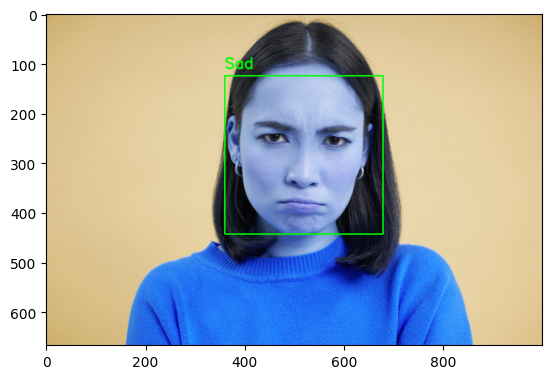

In [20]:
import cv2
import cv2.data
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
from PIL import Image
import numpy as np

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

# Emotions labels
# emotions = ['happy', 'surprise', 'sad', 'anger', 'disgust', 'fear']
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

model = ResEmoteNet().to(device)
# checkpoint = torch.load('ResEmoteNet_JAFFE_best_model_0.001_16_0.95_0.0001.pth', weights_only=True)
checkpoint = torch.load('Fer_ResEmoteNet\\best_model_0.001_16_0.95_0.0001.pth', weights_only=True)
model.load_state_dict(checkpoint)
model.eval()

transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
)

# Settings for text
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
font_color = (0, 255, 0)  # This is BGR color
thickness = 2
line_type = cv2.LINE_AA

max_emotion = ''

def detect_emotion(image):
    img_tensor = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        outputs = model(img_tensor)
        probabilities = F.softmax(outputs, dim=1)
    scores = probabilities.cpu().numpy().flatten()
    rounded_scores = [round(score, 2) for score in scores]
    return rounded_scores

def get_max_emotion(x, y, w, h, image):
    crop_img = image[y : y + h, x : x + w]
    pil_crop_img = Image.fromarray(crop_img)
    rounded_scores = detect_emotion(pil_crop_img)    
    max_index = np.argmax(rounded_scores)
    max_emotion = emotions[max_index]
    return max_emotion

def print_max_emotion(x, y, image, max_emotion):
    org = (x, y - 15)
    cv2.putText(image, max_emotion, org, font, font_scale, font_color, thickness, line_type)
    
def print_all_emotion(x, y, w, h, image):
    crop_img = image[y : y + h, x : x + w]
    pil_crop_img = Image.fromarray(crop_img)
    rounded_scores = detect_emotion(pil_crop_img)
    org = (x + w + 10, y - 20)
    for index, value in enumerate(emotions):
        emotion_str = (f'{value}: {rounded_scores[index]:.2f}')
        y = org[1] + 40
        org = (org[0], y)
        cv2.putText(image, emotion_str, org, font, font_scale, font_color, thickness, line_type)
    
def detect_bounding_box(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray_image, 1.1, 25, minSize=(40, 40))

    for (x, y, w, h) in faces:
        # Draw bounding box on face
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        max_emotion = get_max_emotion(x, y, w, h, image)
        print("Max emotion: ", max_emotion)
        print_max_emotion(x, y, image, max_emotion)
        # print_all_emotion(x, y, w, h, image)
    
    return faces

# Load the image file
image = cv2.imread('testing.jpg')
# Process the image
faces = detect_bounding_box(image)

# Display the processed image
plt.imshow(image)